<b><center>TSF PROJECT</b></center>

For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

<b><center>A.Rose.csv</b></center>

<b>1. Read the data as an appropriate Time Series data and plot the data.</b>

In [929]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import itertools
from sklearn.metrics import  mean_squared_error
import statsmodels.api as sm
from sklearn import metrics
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [20, 8]
import warnings
warnings.filterwarnings("ignore")

In [930]:
import os
os.getcwd()

'C:\\Users\\LENOVO\\Downloads\\GREAT LAKES PGDSBA\\MODULE -7 TIME SERIES FORECASTING\\PROJECT'

## Read the data from the '.csv' file as a monthly Time Series.

In [763]:
df = pd.read_csv('Rose.csv')
df.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

In [764]:
df.tail()

YearMonth  Rose
182   1995-03  45.0
183   1995-04  52.0
184   1995-05  28.0
185   1995-06  40.0
186   1995-07  62.0

In [765]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


In [766]:
df.isnull().sum()

YearMonth    0
Rose         2
dtype: int64

## Creating the Time Stamps and adding to the data frame to make it a Time Series Data

In [767]:
date = pd.date_range(start='1/1/1980', end='1/1/1996', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1995-03-31', '1995-04-30', '1995-05-31', '1995-06-30',
               '1995-07-31', '1995-08-31', '1995-09-30', '1995-10-31',
               '1995-11-30', '1995-12-31'],
              dtype='datetime64[ns]', length=192, freq='M')

In [768]:
# Adding the time stamp to the data frame
df['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
df.head()

YearMonth   Rose Time_Stamp
0   1980-01  112.0 1980-01-31
1   1980-02  118.0 1980-02-29
2   1980-03  129.0 1980-03-31
3   1980-04   99.0 1980-04-30
4   1980-05  116.0 1980-05-31

In [769]:
data=df.set_index('Time_Stamp')


In [770]:
data.head()

YearMonth   Rose
Time_Stamp                 
1980-01-31   1980-01  112.0
1980-02-29   1980-02  118.0
1980-03-31   1980-03  129.0
1980-04-30   1980-04   99.0
1980-05-31   1980-05  116.0

In [771]:
#data.interpolate(method='pad')['1994'].tail(8)

## Plot the Time Series to understand the behaviour of the data.

In [772]:
# The following code is to set the subsequent figure sizes

#from pylab import rcParams
#rcParams['figure.figsize'] = 20,8

In [773]:
df['Rose'].plot(figsize=(20,8))

<AxesSubplot:>

Text(0.5, 1.0, 'Plot of original data with missing values')

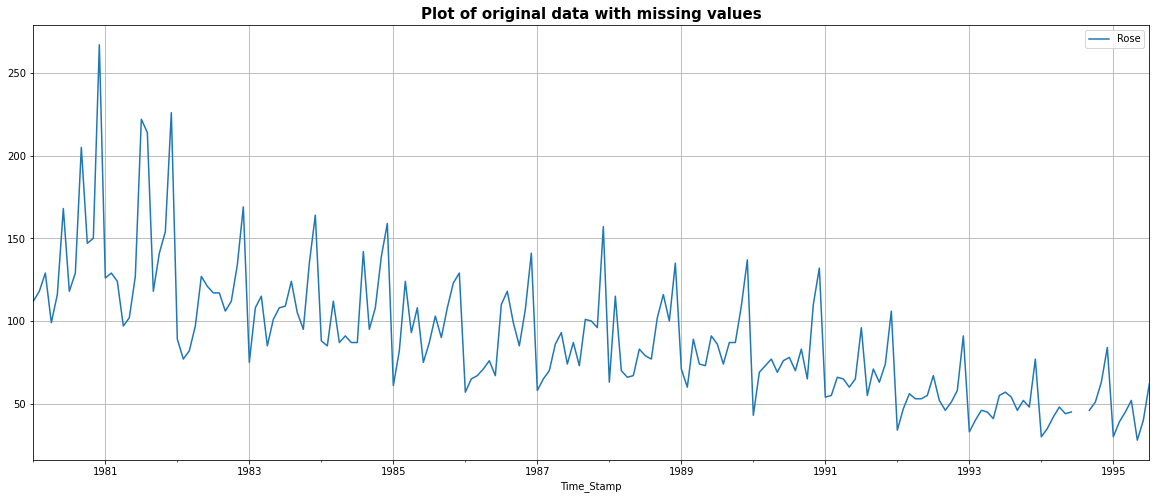

In [774]:
data.plot(figsize=(20,8))
plt.grid();
plt.title("Plot of original data with missing values",fontsize=15,fontweight='bold') 

In [775]:
#dropping the YearMonth column

In [776]:
data.drop(['YearMonth'], axis=1, inplace=True)
data.head()

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

In [777]:
data.tail()

Rose
Time_Stamp      
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  62.0

We can see that there is a slight downward trend with a seasonal pattern associated as well.

<b>2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.</b>

## Check the basic measures of descriptive statistics

In [778]:
#impute the missing values
#data.interpolate(method='pad',order=1)['1994']
data.interpolate(inplace=True)

In [779]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    187 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


Text(0.5, 1.0, 'Plot of data after missing values imputation')

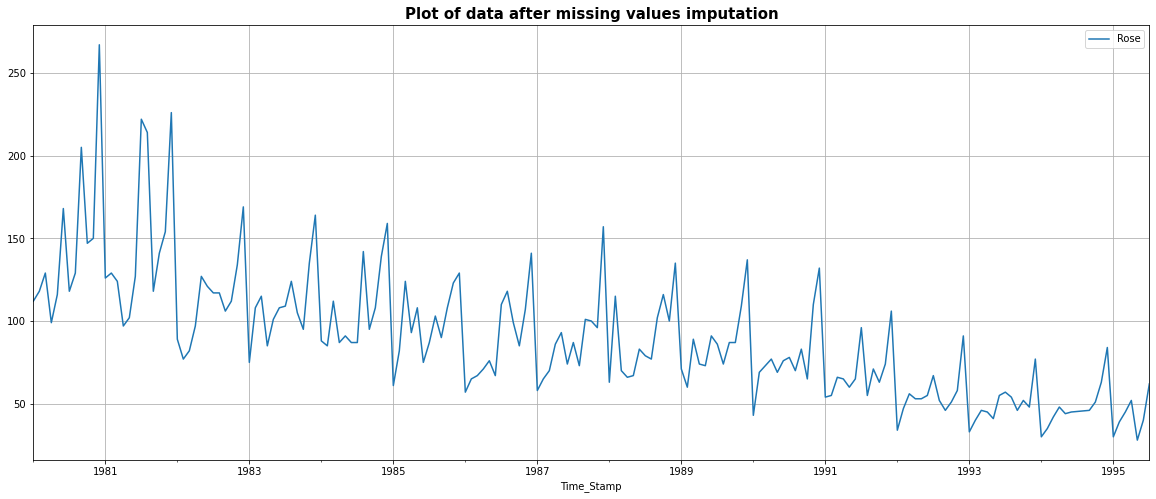

In [780]:
data.plot()
plt.grid();
plt.title("Plot of data after missing values imputation",fontsize=15,fontweight='bold') 

In [781]:
data.describe()

Rose
count  187.000000
mean    89.914439
std     39.238325
min     28.000000
25%     62.500000
50%     85.000000
75%    111.000000
max    267.000000

The basic measures of descriptive statistics tell us how the Sales have varied across years. But remember, for this measure of descriptive statistics we have averaged over the whole data without taking the time component into account.

## Plot a boxplot to understand the sales across different years and within different months across years.

### Yearly Boxplot

Text(0.5, 1.0, 'Yearly Box plot')

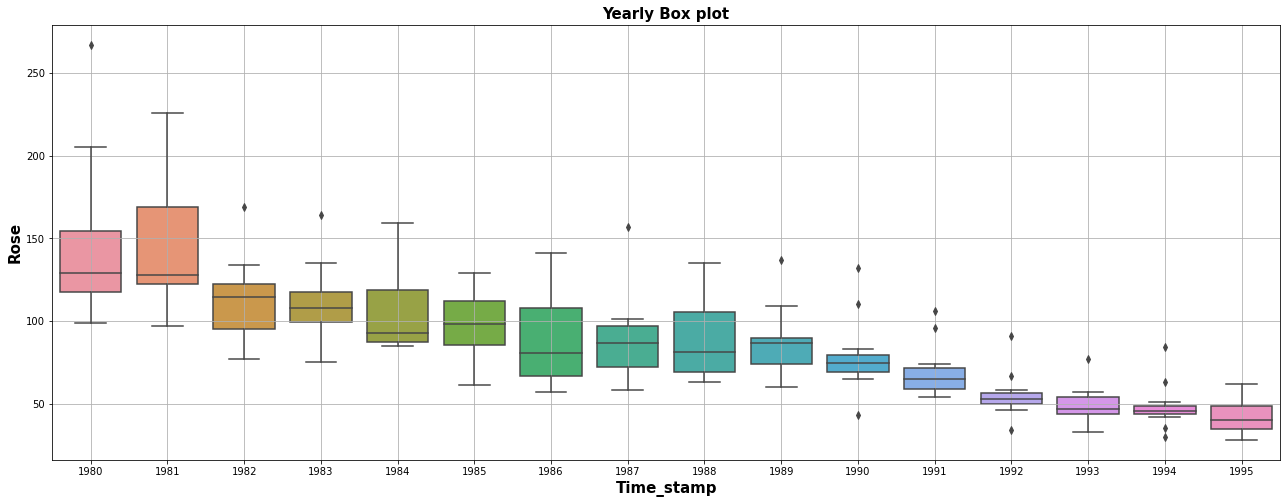

In [782]:
plt.subplots(figsize=(22,8))
sns.boxplot(x = data.index.year,y = data['Rose'])
plt.grid();
plt.xlabel('Time_stamp', fontsize=15,fontweight='bold')
plt.ylabel('Rose', fontsize=15,fontweight='bold')
plt.title("Yearly Box plot", fontsize=15,fontweight='bold') 

The yearly boxplots also shows that the Sales have decreased towards the last few years.

### Monthly Plot

Text(0.5, 1.0, 'Monthly box plot')

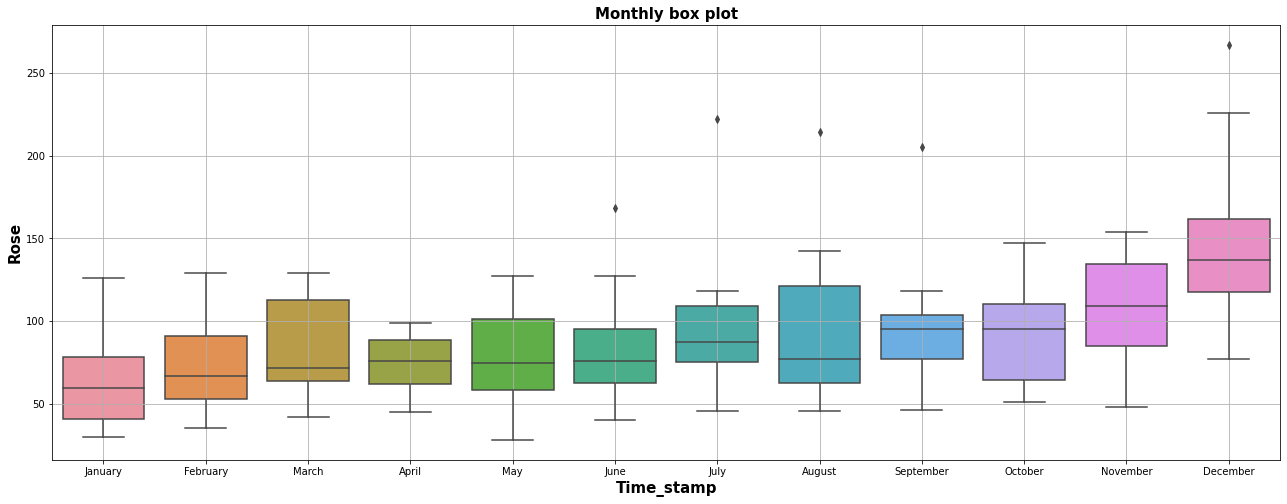

In [783]:
plt.subplots(figsize=(22,8))
sns.boxplot(x = data.index.month_name(),y = data['Rose'])
plt.grid();
plt.xlabel('Time_stamp', fontsize=15,fontweight='bold')
plt.ylabel('Rose', fontsize=15,fontweight='bold')
plt.title("Monthly box plot", fontsize=15,fontweight='bold')

There is a clear distinction of 'Sales' within different months spread across various years. The highest such numbers are being recorded in the month of July-August across various years.

<b>Plotting yearly sales across months</b>

In [784]:
yearly_sales_across_months = pd.pivot_table(data, values='Rose',columns = data.index.month_name(),index = data.index.year)
yearly_sales_across_months

Time_Stamp  April      August  December  February  January        July   June  \
Time_Stamp                                                                      
1980         99.0  129.000000     267.0     118.0    112.0  118.000000  168.0   
1981         97.0  214.000000     226.0     129.0    126.0  222.000000  127.0   
1982         97.0  117.000000     169.0      77.0     89.0  117.000000  121.0   
1983         85.0  124.000000     164.0     108.0     75.0  109.000000  108.0   
1984         87.0  142.000000     159.0      85.0     88.0   87.000000   87.0   
1985         93.0  103.000000     129.0      82.0     61.0   87.000000   75.0   
1986         71.0  118.000000     141.0      65.0     57.0  110.000000   67.0   
1987         86.0   73.000000     157.0      65.0     58.0   87.000000   74.0   
1988         66.0   77.000000     135.0     115.0     63.0   79.000000   83.0   
1989         74.0   74.000000     137.0      60.0     71.0   86.000000   91.0   
1990         77.0   70.000000     132.0      69.0     43.0   78.000000   76.0   
1991         65.0   55.000000     106.0      55.0     54.0   96.000000   65.0   
1992         53.0   52.000000      91.0      47.0     34.0   67.000000   55.0   
1993         45.0   54.000000      77.0      40.0     33.0   57.000000   55.0   
1994         48.0   45.666667      84.0      35.0     30.0   45.333333   45.0   
1995         52.0         NaN       NaN      39.0     30.0   62.000000   40.0   

Time_Stamp  March    May  November  October  September  
Time_Stamp                                              
1980        129.0  116.0     150.0    147.0      205.0  
1981        124.0  102.0     154.0    141.0      118.0  
1982         82.0  127.0     134.0    112.0      106.0  
1983        115.0  101.0     135.0     95.0      105.0  
1984        112.0   91.0     139.0    108.0       95.0  
1985        124.0  108.0     123.0    108.0       90.0  
1986         67.0   76.0     107.0     85.0       99.0  
1987         70.0   93.0      96.0    100.0      101.0  
1988         70.0   67.0     100.0    116.0      102.0  
1989         89.0   73.0     109.0     87.0       87.0  
1990         73.0   69.0     110.0     65.0       83.0  
1991         66.0   60.0      74.0     63.0       71.0  
1992         56.0   53.0      58.0     51.0       46.0  
1993         46.0   41.0      48.0     52.0       46.0  
1994         42.0   44.0      63.0     51.0       46.0  
1995         45.0   28.0       NaN      NaN        NaN

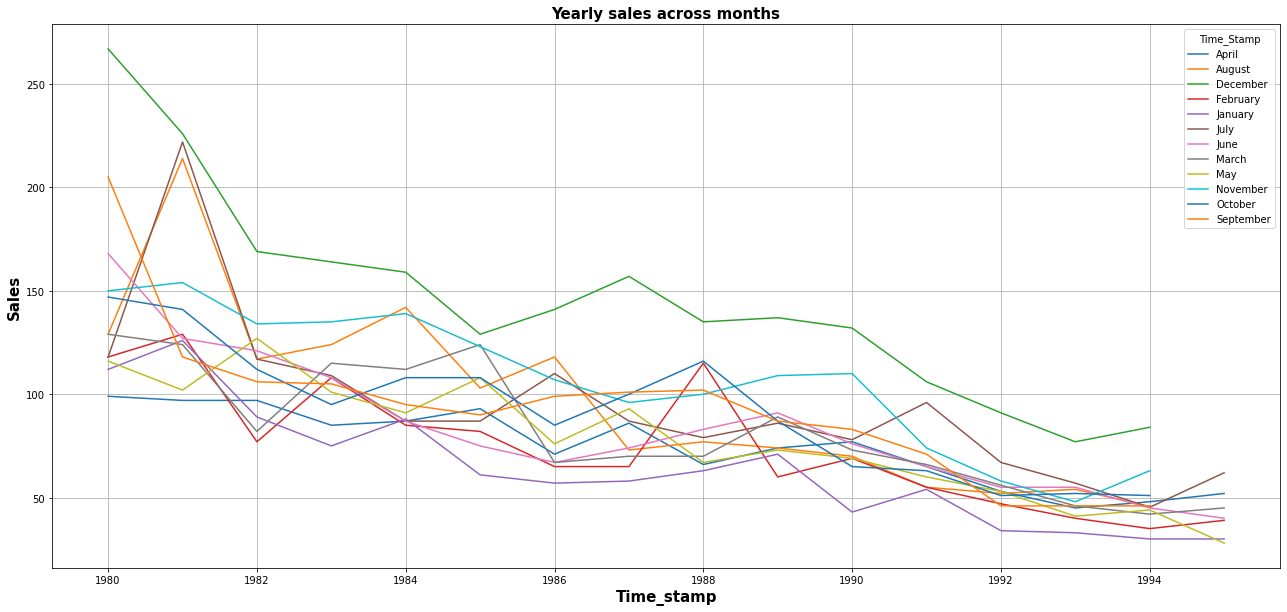

In [785]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_across_months.plot(ax=ax)
plt.xlabel('Time_stamp', fontsize=15,fontweight='bold')
plt.ylabel('Sales', fontsize=15,fontweight='bold')
plt.title('Yearly sales across months', fontsize=15,fontweight='bold')
plt.grid();

<b>Sampling the data annually</b>

In [786]:
df_yearly_sum = data.resample('A').sum()
df_yearly_sum.head()

Rose
Time_Stamp        
1980-12-31  1758.0
1981-12-31  1780.0
1982-12-31  1348.0
1983-12-31  1324.0
1984-12-31  1280.0

In [787]:
df_yearly_sum

Rose
Time_Stamp        
1980-12-31  1758.0
1981-12-31  1780.0
1982-12-31  1348.0
1983-12-31  1324.0
1984-12-31  1280.0
1985-12-31  1183.0
1986-12-31  1063.0
1987-12-31  1060.0
1988-12-31  1073.0
1989-12-31  1038.0
1990-12-31   945.0
1991-12-31   830.0
1992-12-31   663.0
1993-12-31   594.0
1994-12-31   579.0
1995-12-31   296.0

Text(0.5, 1.0, 'Yearly sales plot')

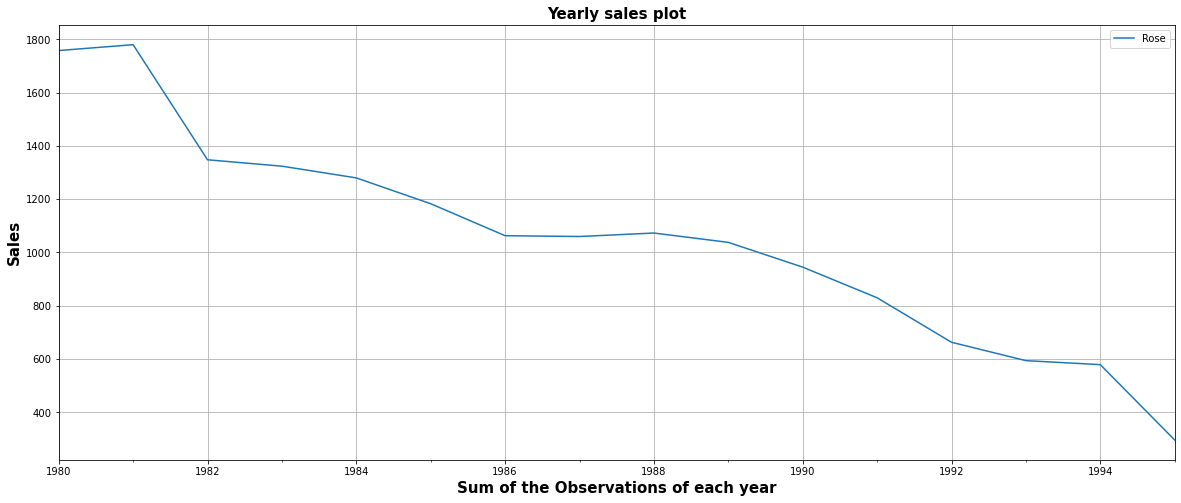

In [788]:

df_yearly_sum.plot();
plt.grid()
plt.xlabel("Sum of the Observations of each year", fontsize=15,fontweight='bold');
plt.ylabel('Sales', fontsize=15,fontweight='bold')
plt.title("Yearly sales plot", fontsize=15,fontweight='bold')


<b>Sampling the data quaterly</b>

In [789]:
df_quarterly_mean = data.resample('Q').mean()
df_quarterly_mean

Rose
Time_Stamp            
1980-03-31  119.666667
1980-06-30  127.666667
1980-09-30  150.666667
1980-12-31  188.000000
1981-03-31  126.333333
...                ...
1994-09-30   45.666667
1994-12-31   66.000000
1995-03-31   38.000000
1995-06-30   40.000000
1995-09-30   62.000000

[63 rows x 1 columns]

Text(0.5, 1.0, 'Quarterly data plot')

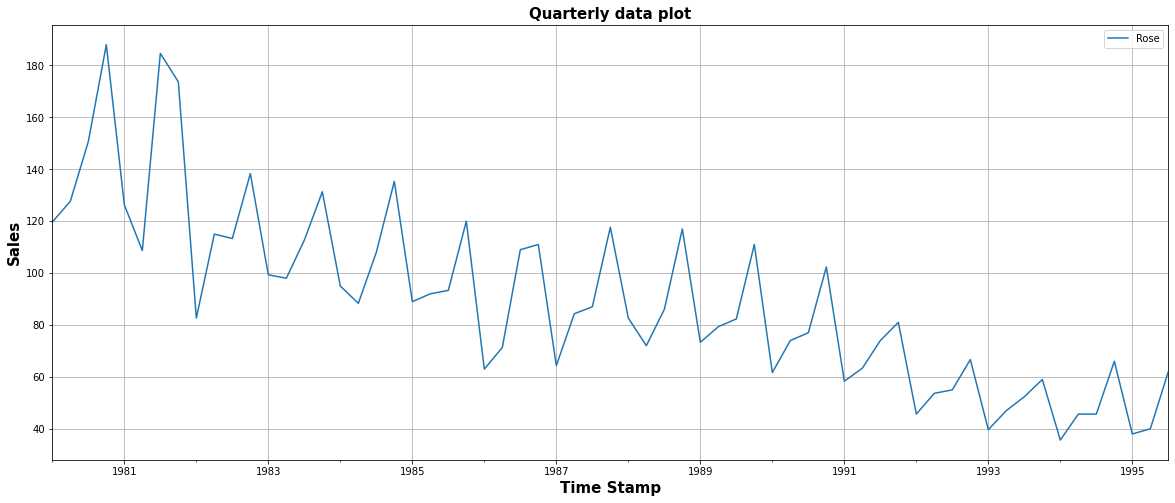

In [790]:
df_quarterly_mean.plot();
plt.grid()
plt.xlabel("Time Stamp", fontsize=15,fontweight='bold');
plt.ylabel('Sales', fontsize=15,fontweight='bold')
plt.title("Quarterly data plot", fontsize=15,fontweight='bold')

<b>Sampling the data daily</b>

In [791]:
df_daily_sum = data.resample('D').sum()
df_daily_sum

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-01    0.0
1980-02-02    0.0
1980-02-03    0.0
1980-02-04    0.0
...           ...
1995-07-27    0.0
1995-07-28    0.0
1995-07-29    0.0
1995-07-30    0.0
1995-07-31   62.0

[5661 rows x 1 columns]

In [792]:
df_daily_sum.sort_values( by=['Rose'],ascending=False)

Rose
Time_Stamp       
1980-12-31  267.0
1981-12-31  226.0
1981-07-31  222.0
1981-08-31  214.0
1980-09-30  205.0
...           ...
1985-05-20    0.0
1985-05-19    0.0
1985-05-18    0.0
1985-05-17    0.0
1987-12-04    0.0

[5661 rows x 1 columns]

Text(0.5, 1.0, 'Daily sales plot')

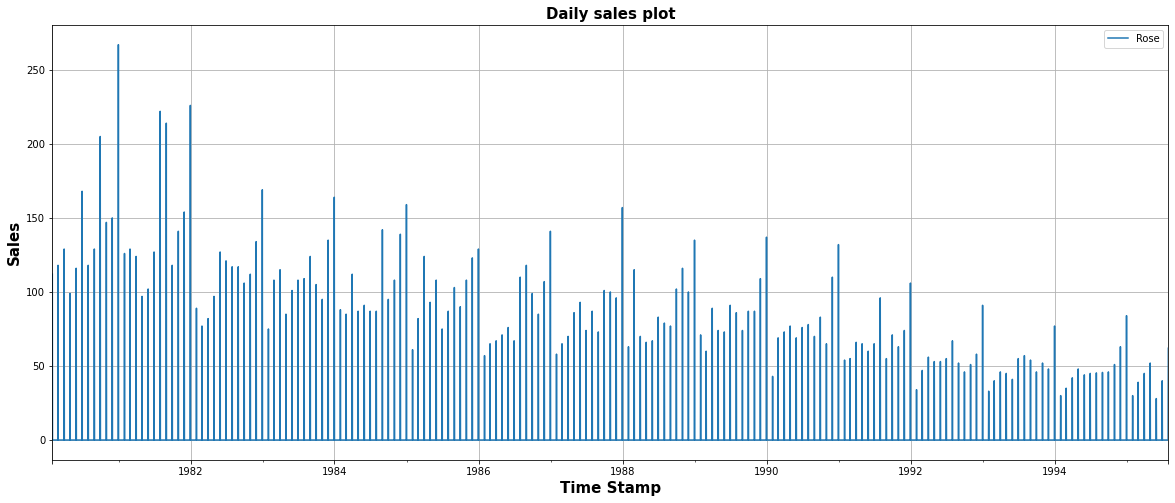

In [793]:
df_daily_sum.plot()
plt.grid();
plt.xlabel("Time Stamp", fontsize=15,fontweight='bold');
plt.ylabel('Sales', fontsize=15,fontweight='bold')
plt.title("Daily sales plot", fontsize=15,fontweight='bold')

## Plot a time series monthplot to understand the spread of sales across different years and within different months across years.

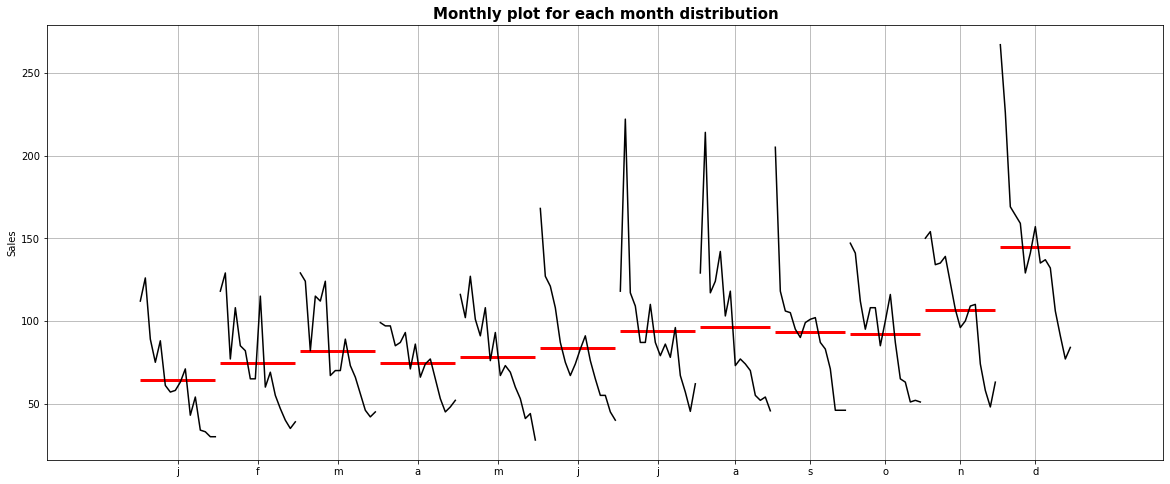

In [794]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(data['Rose'],ylabel='Sales')
plt.title("Monthly plot for each month distribution",fontsize=15,fontweight='bold')
plt.grid();

This plot shows us the behaviour of the Time Series ('Sales' in this case) across various months. The red line is the median value.

## Plot a graph of monthly RetailSales across years.

In [795]:
monthly_sales_across_years = pd.pivot_table(data, values = 'Rose', columns = data.index.month, index = data.index.year)
monthly_sales_across_years

Time_Stamp     1      2      3     4      5      6           7           8   \
Time_Stamp                                                                    
1980        112.0  118.0  129.0  99.0  116.0  168.0  118.000000  129.000000   
1981        126.0  129.0  124.0  97.0  102.0  127.0  222.000000  214.000000   
1982         89.0   77.0   82.0  97.0  127.0  121.0  117.000000  117.000000   
1983         75.0  108.0  115.0  85.0  101.0  108.0  109.000000  124.000000   
1984         88.0   85.0  112.0  87.0   91.0   87.0   87.000000  142.000000   
1985         61.0   82.0  124.0  93.0  108.0   75.0   87.000000  103.000000   
1986         57.0   65.0   67.0  71.0   76.0   67.0  110.000000  118.000000   
1987         58.0   65.0   70.0  86.0   93.0   74.0   87.000000   73.000000   
1988         63.0  115.0   70.0  66.0   67.0   83.0   79.000000   77.000000   
1989         71.0   60.0   89.0  74.0   73.0   91.0   86.000000   74.000000   
1990         43.0   69.0   73.0  77.0   69.0   76.0   78.000000   70.000000   
1991         54.0   55.0   66.0  65.0   60.0   65.0   96.000000   55.000000   
1992         34.0   47.0   56.0  53.0   53.0   55.0   67.000000   52.000000   
1993         33.0   40.0   46.0  45.0   41.0   55.0   57.000000   54.000000   
1994         30.0   35.0   42.0  48.0   44.0   45.0   45.333333   45.666667   
1995         30.0   39.0   45.0  52.0   28.0   40.0   62.000000         NaN   

Time_Stamp     9      10     11     12  
Time_Stamp                              
1980        205.0  147.0  150.0  267.0  
1981        118.0  141.0  154.0  226.0  
1982        106.0  112.0  134.0  169.0  
1983        105.0   95.0  135.0  164.0  
1984         95.0  108.0  139.0  159.0  
1985         90.0  108.0  123.0  129.0  
1986         99.0   85.0  107.0  141.0  
1987        101.0  100.0   96.0  157.0  
1988        102.0  116.0  100.0  135.0  
1989         87.0   87.0  109.0  137.0  
1990         83.0   65.0  110.0  132.0  
1991         71.0   63.0   74.0  106.0  
1992         46.0   51.0   58.0   91.0  
1993         46.0   52.0   48.0   77.0  
1994         46.0   51.0   63.0   84.0  
1995          NaN    NaN    NaN    NaN

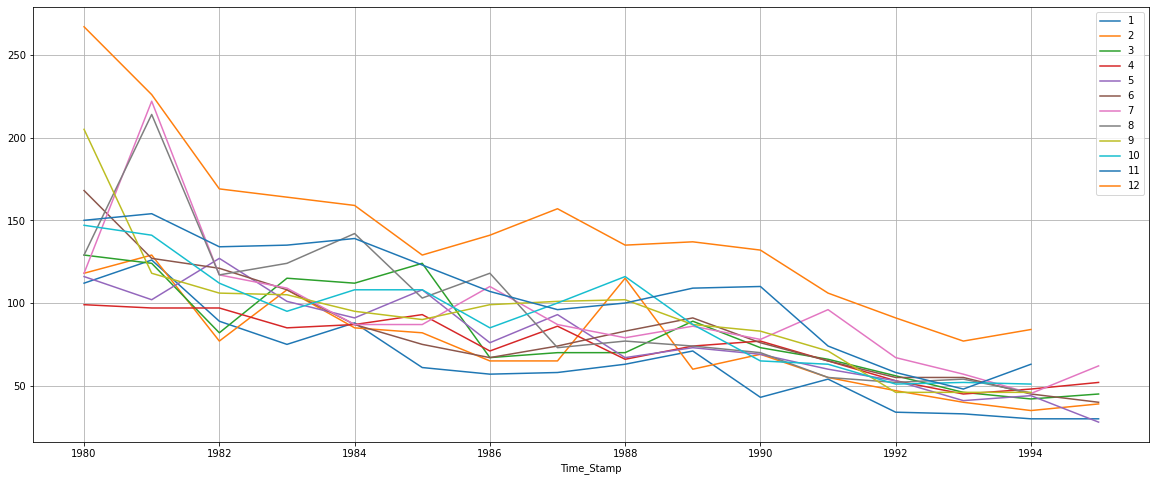

In [796]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

## Plot the Empirical Cumulative Distribution.

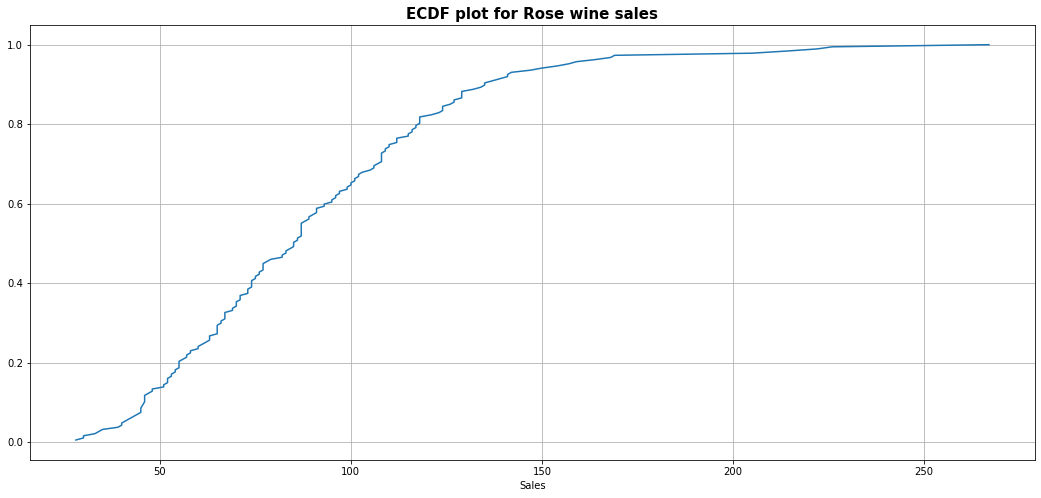

In [797]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(data['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.title("ECDF plot for Rose wine sales", fontsize=15,fontweight='bold')
plt.grid()
plt.xlabel('Sales');

This particular graph tells us what percentage of data points refer to what number of Sales.

## Plot the average RetailSales per month and the month on month percentage change of RetailSales.

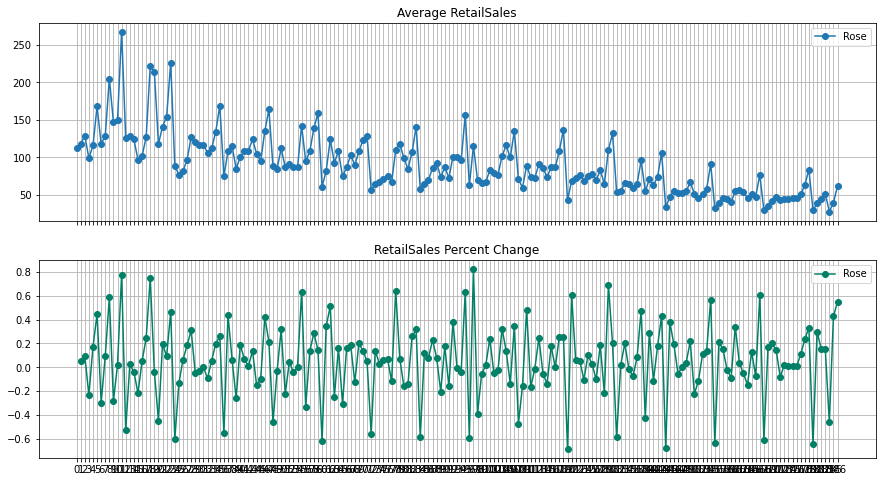

In [798]:
# group by date and get average RetailSales, and precent change
average    = data.groupby(df.index)["Rose"].mean()
pct_change = data.groupby(df.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average RetailSales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="RetailSales Percent Change",grid=True)

The above two graphs tells us the Average 'Sales' and the Percentage change of 'Sales' with respect to the time.

## Decompose the Time Series and plot the different components.

In [799]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

### Additive Decomposition

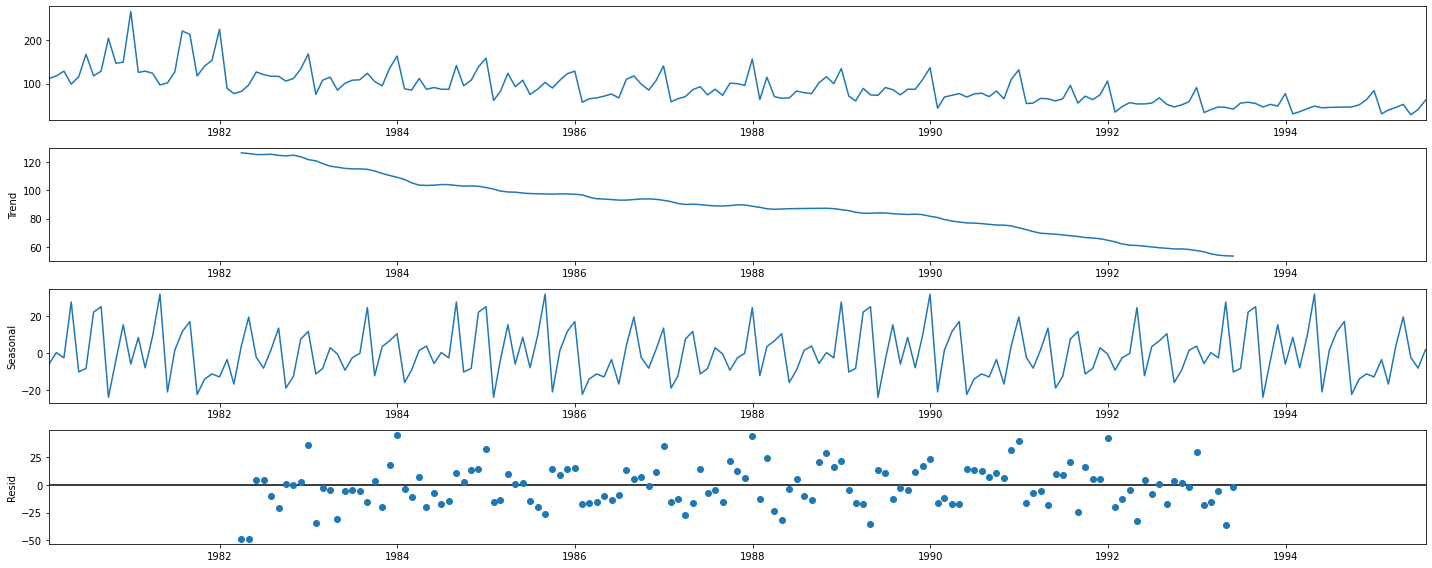

In [800]:
#data.interpolate(inplace=True)
res=sm.tsa.seasonal_decompose(data,freq=52)
resplot=res.plot()


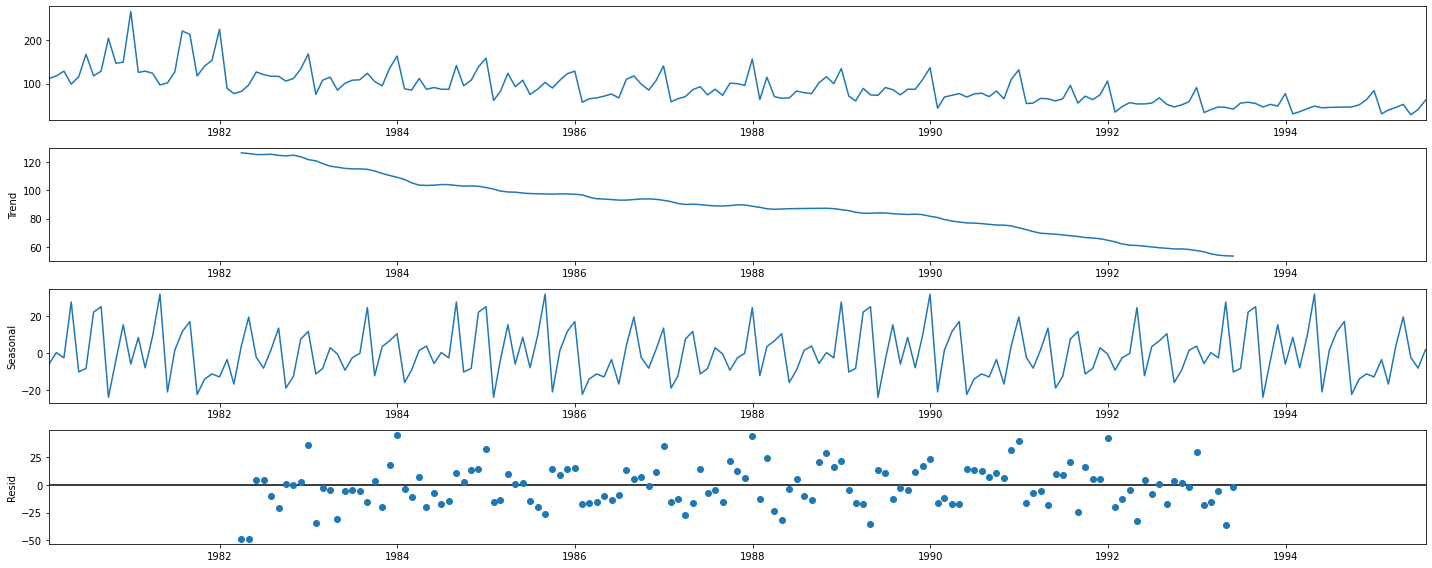

In [801]:
decomposition = seasonal_decompose(data,model='additive',freq=52)
decomposition.plot();

We see that the residuals are located around 0 from the plot of the residuals in the decomposition.

In [802]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31   NaN
1980-02-29   NaN
1980-03-31   NaN
1980-04-30   NaN
1980-05-31   NaN
1980-06-30   NaN
1980-07-31   NaN
1980-08-31   NaN
1980-09-30   NaN
1980-10-31   NaN
1980-11-30   NaN
1980-12-31   NaN
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    -5.661140
1980-02-29     0.268347
1980-03-31    -2.603448
1980-04-30    27.640142
1980-05-31   -10.257294
1980-06-30    -8.308576
1980-07-31    22.162578
1980-08-31    25.109693
1980-09-30   -23.981653
1980-10-31    -3.750883
1980-11-30    15.316424
1980-12-31    -5.947999
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31   NaN
1980-02-29   NaN
1980-03-31   NaN
1980-04-30   NaN
1980-05-31   NaN
1980-06-30   NaN
1980-07-31   NaN
1980-08-31   NaN
1980-09-30   NaN
1980-10-31   NaN
1980-11-30   NaN
1980-12-31   NaN
Name: resid, dtype: float64 



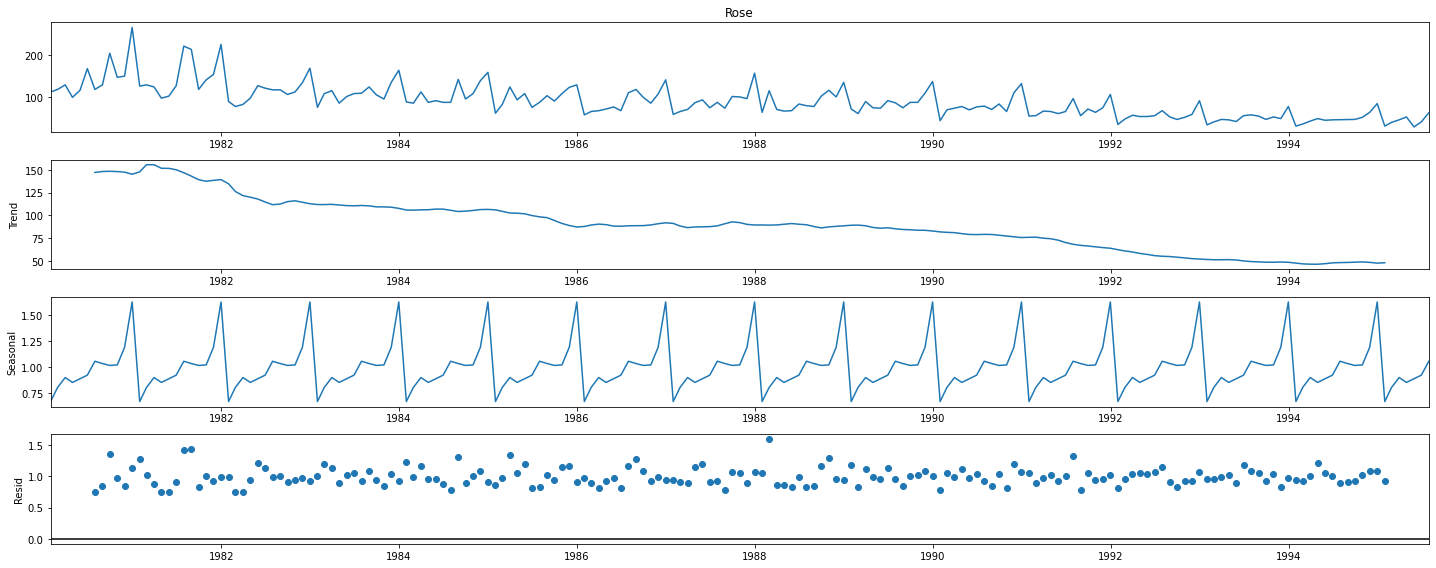

In [803]:
decomposition = seasonal_decompose(data['Rose'],model='multiplicative')
decomposition.plot();

For the multiplicative series, we see that a lot of residuals are located around 1.

In [804]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.670111
1980-02-29    0.806163
1980-03-31    0.901164
1980-04-30    0.854024
1980-05-31    0.889415
1980-06-30    0.923985
1980-07-31    1.058038
1980-08-31    1.035881
1980-09-30    1.017648
1980-10-31    1.022573
1980-11-30    1.192349
1980-12-31    1.628646
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.758258
1980-08-31    0.840720
1980-09-30    1.357674
1980-10-31    0.970771
1980-11-30    0.853378
1980-12-31    1.129646
Name: resid, dtype:

<b>3. Split the data into training and test. The test data should start in 1991.</b>

In [805]:
train             = data[data.index<'1991'] 
test              = data[data.index>='1991']

In [806]:
print("Shape of the train data:",train.shape)
print("Shape of the test data:",test.shape)

Shape of the train data: (132, 1)
Shape of the test data: (55, 1)


In [807]:
# Printing the AirPassengers Data
print('Training Data')
display(train)
print('Test Data')
display(test)

Training Data


Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0
...           ...
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0

[132 rows x 1 columns]

Test Data


Rose
Time_Stamp            
1991-01-31   54.000000
1991-02-28   55.000000
1991-03-31   66.000000
1991-04-30   65.000000
1991-05-31   60.000000
1991-06-30   65.000000
1991-07-31   96.000000
1991-08-31   55.000000
1991-09-30   71.000000
1991-10-31   63.000000
1991-11-30   74.000000
1991-12-31  106.000000
1992-01-31   34.000000
1992-02-29   47.000000
1992-03-31   56.000000
1992-04-30   53.000000
1992-05-31   53.000000
1992-06-30   55.000000
1992-07-31   67.000000
1992-08-31   52.000000
1992-09-30   46.000000
1992-10-31   51.000000
1992-11-30   58.000000
1992-12-31   91.000000
1993-01-31   33.000000
1993-02-28   40.000000
1993-03-31   46.000000
1993-04-30   45.000000
1993-05-31   41.000000
1993-06-30   55.000000
1993-07-31   57.000000
1993-08-31   54.000000
1993-09-30   46.000000
1993-10-31   52.000000
1993-11-30   48.000000
1993-12-31   77.000000
1994-01-31   30.000000
1994-02-28   35.000000
1994-03-31   42.000000
1994-04-30   48.000000
1994-05-31   44.000000
1994-06-30   45.000000
1994-07-31   45.333333
1994-08-31   45.666667
1994-09-30   46.000000
1994-10-31   51.000000
1994-11-30   63.000000
1994-12-31   84.000000
1995-01-31   30.000000
1995-02-28   39.000000
1995-03-31   45.000000
1995-04-30   52.000000
1995-05-31   28.000000
1995-06-30   40.000000
1995-07-31   62.000000

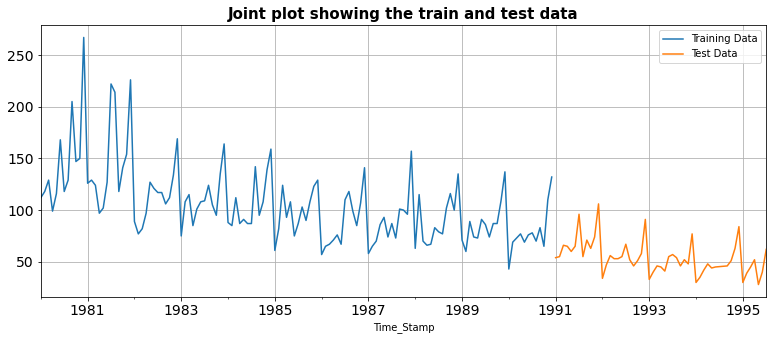

In [808]:
train['Rose'].plot(figsize=(13,5), fontsize=14)
test['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.title("Joint plot showing the train and test data", fontsize=15,fontweight='bold')
plt.legend(['Training Data','Test Data'])
plt.show()

In [809]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


<b>4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.</b>

<b>1.Linear Regression</b>

In [810]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [811]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
Time_Stamp             
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
              Rose  time
Time_Stamp             
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132 

First few rows of Test Data 
             Rose  time
Time_Stamp            
1991-01-31  54.0   133
1991-02-28  55.0   134
1991-03-31  66.0   135
1991-04-30  65.0   136
1991-05-31  60.0   137 

Last few rows of Test Data 
             Rose  time
Time_Stamp            
1995-03-31  45.0   183
1995-04-30  52.0   184
1995-05-31  28.0   185
1995-06-30  40.0   186
1995-07-31  62.0   187 



Now that our training and test data has been modified, let us go ahead use  𝐿𝑖𝑛𝑒𝑎𝑟𝑅𝑒𝑔𝑟𝑒𝑠𝑠𝑖𝑜𝑛 to build the model on the training data and test the model on the test data.

In [812]:
from sklearn.linear_model import LinearRegression

In [813]:
lr = LinearRegression()

In [814]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

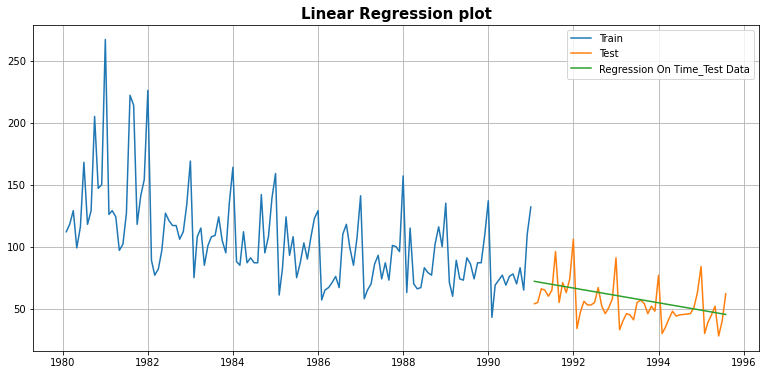

In [815]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.title("Linear Regression plot", fontsize=15,fontweight='bold')
plt.grid();

<b>Defining the accuracy metrics.</b>

In [816]:
from sklearn import metrics

def MAPE(y, yhat):
    y,yhat = np.array(y), np.array(yhat)
    try:
        mape = round(np.sum(np.abs(yhat-y))/np.sum(y)*100,2)
    except:
        print("Observed values are blank")
        mape = np.nan
    return mape
    

<b>Model Evaluation</b>

In [817]:
## Train Data - RMSE
rmse_model1_train = metrics.mean_squared_error(train['Rose'],train_predictions_model1,squared=False)
mape_model1_train = MAPE(train['Rose'],train_predictions_model1)
print("For RegressionOnTime forecast on the Train Data,  RMSE is %3.3f" %(rmse_model1_train))
print("For RegressionOnTime forecast on the Train Data,  MAPE is %3.3f" %(mape_model1_train))

## Test Data - RMSE
rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
mape_model1_test = MAPE(test['Rose'],test_predictions_model1)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))
print("For RegressionOnTime forecast on the Test Data,  MAPE is %3.3f" %(mape_model1_test))

For RegressionOnTime forecast on the Train Data,  RMSE is 30.718
For RegressionOnTime forecast on the Train Data,  MAPE is 21.220
For RegressionOnTime forecast on the Test Data,  RMSE is 15.269
For RegressionOnTime forecast on the Test Data,  MAPE is 22.820


In [818]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test],'Test MAPE': [mape_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime  15.268955      22.82

<b>2.Naive Approach</b>

In [819]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [820]:
#Train set
NaiveModel_train['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
print(NaiveModel_train['naive'].head())

# Test set
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1980-01-31    132.0
1980-02-29    132.0
1980-03-31    132.0
1980-04-30    132.0
1980-05-31    132.0
Name: naive, dtype: float64


Time_Stamp
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64

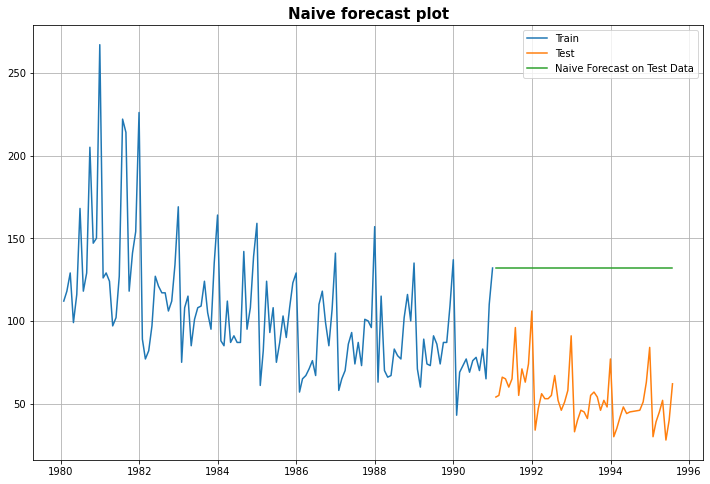

In [821]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive forecast plot", fontsize=15,fontweight='bold')
plt.grid();

<b>Model Average</b>

In [822]:
rmse_model2_train = metrics.mean_squared_error(train['Rose'],NaiveModel_train['naive'])
mape_model2_train = MAPE(train['Rose'],NaiveModel_train['naive'])
print("For Naive forecast on the Train Data,  RMSE is %3.3f" %(rmse_model2_train))
print("For Naive forecast on the Train Data,  MAPE is %3.3f" %(mape_model2_train))

## Test Data - RMSE
rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
mape_model2_test = MAPE(test['Rose'],NaiveModel_test['naive'])
print("For Naive forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))
print("For Naive forecast on the Test Data,  MAPE is %3.3f" %(mape_model2_test))

For Naive forecast on the Train Data,  RMSE is 2030.742
For Naive forecast on the Train Data,  MAPE is 36.380
For Naive forecast on the Test Data,  RMSE is 79.719
For Naive forecast on the Test Data,  MAPE is 145.100


In [823]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test],'Test MAPE': [mape_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime  15.268955      22.82
NaiveModel        79.718773     145.10

<b>3.Simple average</b>

For this particular simple average method, we will forecast by using the average of the training values.

In [824]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [825]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

Rose  mean_forecast
Time_Stamp                     
1991-01-31  54.0     104.939394
1991-02-28  55.0     104.939394
1991-03-31  66.0     104.939394
1991-04-30  65.0     104.939394
1991-05-31  60.0     104.939394

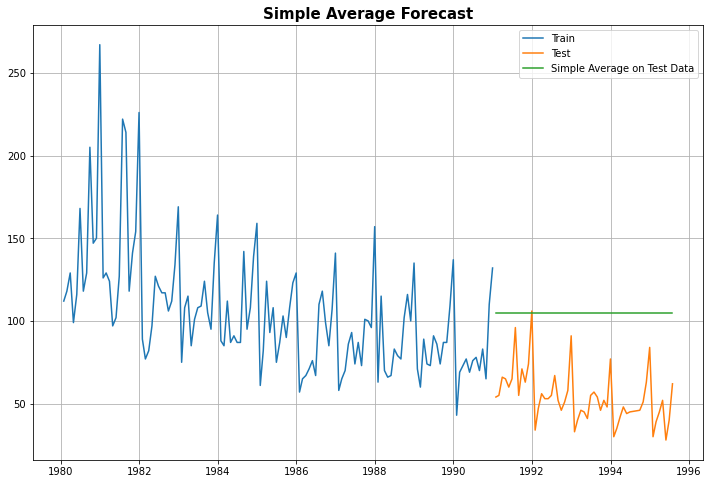

In [826]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast", fontsize=15,fontweight='bold')
plt.grid();

<b>Model Evaluation</b>

In [827]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
mape_model3_test = MAPE(test['Rose'],SimpleAverage_test['mean_forecast'])

print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))
print("For Simple Average forecast on the Test Data,  MAPE is %3.3f" %(mape_model3_test))


For Simple Average forecast on the Test Data,  RMSE is 53.461
For Simple Average forecast on the Test Data,  MAPE is 94.930


In [828]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test],'Test MAPE': [mape_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime    15.268955      22.82
NaiveModel          79.718773     145.10
SimpleAverageModel  53.460570      94.93

<b>4.Moving Average(MA)</b>

For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.
For Moving Average, we are going to average over the entire data.

In [829]:
MovingAverage = data.copy()
MovingAverage.head()

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

<b>Trailing moving averages</b>

In [830]:

MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                       
1980-01-31  112.0         NaN         NaN         NaN         NaN
1980-02-29  118.0       115.0         NaN         NaN         NaN
1980-03-31  129.0       123.5         NaN         NaN         NaN
1980-04-30   99.0       114.0       114.5         NaN         NaN
1980-05-31  116.0       107.5       115.5         NaN         NaN

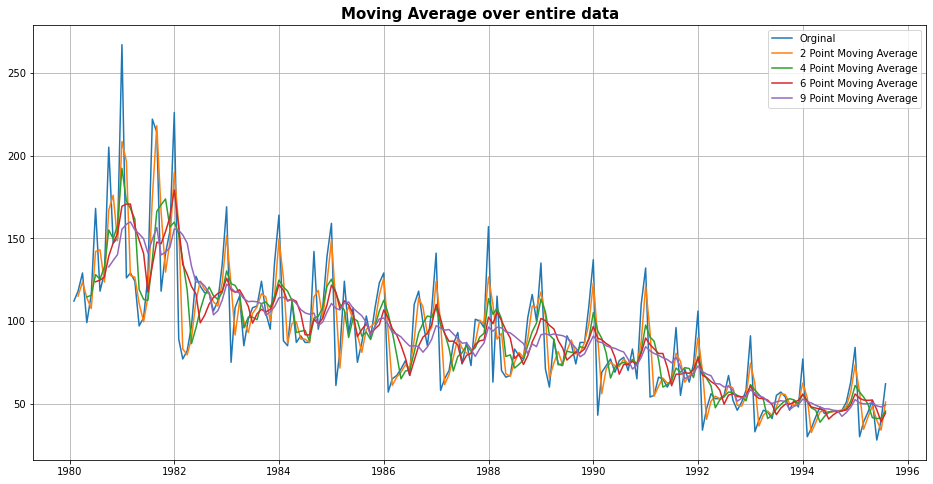

In [831]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Orginal')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.title("Moving Average over entire data", fontsize=15,fontweight='bold')
plt.legend(loc = 'best')
plt.grid();

In [832]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<='1991']
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>'1991']

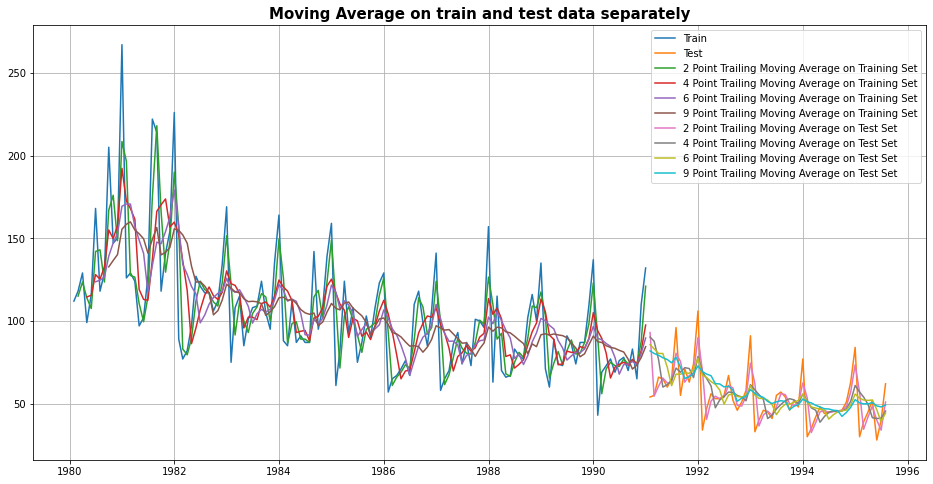

In [833]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.title("Moving Average on train and test data separately", fontsize=15,fontweight='bold')
plt.legend(loc = 'best')
plt.grid();

<b>Model Evaluation </b>

Done only on the test data.

In [834]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
mape_model4_test_2 = MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_2'])
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
mape_model4_test_4 = MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_4'])
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
mape_model4_test_6 = MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_6'])
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
mape_model4_test_9 = MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_9'])
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.529
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.451
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.566
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.728 


In [835]:
rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))
rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))
rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))
rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.529
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.451
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.566
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.728 


In [836]:
mape_model4_test_9 = MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_9'])
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4,rmse_model4_test_6,rmse_model4_test_9],
                                          'Test MAPE': [mape_model4_test_2, mape_model4_test_4,mape_model4_test_6
                                          ,mape_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime             15.268955      22.82
NaiveModel                   79.718773     145.10
SimpleAverageModel           53.460570      94.93
2pointTrailingMovingAverage  11.529278      13.54
4pointTrailingMovingAverage  14.451403      19.49
6pointTrailingMovingAverage  14.566327      20.82
9pointTrailingMovingAverage  14.727630      21.01

<b>Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.</b>

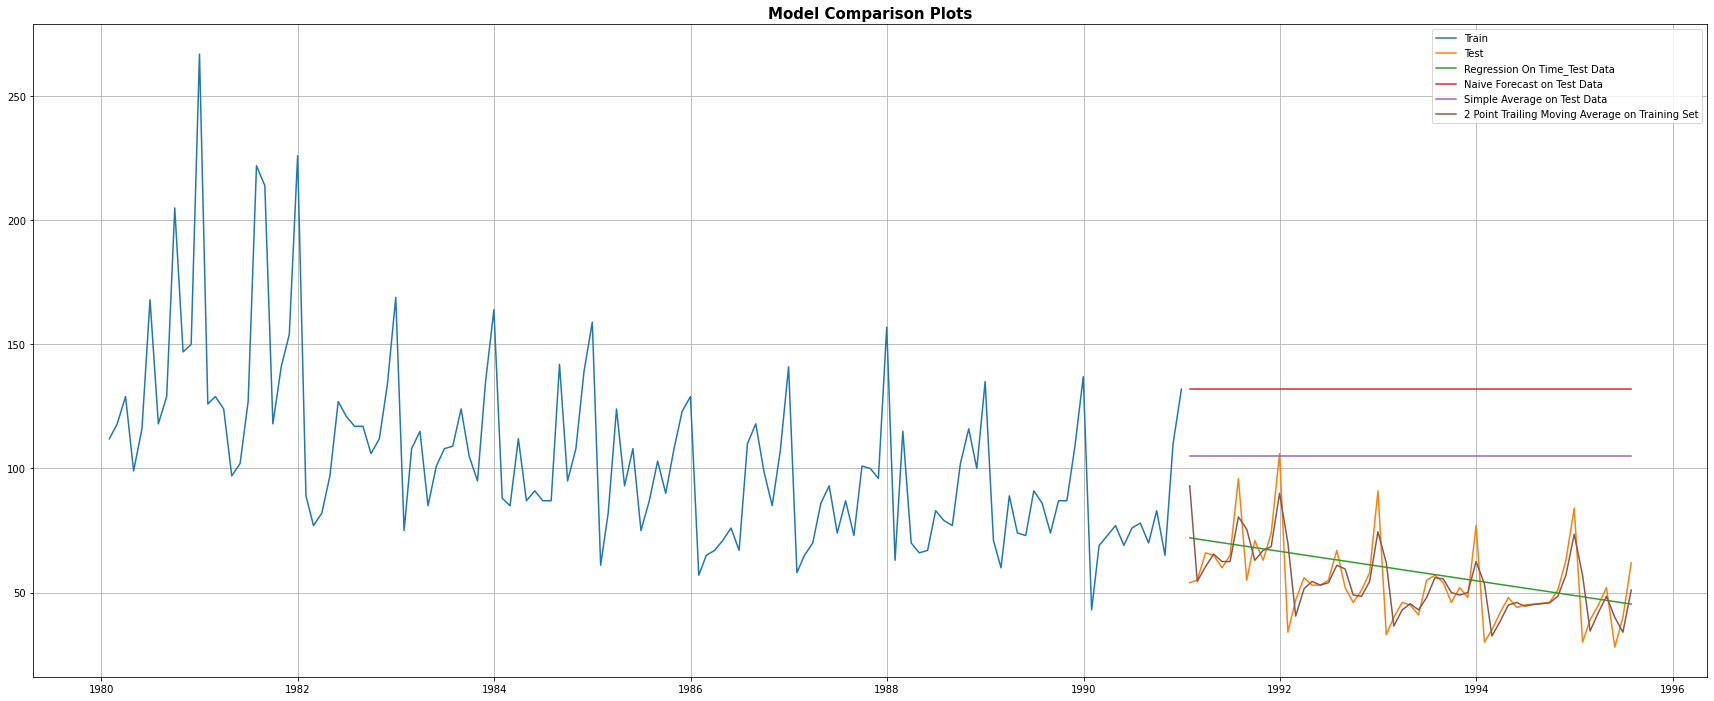

In [837]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')

plt.legend(loc='best')
plt.title("Model Comparison Plots", fontsize=15,fontweight='bold')
plt.grid();

<b>5.Simple Exponential Smoothing</b>

In [838]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [839]:
SES_train = train.copy()
SES_test = test.copy()
SES_train

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0
...           ...
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0

[132 rows x 1 columns]

In [840]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

In [841]:
model_SES_autofit = model_SES.fit(optimized=True)

In [842]:
model_SES_autofit.params

{'smoothing_level': 0.09874989743650385,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38699692184085,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [843]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Rose    predict
Time_Stamp                 
1991-01-31  54.0  87.104999
1991-02-28  55.0  87.104999
1991-03-31  66.0  87.104999
1991-04-30  65.0  87.104999
1991-05-31  60.0  87.104999

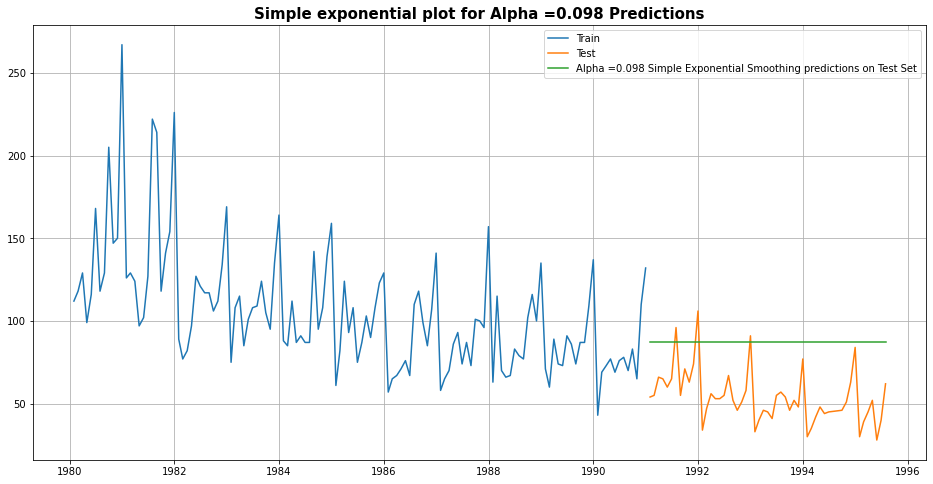

In [844]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.098 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple exponential plot for Alpha =0.098 Predictions',fontsize=15,fontweight='bold');

<b>Model Evaluation for  𝛼  = 0.098 : Simple Exponential Smoothing</b>

In [845]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha =0.098 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))
mape_model5_test_1 = MAPE(SES_test['Rose'],SES_test['predict'])



For Alpha =0.098 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 36.796


In [846]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1], 'Test MAPE': [mape_model5_test_1]},index=['Alpha=0.098,SimpleExponentialSmoothing'])


resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                        15.268955      22.82
NaiveModel                              79.718773     145.10
SimpleAverageModel                      53.460570      94.93
2pointTrailingMovingAverage             11.529278      13.54
4pointTrailingMovingAverage             14.451403      19.49
6pointTrailingMovingAverage             14.566327      20.82
9pointTrailingMovingAverage             14.727630      21.01
Alpha=0.098,SimpleExponentialSmoothing  36.796242      63.88

Setting different alpha values.
Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.
We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [847]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

SES_test

Rose    predict
Time_Stamp                       
1991-01-31   54.000000  87.104999
1991-02-28   55.000000  87.104999
1991-03-31   66.000000  87.104999
1991-04-30   65.000000  87.104999
1991-05-31   60.000000  87.104999
1991-06-30   65.000000  87.104999
1991-07-31   96.000000  87.104999
1991-08-31   55.000000  87.104999
1991-09-30   71.000000  87.104999
1991-10-31   63.000000  87.104999
1991-11-30   74.000000  87.104999
1991-12-31  106.000000  87.104999
1992-01-31   34.000000  87.104999
1992-02-29   47.000000  87.104999
1992-03-31   56.000000  87.104999
1992-04-30   53.000000  87.104999
1992-05-31   53.000000  87.104999
1992-06-30   55.000000  87.104999
1992-07-31   67.000000  87.104999
1992-08-31   52.000000  87.104999
1992-09-30   46.000000  87.104999
1992-10-31   51.000000  87.104999
1992-11-30   58.000000  87.104999
1992-12-31   91.000000  87.104999
1993-01-31   33.000000  87.104999
1993-02-28   40.000000  87.104999
1993-03-31   46.000000  87.104999
1993-04-30   45.000000  87.104999
1993-05-31   41.000000  87.104999
1993-06-30   55.000000  87.104999
1993-07-31   57.000000  87.104999
1993-08-31   54.000000  87.104999
1993-09-30   46.000000  87.104999
1993-10-31   52.000000  87.104999
1993-11-30   48.000000  87.104999
1993-12-31   77.000000  87.104999
1994-01-31   30.000000  87.104999
1994-02-28   35.000000  87.104999
1994-03-31   42.000000  87.104999
1994-04-30   48.000000  87.104999
1994-05-31   44.000000  87.104999
1994-06-30   45.000000  87.104999
1994-07-31   45.333333  87.104999
1994-08-31   45.666667  87.104999
1994-09-30   46.000000  87.104999
1994-10-31   51.000000  87.104999
1994-11-30   63.000000  87.104999
1994-12-31   84.000000  87.104999
1995-01-31   30.000000  87.104999
1995-02-28   39.000000  87.104999
1995-03-31   45.000000  87.104999
1995-04-30   52.000000  87.104999
1995-05-31   28.000000  87.104999
1995-06-30   40.000000  87.104999
1995-07-31   62.000000  87.104999

In [848]:
for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=146)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

<b>Model Evaluation</b>

In [849]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values  Train RMSE  Test RMSE
0           0.1   31.815610  36.828033
1           0.2   31.979391  41.361876
2           0.3   32.470164  47.504821
3           0.4   33.035130  53.767406
4           0.5   33.682839  59.641786
5           0.6   34.441171  64.971288
6           0.7   35.323261  69.698162
7           0.8   36.334596  73.773992
8           0.9   37.482782  77.139276

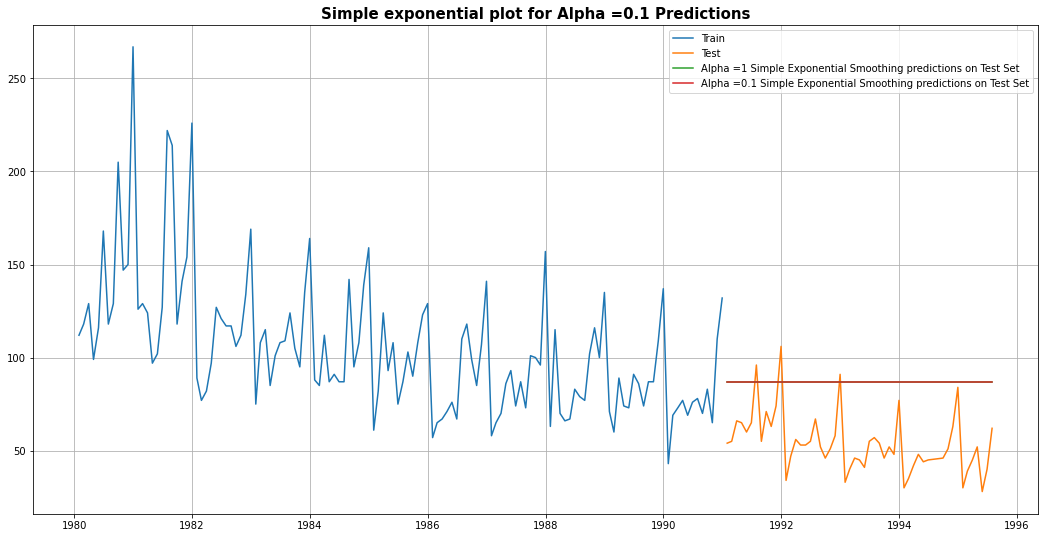

In [850]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')


plt.title('Simple exponential plot for Alpha =0.1 Predictions',fontsize=15,fontweight='bold');
plt.legend(loc='best')
plt.grid();

In [851]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                        15.268955      22.82
NaiveModel                              79.718773     145.10
SimpleAverageModel                      53.460570      94.93
2pointTrailingMovingAverage             11.529278      13.54
4pointTrailingMovingAverage             14.451403      19.49
6pointTrailingMovingAverage             14.566327      20.82
9pointTrailingMovingAverage             14.727630      21.01
Alpha=0.098,SimpleExponentialSmoothing  36.796242      63.88
Alpha=0.1,SimpleExponentialSmoothing    36.828033        NaN

In [852]:
print("For Alpha=0.1,Simple Exponential Smoothing Model forecast on the test data,RMSE=",[resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]  )                     

For Alpha=0.1,Simple Exponential Smoothing Model forecast on the test data,RMSE= [36.82803291069136]


<b>6: Double Exponential Smoothing (Holt's Model)</b>

Two parameters  𝛼  and  𝛽  are estimated in this model. Level and Trend are accounted for in this model.

In [853]:
DES_train = train.copy()
DES_test = test.copy()

In [854]:
model_DES = Holt(DES_train['Rose'])

In [855]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [856]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=146)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [857]:
resultsDf_7

Alpha Values  Beta Values  Train RMSE   Test RMSE
0            0.1          0.1   34.439111   36.923416
1            0.1          0.2   33.450729   48.688648
2            0.1          0.3   33.145789   78.156641
3            0.1          0.4   33.262191   99.583473
4            0.1          0.5   33.688415  124.269726
..           ...          ...         ...         ...
95           1.0          0.6   51.831610  801.680218
96           1.0          0.7   54.497039  841.892573
97           1.0          0.8   57.365879  853.965537
98           1.0          0.9   60.474309  834.710935
99           1.0          1.0   63.873454  780.079579

[100 rows x 4 columns]

Let us sort the data frame in the ascending ordering of the 'Test RMSE' and the 'Test MAPE' values

In [858]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Train RMSE  Test RMSE
0            0.1          0.1   34.439111  36.923416
1            0.1          0.2   33.450729  48.688648
10           0.2          0.1   33.097427  65.731702
2            0.1          0.3   33.145789  78.156641
20           0.3          0.1   33.611269  98.653317

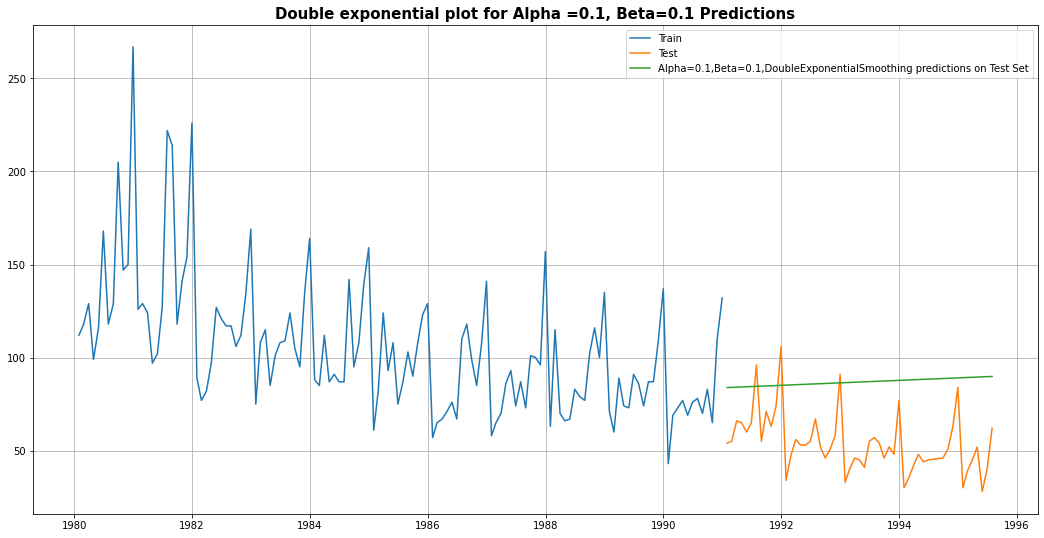

In [859]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')

plt.title('Double exponential plot for Alpha =0.1, Beta=0.1 Predictions',fontsize=15,fontweight='bold');
plt.legend(loc='best')
plt.grid();

In [860]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                               15.268955      22.82
NaiveModel                                     79.718773     145.10
SimpleAverageModel                             53.460570      94.93
2pointTrailingMovingAverage                    11.529278      13.54
4pointTrailingMovingAverage                    14.451403      19.49
6pointTrailingMovingAverage                    14.566327      20.82
9pointTrailingMovingAverage                    14.727630      21.01
Alpha=0.098,SimpleExponentialSmoothing         36.796242      63.88
Alpha=0.1,SimpleExponentialSmoothing           36.828033        NaN
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing  36.923416        NaN

In [861]:
print("For Alpha=0.1,Beta=0.1,Double Exponential Smoothing Model forecast on the test data,RMSE=",[resultsDf_7.sort_values(by=['Test RMSE'],ascending=True).values[0][3]]  )                     

For Alpha=0.1,Beta=0.1,Double Exponential Smoothing Model forecast on the test data,RMSE= [36.92341583254424]


<b>7: Triple Exponential Smoothing (Holt - Winter's Model)</b>

Three parameters  𝛼 ,  𝛽  and  𝛾  are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [862]:
TES_train = train.copy()
TES_test = test.copy()

In [863]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative',freq='M')

In [864]:
model_TES_autofit = model_TES.fit()

In [865]:
model_TES_autofit.params

{'smoothing_level': 0.06385496671075688,
 'smoothing_trend': 0.054339412544817035,
 'smoothing_seasonal': 2.2153559567160688e-07,
 'damping_trend': nan,
 'initial_level': 52.70618108899535,
 'initial_trend': -0.3295208249140407,
 'initial_seasons': array([2.14032815, 2.42886639, 2.65328858, 2.31931542, 2.60742182,
        2.84354074, 3.12509302, 3.32298216, 3.15379088, 3.08514906,
        3.59598558, 4.96000257]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [866]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(TES_test))
TES_test.head()

Rose  auto_predict
Time_Stamp                    
1991-01-31  54.0     56.813298
1991-02-28  55.0     64.281157
1991-03-31  66.0     70.011773
1991-04-30  65.0     61.016754
1991-05-31  60.0     68.391057

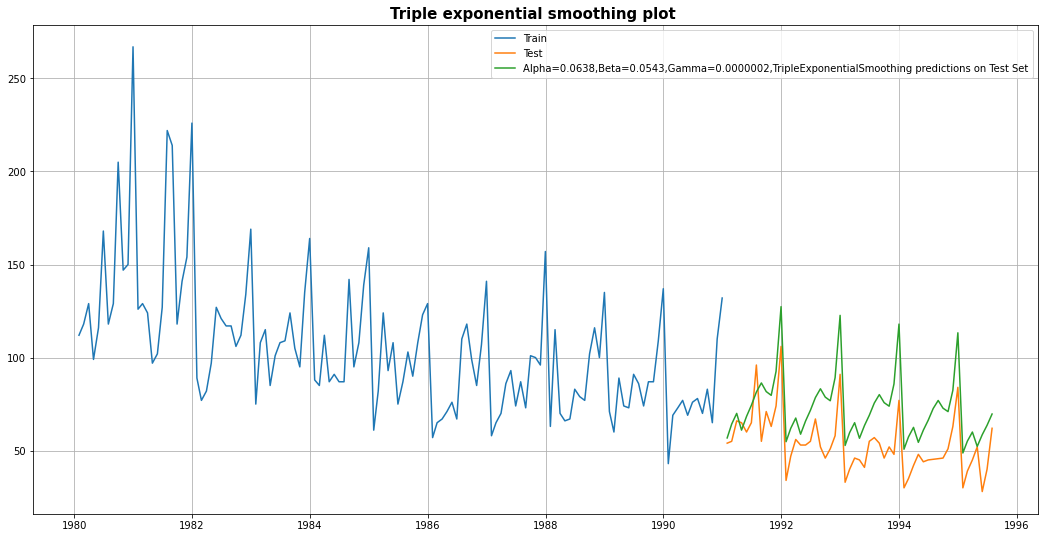

In [867]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.0638,Beta=0.0543,Gamma=0.0000002,TripleExponentialSmoothing predictions on Test Set')

plt.title('Triple exponential smoothing plot ',fontsize=15,fontweight='bold');
plt.legend(loc='best')
plt.grid();

In [868]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.0638,Beta=0.0543,Gamma=0.0000002, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.0638,Beta=0.0543,Gamma=0.0000002, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 21.255


In [869]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.0638,Beta=0.0543,Gamma=0.0000002,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    15.268955      22.82
NaiveModel                                          79.718773     145.10
SimpleAverageModel                                  53.460570      94.93
2pointTrailingMovingAverage                         11.529278      13.54
4pointTrailingMovingAverage                         14.451403      19.49
6pointTrailingMovingAverage                         14.566327      20.82
9pointTrailingMovingAverage                         14.727630      21.01
Alpha=0.098,SimpleExponentialSmoothing              36.796242      63.88
Alpha=0.1,SimpleExponentialSmoothing                36.828033        NaN
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.923416        NaN
Alpha=0.0638,Beta=0.0543,Gamma=0.0000002,Triple...  21.254806        NaN

In [870]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [871]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test))
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [872]:
resultsDf_8_2

Alpha Values  Beta Values  Gamma Values    Train RMSE     Test RMSE
0             0.3          0.3           0.3     27.217969     19.057218
1             0.3          0.3           0.4     27.399095     11.201633
2             0.3          0.3           0.5     27.928512     30.565763
3             0.3          0.3           0.6     28.888611     63.623019
4             0.3          0.3           0.7     30.568635    122.472557
..            ...          ...           ...           ...           ...
507           1.0          1.0           0.6  28358.458519   9603.635095
508           1.0          1.0           0.7  30724.126331  23029.955361
509           1.0          1.0           0.8   1218.755446   9626.710854
510           1.0          1.0           0.9  14150.253251   9691.905402
511           1.0          1.0           1.0   1768.254189   8138.618579

[512 rows x 5 columns]

In [873]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
8             0.3          0.4           0.3   28.111886  10.945435
1             0.3          0.3           0.4   27.399095  11.201633
69            0.4          0.3           0.8   32.601491  12.615607
16            0.3          0.5           0.3   29.087520  14.414604
131           0.5          0.3           0.6   32.144773  16.720720

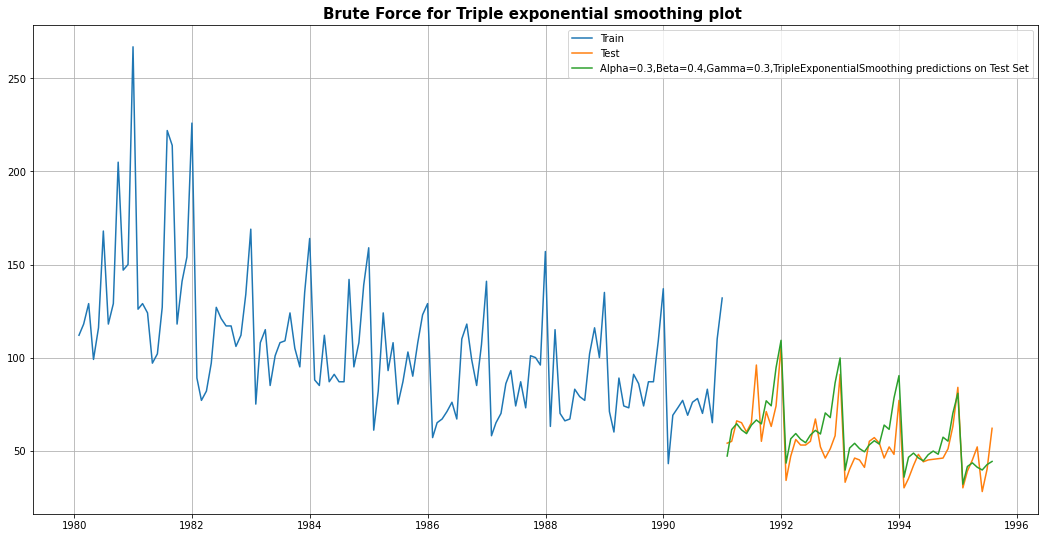

In [874]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.3, 0.4, 0.3], label='Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')

plt.title('Brute Force for Triple exponential smoothing plot ',fontsize=15,fontweight='bold');
plt.legend(loc='best')
plt.grid();

In [875]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    15.268955      22.82
NaiveModel                                          79.718773     145.10
SimpleAverageModel                                  53.460570      94.93
2pointTrailingMovingAverage                         11.529278      13.54
4pointTrailingMovingAverage                         14.451403      19.49
6pointTrailingMovingAverage                         14.566327      20.82
9pointTrailingMovingAverage                         14.727630      21.01
Alpha=0.098,SimpleExponentialSmoothing              36.796242      63.88
Alpha=0.1,SimpleExponentialSmoothing                36.828033        NaN
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.923416        NaN
Alpha=0.0638,Beta=0.0543,Gamma=0.0000002,Triple...  21.254806        NaN
Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialS...  10.945435        NaN

In [876]:
print("For Alpha=0.3,Beta=0.4,Gamma=0.3, Brute Force-Triple Exponential Smoothing Model forecast on the Test Data,RMSE is %3.3f" %resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4])

For Alpha=0.3,Beta=0.4,Gamma=0.3, Brute Force-Triple Exponential Smoothing Model forecast on the Test Data,RMSE is 10.945


In [877]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE  Test MAPE
Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialS...  10.945435        NaN
2pointTrailingMovingAverage                         11.529278      13.54
4pointTrailingMovingAverage                         14.451403      19.49
6pointTrailingMovingAverage                         14.566327      20.82
9pointTrailingMovingAverage                         14.727630      21.01
RegressionOnTime                                    15.268955      22.82
Alpha=0.0638,Beta=0.0543,Gamma=0.0000002,Triple...  21.254806        NaN
Alpha=0.098,SimpleExponentialSmoothing              36.796242      63.88
Alpha=0.1,SimpleExponentialSmoothing                36.828033        NaN
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.923416        NaN
SimpleAverageModel                                  53.460570      94.93
NaiveModel                                          79.718773     145.10

For this data, we had both trend and seasonality so by definition Triple Exponential Smoothing is supposed to work better than the Simple Exponential Smoothing as well as the Double Exponential Smoothing. However, since this was a model building exercise we had gone on to build different models on the data and have compared these model with the best RMSE value on the test data.

<b>We see that the best model is the Triple Exponential Smoothing with multiplicative seasonality with the parameters  𝛼  = 0.3,  𝛽  = 0.4 and  𝛾  = 0.3.</b>

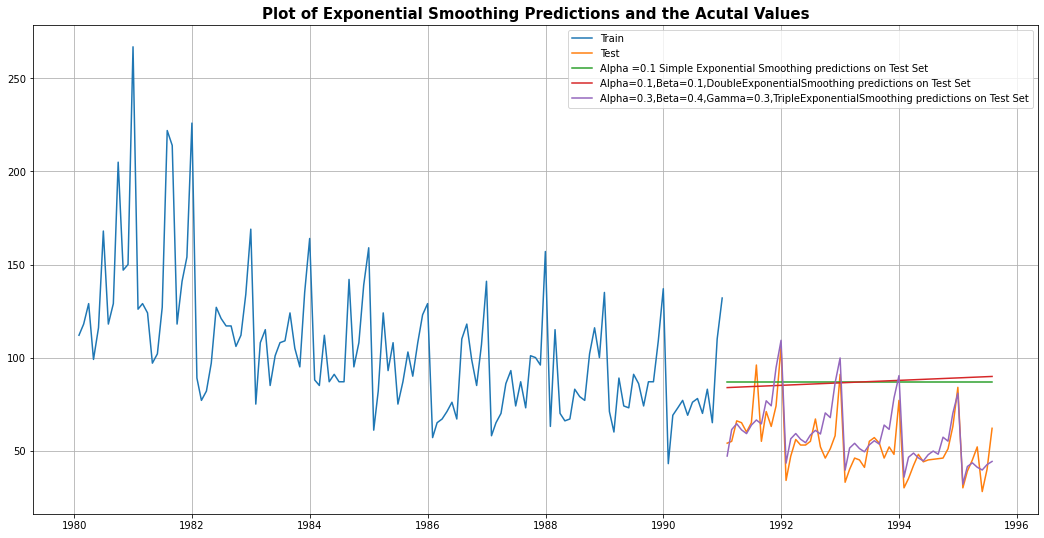

In [878]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['predict', 0.3, 0.4, 0.3], label='Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values',fontsize=15,fontweight='bold');

<b>5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.</b>

## Check for stationarity of the whole Time Series data.

In [879]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

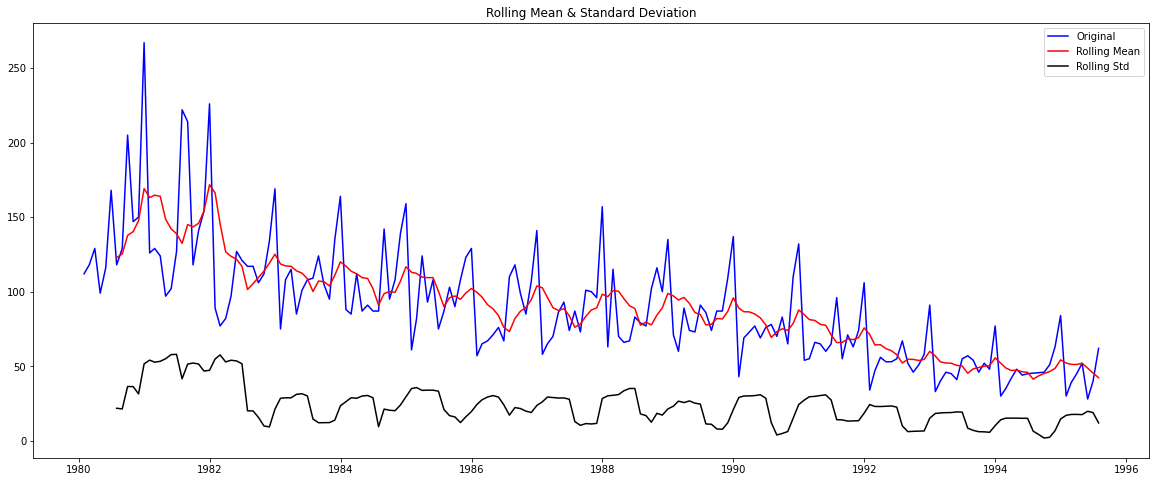

Results of Dickey-Fuller Test:
Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [880]:
test_stationarity(data['Rose'])

We see that at 5% significant level the Time Series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

In [881]:
test_stationarity(data['Rose'].diff().dropna())

Results of Dickey-Fuller Test:
Test Statistic                -8.044392e+00
p-value                        1.810895e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



We see that at $\alpha$ = 0.05 the Time Series is indeed stationary.

## Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [882]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

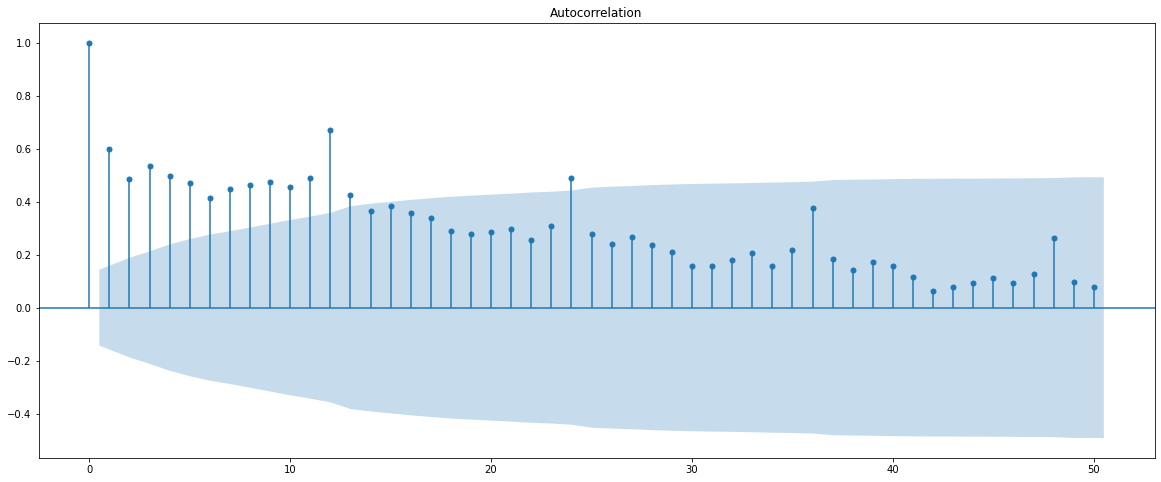

In [883]:
plot_acf(data['Rose'],lags=50)
plot_acf(data['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

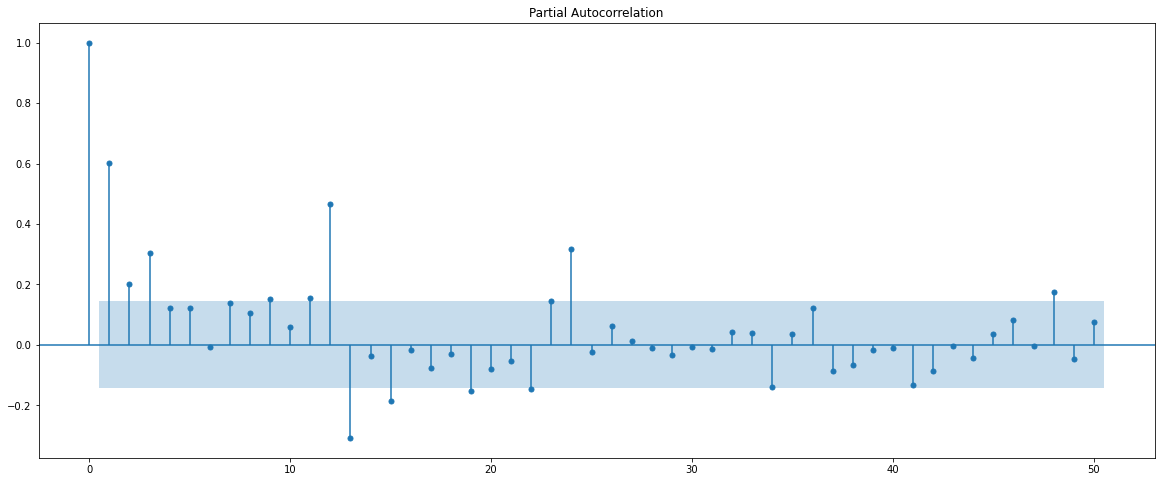

In [884]:
plot_pacf(data['Rose'],lags=50)
plot_pacf(data['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

From the above plots, we can say that there seems to be a seasonality in the data.

## Split the data into train and test and plot the training and test data.

Training Data is till the end of 1990. Test Data is from the beginning of 1991 to the last time stamp provided.

In [885]:
train=data[data.index.year < 1991]
test=data[data.index.year >= 1991]

In [886]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [887]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

Last few rows of Training Data


Rose
Time_Stamp       
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0

First few rows of Test Data


Rose
Time_Stamp      
1991-01-31  54.0
1991-02-28  55.0
1991-03-31  66.0
1991-04-30  65.0
1991-05-31  60.0

Last few rows of Test Data


Rose
Time_Stamp      
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  62.0

In [888]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


## Check for stationarity of the Training Data Time Series.

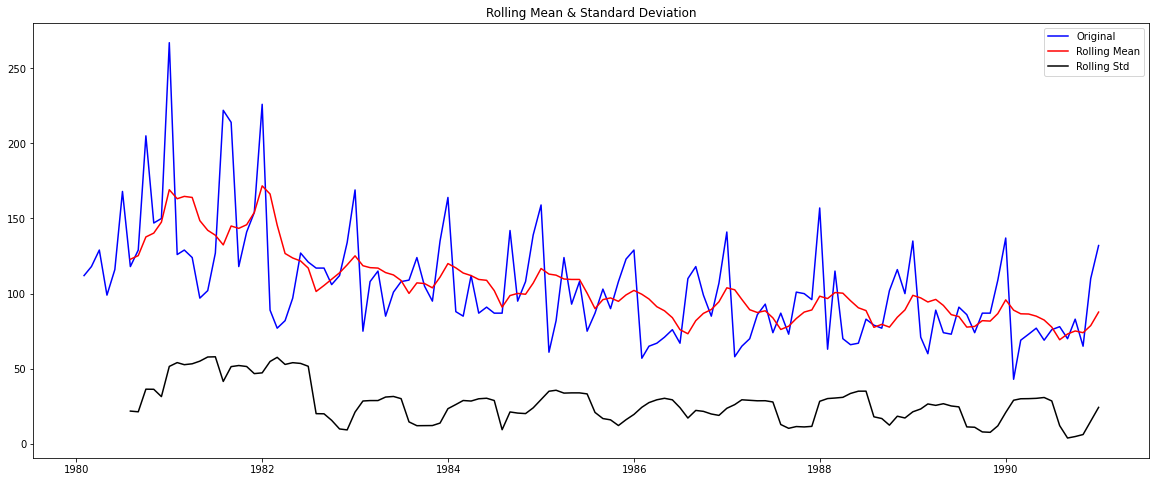

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [889]:
test_stationarity(train['Rose'])

We see that the series is not stationary at $\alpha$ = 0.05.

In [890]:
test_stationarity(train['Rose'].diff().dropna())

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



We see that after taking a difference of order 1 the series have become stationary at $\alpha$ = 0.05.

##### Note: If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there. You can look at other kinds of transformations as part of making the time series stationary like taking logarithms.

In [891]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


<b>6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.</b>

<b><center>AUTOMATED VERSION OF ARIMA</b></center>

##### Note: The data has some seasonality so ideally we should build a SARIMA model. But for demonstration purposes we are building an ARIMA model both by looking at the minimum AIC criterion and by looking at the ACF and the PACF plots.

In [892]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [893]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [894]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.7261830464226
ARIMA(0, 1, 2) - AIC:1276.8353736830445
ARIMA(1, 1, 0) - AIC:1319.3483105806022
ARIMA(1, 1, 1) - AIC:1277.7757516295917
ARIMA(1, 1, 2) - AIC:1277.359223715715
ARIMA(2, 1, 0) - AIC:1300.609261174395
ARIMA(2, 1, 1) - AIC:1279.0456894093104
ARIMA(2, 1, 2) - AIC:1279.2986939365128


In [895]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
2  (0, 1, 2)  1276.835374
5  (1, 1, 2)  1277.359224
4  (1, 1, 1)  1277.775752
7  (2, 1, 1)  1279.045689
8  (2, 1, 2)  1279.298694
1  (0, 1, 1)  1280.726183
6  (2, 1, 0)  1300.609261
3  (1, 1, 0)  1319.348311
0  (0, 1, 0)  1335.152658

In [896]:
auto_ARIMA = ARIMA(train['Rose'], order=(0,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -634.418
Method:                       css-mle   S.D. of innovations             30.167
Date:                Sun, 20 Feb 2022   AIC                           1276.835
Time:                        13:28:25   BIC                           1288.336
Sample:                    02-29-1980   HQIC                          1281.509
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4885      0.085     -5.742      0.000      -0.655      -0.322
ma.L1.D.Rose    -0.7601      0.101     -7.499      0.000      -0.959      -0.561
ma.L2.D.Rose    -0.2398      0.095     -2.51

<b>Predict on the Test Set using this model and evaluate the model.</b>

In [897]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [898]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA[0],squared=False)
print("RMSE of Automated ARIMA(0,1,2) on testing data:",rmse)

RMSE of Automated ARIMA(0,1,2) on testing data: 15.618281486391918


In [899]:
from sklearn import metrics

def MAPE(y, yhat):
    y,yhat = np.array(y), np.array(yhat)
    try:
        mape = round(np.sum(np.abs(yhat-y))/np.sum(y)*100,2)
    except:
        print("Observed values are blank")
        mape = np.nan
    return mape

mape = MAPE(test['Rose'],predicted_auto_ARIMA[0])
print(mape)

23.27


In [900]:
resultsDf = pd.DataFrame({'RMSE': [rmse], 'MAPE':[mape]}
                           ,index=['ARIMA(0,1,2)'])

resultsDf

RMSE   MAPE
ARIMA(0,1,2)  15.618281  23.27

<b><center>AUTOMATED VERSION OF SARIMA</center></b>

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

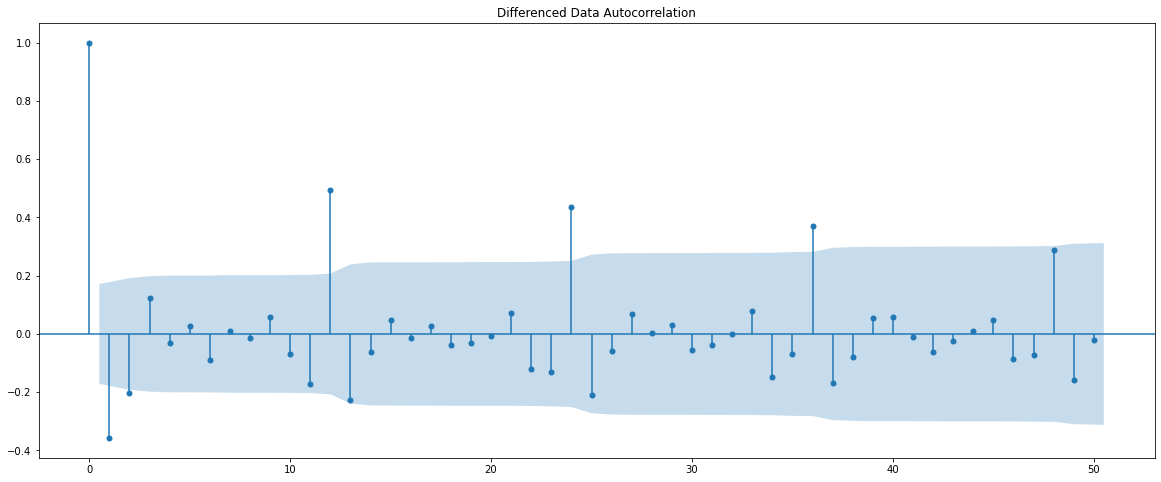

In [901]:
plot_acf(train['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

We see that there can be a seasonality of 12. We will run our auto SARIMA models by setting seasonality at 12.

<b>Setting the seasonality as 12 for the first iteration of the auto SARIMA model.</b>

In [902]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [903]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [904]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207496
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380887
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869386934
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.691363575153
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697556
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945658
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918334
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383718
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.7936324918726
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.743433094653
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483312526
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866535977
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461671
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988291205371
SARIMA(0, 1, 2)x(0, 0, 

In [905]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal         AIC
26  (0, 1, 2)  (2, 0, 2, 12)  887.937509
53  (1, 1, 2)  (2, 0, 2, 12)  889.901508
80  (2, 1, 2)  (2, 0, 2, 12)  890.668798
69  (2, 1, 1)  (2, 0, 0, 12)  896.518161
78  (2, 1, 2)  (2, 0, 0, 12)  897.346444

In [906]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Sun, 20 Feb 2022   AIC                            887.938
Time:                                    13:29:18   BIC                            906.448
Sample:                                         0   HQIC                           895.437
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8427    189.947     -0.004      0.996    -373.133     371.447
ma.L2         -0.1573     29.842   

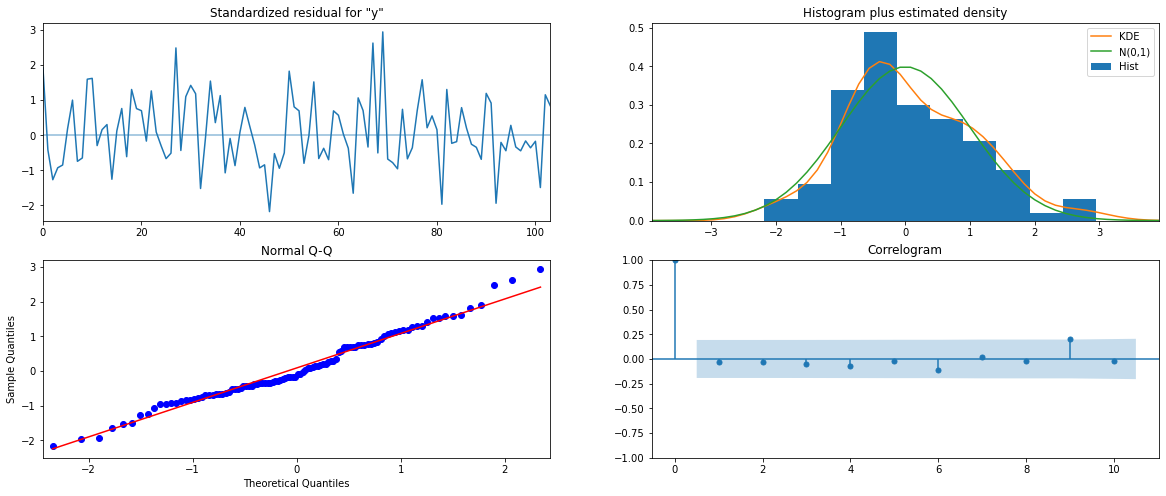

In [907]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

<b>Here  we see that the model diagnostics plot does not indicate any remaining information that we can get.</b>

<b>Predict on the Test Set using this model and evaluate the model.</b>

In [908]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [909]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  62.867264  15.928501      31.647976      94.086553
1  70.541190  16.147659      38.892360     102.190020
2  77.356411  16.147657      45.707585     109.005236
3  76.208814  16.147657      44.559988     107.857639
4  72.747398  16.147657      41.098573     104.396223

In [910]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print("RMSE of Automated SARIMA(0,1,2)(2,0,2,12) on testing data:",rmse)

mape = MAPE(test['Rose'],predicted_auto_SARIMA_12.predicted_mean)
print(mape)

RMSE of Automated SARIMA(0,1,2)(2,0,2,12) on testing data: 26.92836200140455
46.6


In [911]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse],'MAPE': [mape]}
                           ,index=['SARIMA(0,1,2)(2,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE   MAPE
ARIMA(0,1,2)             15.618281  23.27
SARIMA(0,1,2)(2,0,2,12)  26.928362  46.60

We see that the RMSE value have not reduced further when the seasonality parameter was changed to 12.

<b><center>7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.</center></b>

<b>MANUAL ARIMA</b>

<b>Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.</b>

Let us look at the ACF and the PACF plots once more.

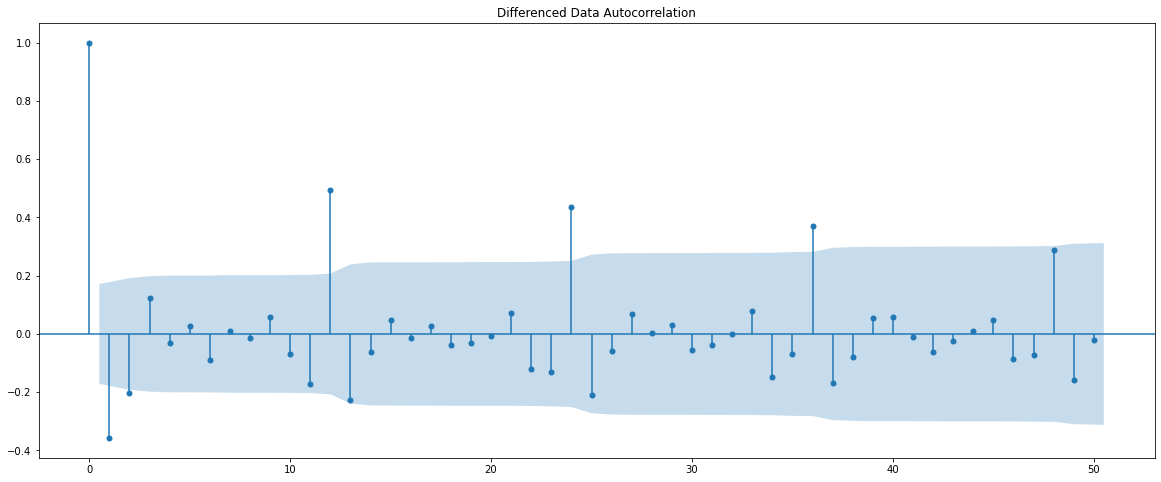

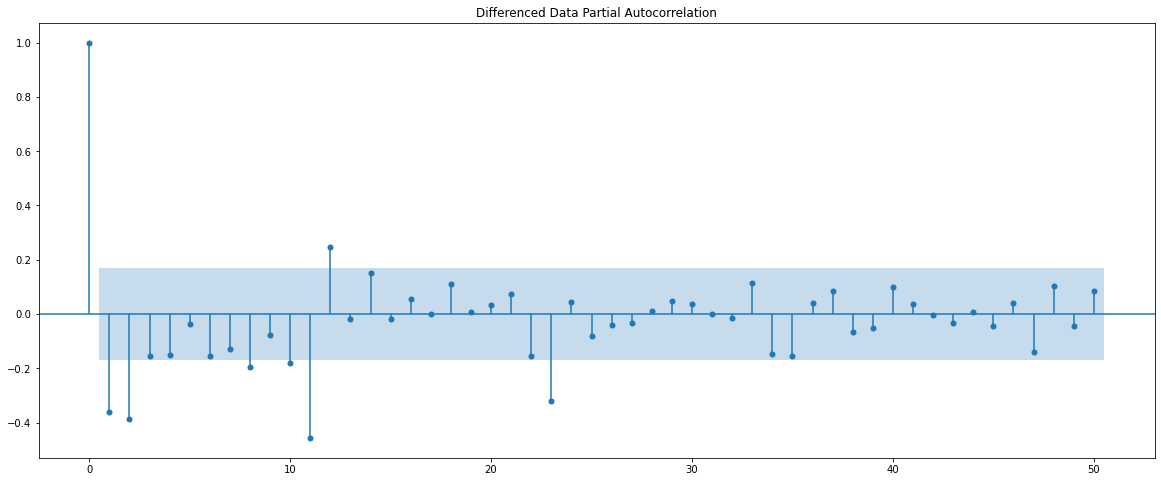

In [912]:
plot_acf(train.diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(train.diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 0.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 0.

By looking at the above plots, we can say that both the PACF and ACF plot cuts-off at lag 0.

In [913]:
manual_ARIMA = ARIMA(train['Rose'].astype('float64'), order=(2,1,2),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -633.649
Method:                       css-mle   S.D. of innovations             29.975
Date:                Sun, 20 Feb 2022   AIC                           1279.299
Time:                        13:29:20   BIC                           1296.550
Sample:                    02-29-1980   HQIC                          1286.309
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4911      0.081     -6.076      0.000      -0.649      -0.333
ar.L1.D.Rose    -0.4383      0.218     -2.015      0.044      -0.865      -0.012
ar.L2.D.Rose     0.0269      0.109      0.24

We get a comparatively simpler model by looking at the ACF and the PACF plots.

###### Note: When we see that both the AR(p) and the MA(q) model are of order 0, we have to convert the input variable into a 'float64' type variable else Python might throw an error.

<b>Predict on the Test Set using this model and evaluate the model.</b>

In [914]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [915]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA[0],squared=False)
print("RMSE of ARIMA model based on cut off points(2,1,2)on testing data:",rmse)

mape = MAPE(test['Rose'],predicted_manual_ARIMA[0])
print(rmse)
print(mape)

RMSE of ARIMA model based on cut off points(2,1,2)on testing data: 15.354883182467582
15.354883182467582
22.77


In [916]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse],'MAPE': [mape]}
                           ,index=['ARIMA(2,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE   MAPE
ARIMA(0,1,2)             15.618281  23.27
SARIMA(0,1,2)(2,0,2,12)  26.928362  46.60
ARIMA(2,1,2)             15.354883  22.77

We see that there is difference in the RMSE values for both the models, but remember that the second model is a much simpler model.

<b>MANUAL SARIMA</b>

Let us look at the ACF and the PACF plots once more.

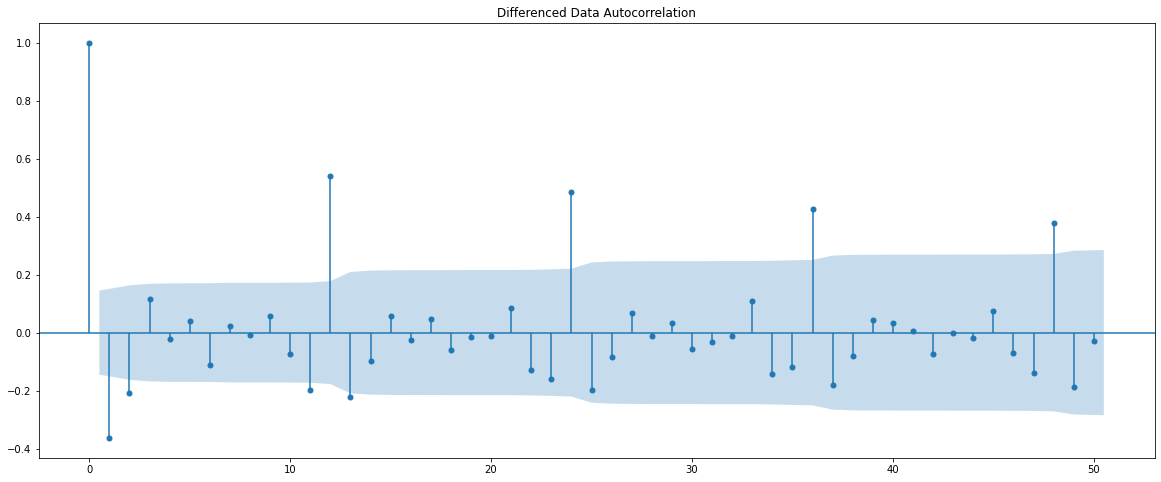

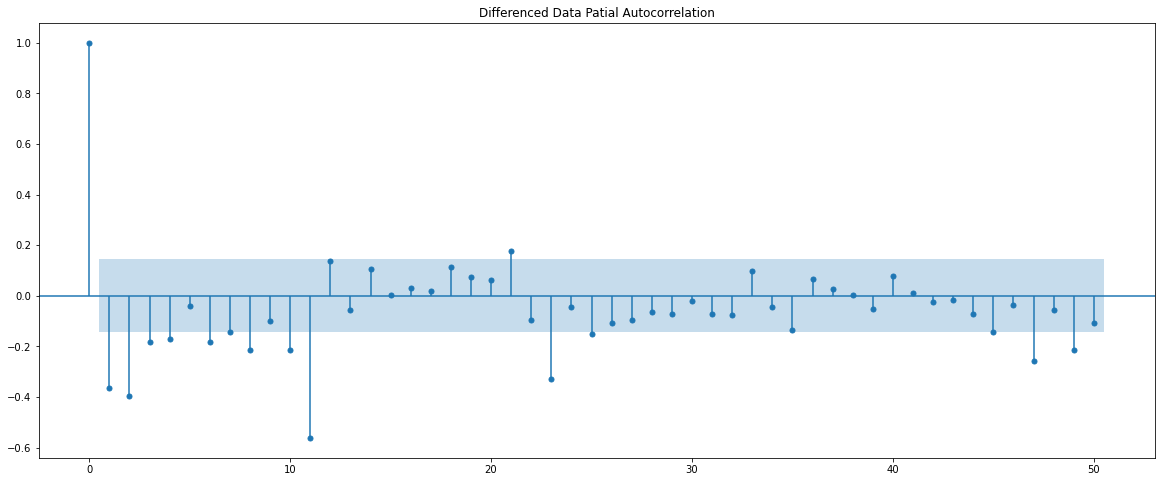

In [917]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

We see that our ACF plot at the seasonal interval (6) does not taper off. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

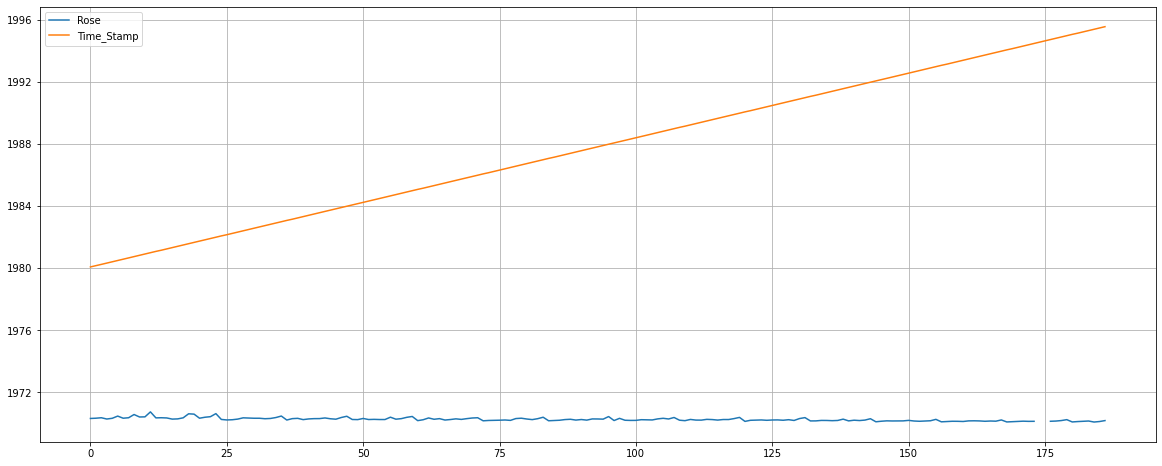

In [918]:
df.plot()
plt.grid();

We see that there is a trend and a seasonality. So, now we take a seasonal differencing and check the series.

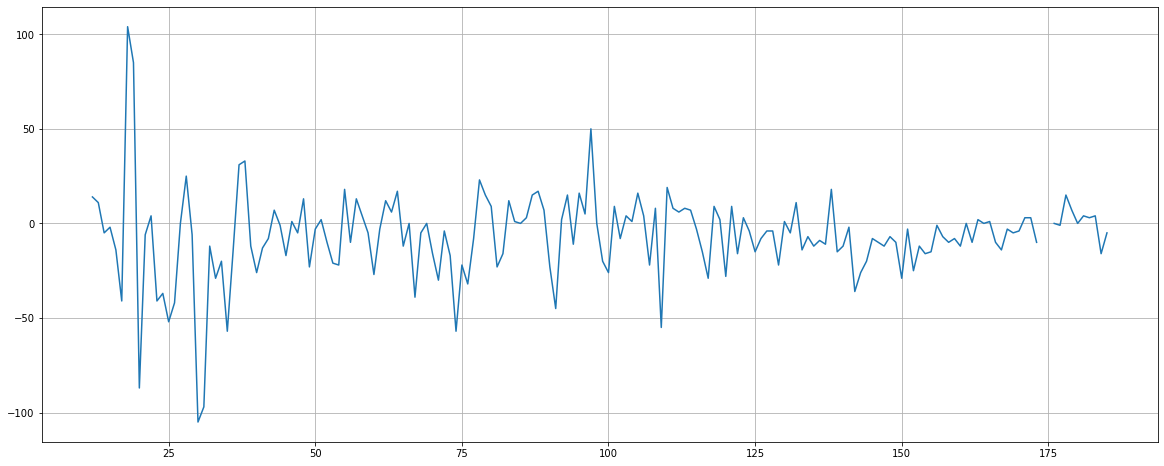

In [919]:
(df['Rose'].diff(12)).plot()
plt.grid();

We see that there might be a slight trend which can be noticed in the data. So we take a differencing of first order on the seasonally differenced series.

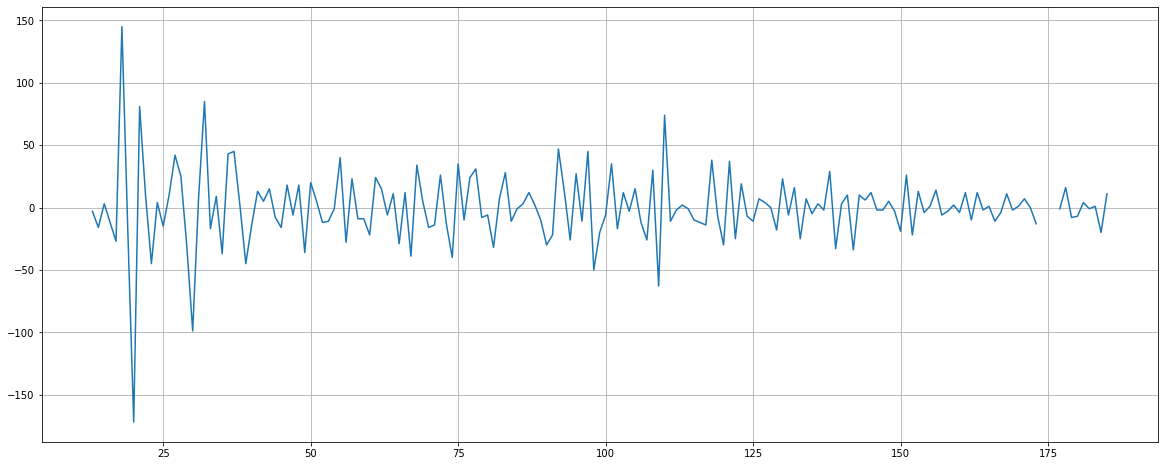

In [920]:
(df['Rose'].diff(12)).diff().plot()
plt.grid();

Now we see that there is almost no trend present in the data. Seasonality is only present in the data.
Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.

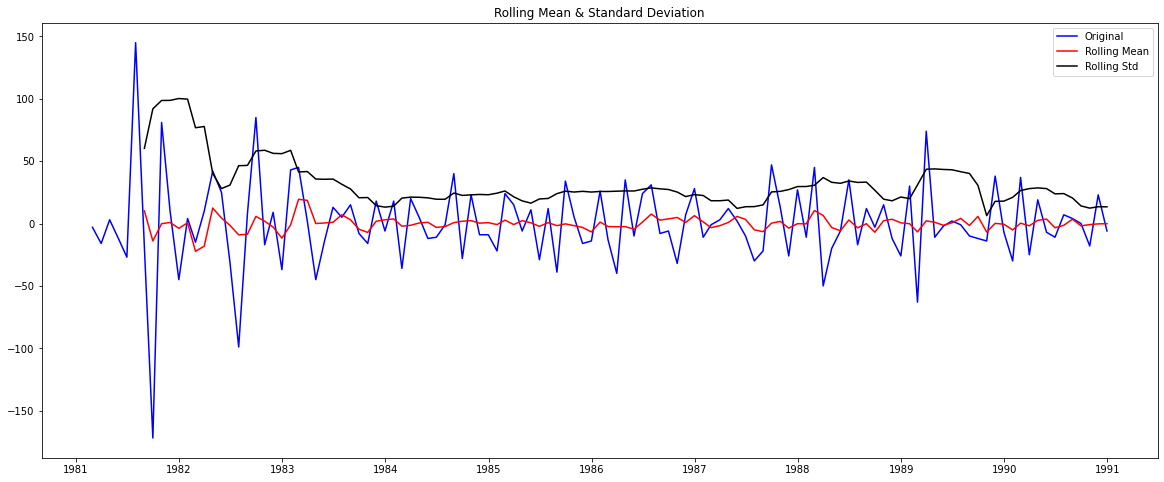

Results of Dickey-Fuller Test:
Test Statistic                  -3.692348
p-value                          0.004222
#Lags Used                      11.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64 



In [921]:
test_stationarity((train['Rose'].diff(12).dropna()).diff(1).dropna())

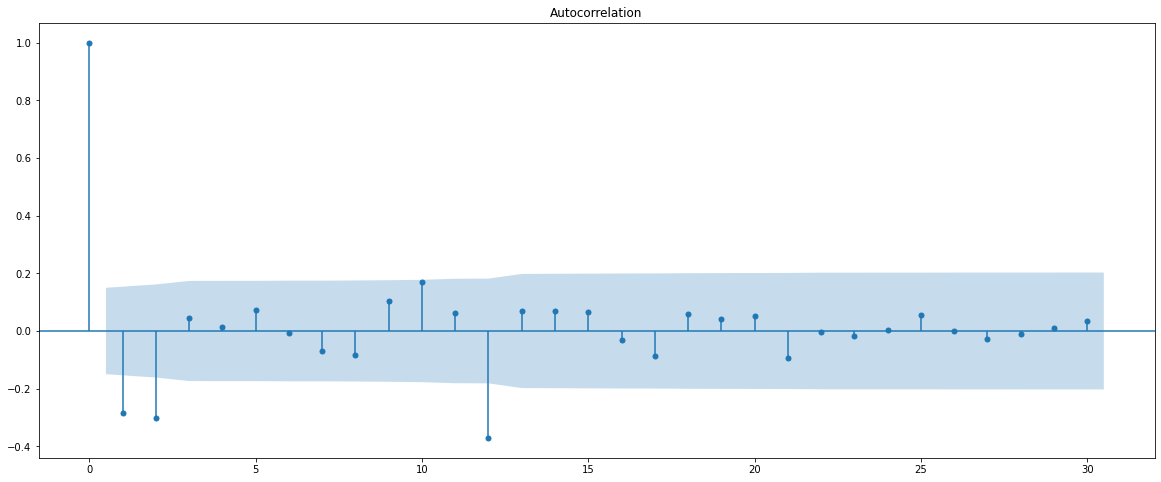

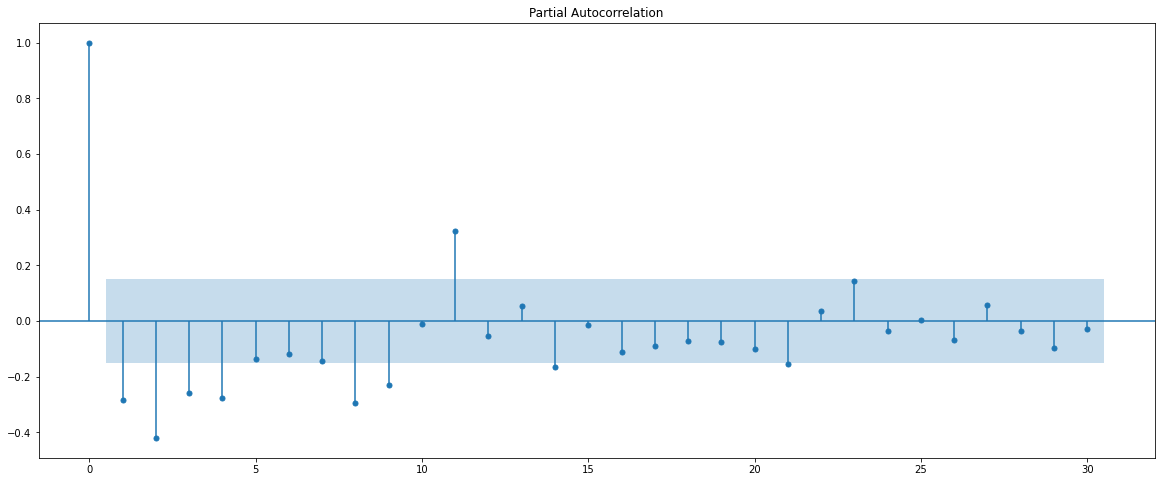

In [922]:
#Checking the ACF and the PACF plots for the new modified Time Series.
plot_acf((df['Rose'].diff(12).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df['Rose'].diff(12).dropna()).diff(1).dropna(),lags=30);

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 6. We will keep the p(1) and q(1) parameters same as the ARIMA model.

The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0.
The Moving-Average parameter in an SARIMA model is 'q' which comes from the significant lag after which the ACF plot cuts-off to 0. Remember to check the ACF and the PACF plots only at multiples of 6 (since 6 is the seasonal period).
By looking at the plots we see that the ACF and the PACF do not directly cut-off to 0.

This is a common problem while building models by looking at the ACF and the PACF plots. But we are able to explain the model.

In [923]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(2, 1, 2),
                                seasonal_order=(4, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(4, 1, 2, 12)   Log Likelihood                -284.472
Date:                            Sun, 20 Feb 2022   AIC                            590.945
Time:                                    13:29:43   BIC                            615.520
Sample:                                         0   HQIC                           600.695
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9802      0.224     -4.377      0.000      -1.419      -0.541
ar.L2         -0.1271      0.143   

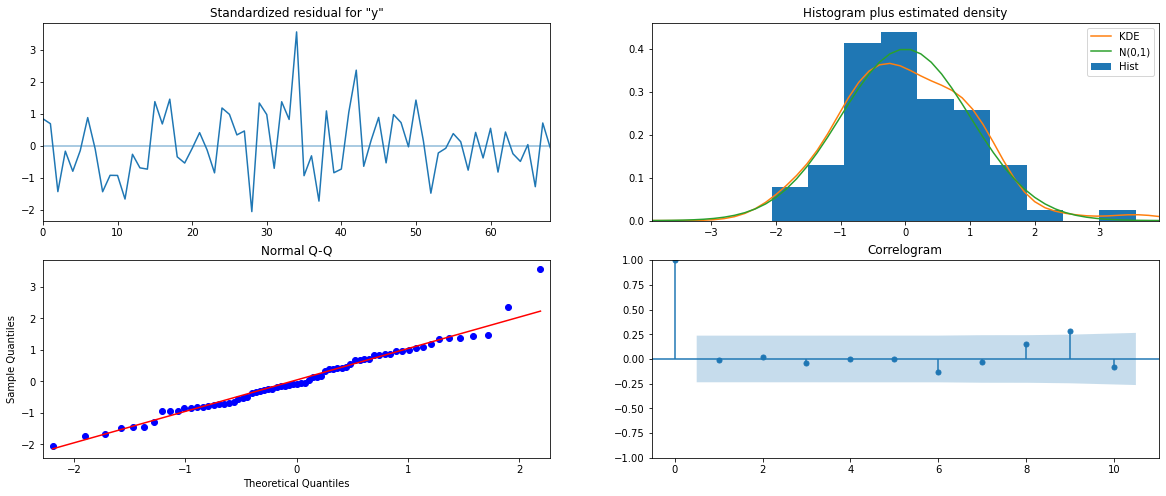

In [924]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

The model diagnostics plot looks okay.

<b>Predict on the Test Set using this model and evaluate the model.</b>

In [925]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [926]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  43.935856  14.045774      16.406644      71.465067
1  72.270905  14.055022      44.723569      99.818242
2  63.974987  14.044871      36.447546      91.502427
3  60.122569  14.228233      32.235745      88.009394
4  61.357100  14.218963      33.488444      89.225755

In [927]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print("RMSE of SARIMA model based on cut off points(2,1,2)(4,1,2,12)on testing data:",rmse)
mape = MAPE(test['Rose'],predicted_manual_SARIMA_6.predicted_mean)
print(mape)

RMSE of SARIMA model based on cut off points(2,1,2)(4,1,2,12)on testing data: 17.342304252159312
26.69


In [928]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse], 'MAPE': [mape]}
                           ,index=['SARIMA(2,1,2)(4,1,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE   MAPE
ARIMA(0,1,2)             15.618281  23.27
SARIMA(0,1,2)(2,0,2,12)  26.928362  46.60
ARIMA(2,1,2)             15.354883  22.77
SARIMA(2,1,2)(4,1,2,12)  17.342304  26.69

This is where our model building exercise ends. 

Please do try out with 12 as a seasonal parameter and check whether that gives you a better RMSE value. Also, try taking different kinds of transformations as well.

Now, we will take our best model and forecast 12 months into the future with appropriate confidence intervals to see how the predictions look. We have to build our model on the full data for this.

<b>8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.</b>

<b>9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.</b>

<b>Building the most optimum model on the Full Data.</b>

## Evaluate the model on the whole and predict 12 months into the future (till the end of next year).

<b><center>1.Triple exponential</center></b>

In [581]:
fullmodel1 = ExponentialSmoothing(data,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.3,
                                                                 smoothing_slope=0.4,
                                                                 smoothing_seasonal=0.3)

In [587]:
RMSE_fullmodel1 = metrics.mean_squared_error(data['Rose'],fullmodel1.fittedvalues,squared=False)

print('RMSE of Triple exponential smoothing on entire data:',RMSE_fullmodel1)

RMSE of Triple exponential smoothing on entire data: 20.672560612963352


In [583]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = fullmodel1.forecast(steps=12)
prediction_1

1995-08-31    40.466299
1995-09-30    39.523150
1995-10-31    41.472534
1995-11-30    48.011557
1995-12-31    68.284700
1996-01-31    25.686714
1996-02-29    32.790356
1996-03-31    38.933982
1996-04-30    41.796358
1996-05-31    32.872603
1996-06-30    39.665795
1996-07-31    41.833692
Freq: M, dtype: float64

In [584]:
data.plot()
plt.title("12 month forecast done on entire data using Triple exponential smoothing(AIC)", fontsize=15,fontweight='bold')
prediction_1.plot();

In [585]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df

lower_CI  prediction    upper_ci
1995-08-31  -0.145491   40.466299   81.078089
1995-09-30  -1.088640   39.523150   80.134940
1995-10-31   0.860744   41.472534   82.084324
1995-11-30   7.399767   48.011557   88.623347
1995-12-31  27.672910   68.284700  108.896490
1996-01-31 -14.925076   25.686714   66.298504
1996-02-29  -7.821434   32.790356   73.402146
1996-03-31  -1.677808   38.933982   79.545772
1996-04-30   1.184568   41.796358   82.408148
1996-05-31  -7.739187   32.872603   73.484393
1996-06-30  -0.945996   39.665795   80.277585
1996-07-31   1.221901   41.833692   82.445482

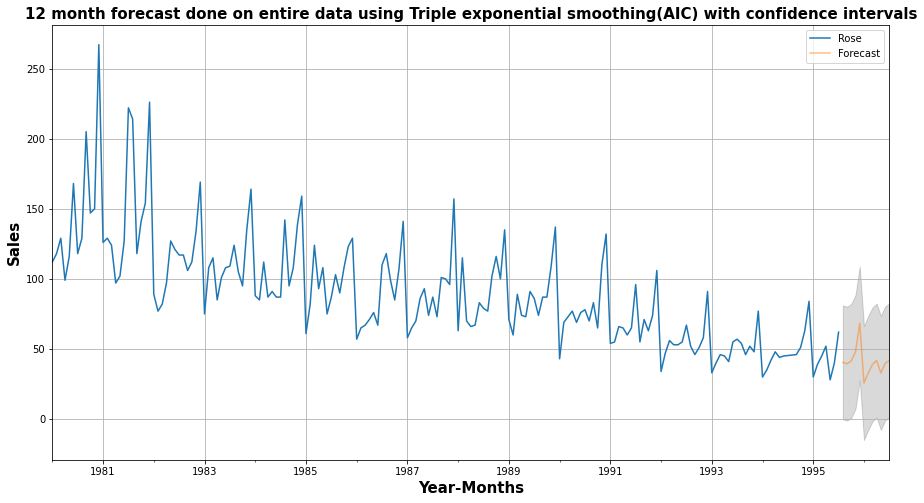

In [586]:
# plot the forecast along with the confidence band

axis = data.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months',fontsize=15,fontweight='bold')
axis.set_ylabel('Sales',fontsize=15,fontweight='bold')
plt.legend(loc='best')
plt.title("12 month forecast done on entire data using Triple exponential smoothing(AIC) with confidence intervals", fontsize=15,fontweight='bold')
plt.grid()
plt.show()

<b><center>Sparkling.csv</center></b>

<b>1. Read the data as an appropriate Time Series data and plot the data.</b>

In [931]:
df1 = pd.read_csv('Sparkling.csv')
df1.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [932]:
df1.tail()

YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

In [933]:
df1.isnull().sum()

YearMonth    0
Sparkling    0
dtype: int64

In [934]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [935]:
## Creating the Time Stamps and adding to the data frame to make it a Time Series Data

date1 = pd.date_range(start='1/1/1980', end='1/1/1996', freq='M')
date1

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1995-03-31', '1995-04-30', '1995-05-31', '1995-06-30',
               '1995-07-31', '1995-08-31', '1995-09-30', '1995-10-31',
               '1995-11-30', '1995-12-31'],
              dtype='datetime64[ns]', length=192, freq='M')

In [936]:
# Adding the time stamp to the data frame
df1['Time_Stamp'] = pd.DataFrame(date1,columns=['Month'])
df1.head()

YearMonth  Sparkling Time_Stamp
0   1980-01       1686 1980-01-31
1   1980-02       1591 1980-02-29
2   1980-03       2304 1980-03-31
3   1980-04       1712 1980-04-30
4   1980-05       1471 1980-05-31

In [937]:
data1=df1.set_index('Time_Stamp')

In [938]:
data1.head()

YearMonth  Sparkling
Time_Stamp                     
1980-01-31   1980-01       1686
1980-02-29   1980-02       1591
1980-03-31   1980-03       2304
1980-04-30   1980-04       1712
1980-05-31   1980-05       1471

In [939]:
#data.interpolate(method='pad')['1994'].tail(8)

## Plot the Time Series to understand the behaviour of the data.

# The following code is to set the subsequent figure sizes

#from pylab import rcParams
#rcParams['figure.figsize'] = 20,8

In [940]:
df1['Sparkling'].plot(figsize=(20,8))


<AxesSubplot:>

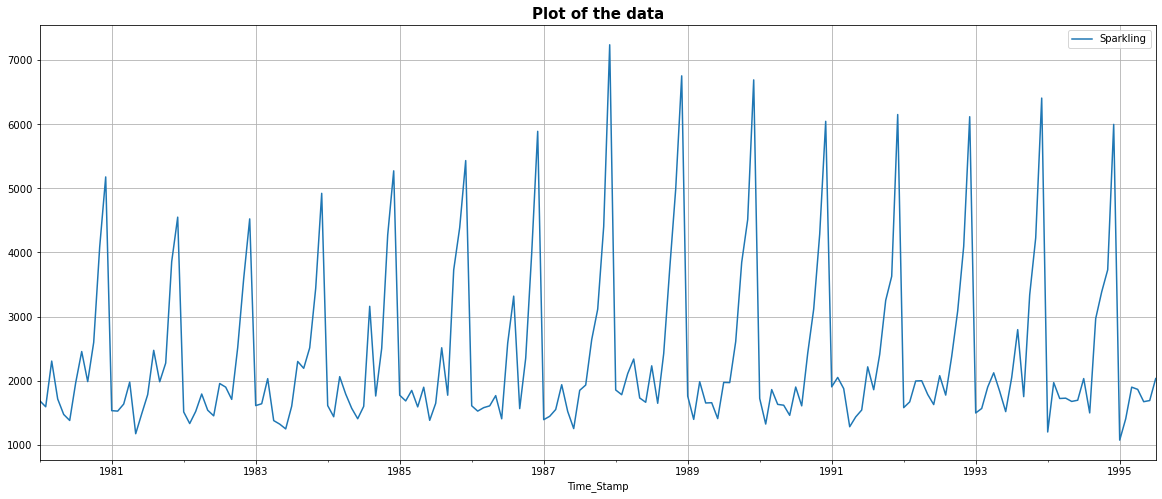

In [941]:
data1.plot()
plt.title("Plot of the data",fontsize=15,fontweight='bold') 
plt.grid();

In [942]:
#dropping the YearMonth column

data1.drop(['YearMonth'], axis=1, inplace=True)
data1.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

We can see that there is a slight downward trend with a seasonal pattern associated as well.

<b>2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.</b>

In [943]:
## Check the basic measures of descriptive statistics

data1.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

The basic measures of descriptive statistics tell us how the Sales have varied across years. But remember, for this measure of descriptive statistics we have averaged over the whole data without taking the time component into account.

Text(0.5, 1.0, 'Yearly Box plot')

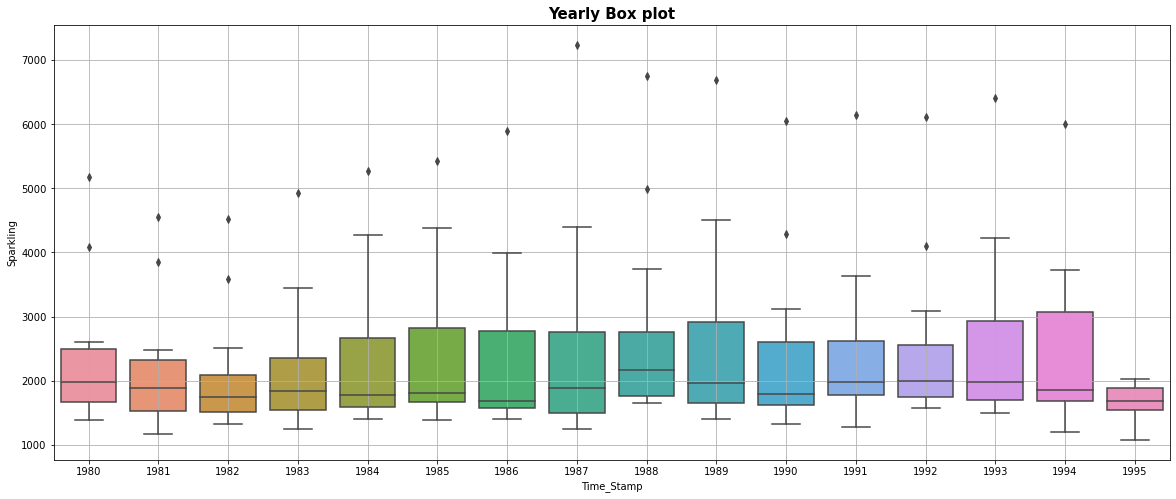

In [944]:
## Plot a boxplot to understand the sales across different years and within different months across years.

### Yearly Boxplot

sns.boxplot(x = data1.index.year,y = data1['Sparkling'])
plt.grid();
plt.title("Yearly Box plot", fontsize=15,fontweight='bold')

The yearly boxplots also shows that the Sales have decreased towards the last few years.

In [945]:
### Monthly Plot

sns.boxplot(x = data1.index.month_name(),y = data1['Sparkling'])
plt.grid();
plt.title("Monthly box plot", fontsize=15,fontweight='bold')

Text(0.5, 1.0, 'Monthly box plot')

There is a clear distinction of 'Sparkling wine' within different months spread across various years. The highest such numbers are being recorded in the month of July-August across various years.

<b>Plotting yearly sales across months</b>

In [946]:
yearly_sales_across_months = pd.pivot_table(data1, values='Sparkling',columns = data1.index.month_name(),index = data1.index.year)
yearly_sales_across_months

Time_Stamp   April  August  December  February  January    July    June  \
Time_Stamp                                                                
1980        1712.0  2453.0    5179.0    1591.0   1686.0  1966.0  1377.0   
1981        1976.0  2472.0    4551.0    1523.0   1530.0  1781.0  1480.0   
1982        1790.0  1897.0    4524.0    1329.0   1510.0  1954.0  1449.0   
1983        1375.0  2298.0    4923.0    1638.0   1609.0  1600.0  1245.0   
1984        1789.0  3159.0    5274.0    1435.0   1609.0  1597.0  1404.0   
1985        1589.0  2512.0    5434.0    1682.0   1771.0  1645.0  1379.0   
1986        1605.0  3318.0    5891.0    1523.0   1606.0  2584.0  1403.0   
1987        1935.0  1930.0    7242.0    1442.0   1389.0  1847.0  1250.0   
1988        2336.0  1645.0    6757.0    1779.0   1853.0  2230.0  1661.0   
1989        1650.0  1968.0    6694.0    1394.0   1757.0  1971.0  1406.0   
1990        1628.0  1605.0    6047.0    1321.0   1720.0  1899.0  1457.0   
1991        1279.0  1857.0    6153.0    2049.0   1902.0  2214.0  1540.0   
1992        1997.0  1773.0    6119.0    1667.0   1577.0  2076.0  1625.0   
1993        2121.0  2795.0    6410.0    1564.0   1494.0  2048.0  1515.0   
1994        1725.0  1495.0    5999.0    1968.0   1197.0  2031.0  1693.0   
1995        1862.0     NaN       NaN    1402.0   1070.0  2031.0  1688.0   

Time_Stamp   March     May  November  October  September  
Time_Stamp                                                
1980        2304.0  1471.0    4087.0   2596.0     1984.0  
1981        1633.0  1170.0    3857.0   2273.0     1981.0  
1982        1518.0  1537.0    3593.0   2514.0     1706.0  
1983        2030.0  1320.0    3440.0   2511.0     2191.0  
1984        2061.0  1567.0    4273.0   2504.0     1759.0  
1985        1846.0  1896.0    4388.0   3727.0     1771.0  
1986        1577.0  1765.0    3987.0   2349.0     1562.0  
1987        1548.0  1518.0    4405.0   3114.0     2638.0  
1988        2108.0  1728.0    4988.0   3740.0     2421.0  
1989        1982.0  1654.0    4514.0   3845.0     2608.0  
1990        1859.0  1615.0    4286.0   3116.0     2424.0  
1991        1874.0  1432.0    3627.0   3252.0     2408.0  
1992        1993.0  1783.0    4096.0   3088.0     2377.0  
1993        1898.0  1831.0    4227.0   3339.0     1749.0  
1994        1720.0  1674.0    3729.0   3385.0     2968.0  
1995        1897.0  1670.0       NaN      NaN        NaN

In [947]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_across_months.plot(ax=ax)
plt.title('Yearly sales across months', fontsize=15,fontweight='bold')
plt.grid();

<b>Sampling the data annually</b>

In [948]:
df_yearly_sum = data1.resample('A').sum()
df_yearly_sum.head()

Sparkling
Time_Stamp           
1980-12-31      28406
1981-12-31      26227
1982-12-31      25321
1983-12-31      26180
1984-12-31      28431

In [949]:
df_yearly_sum

Sparkling
Time_Stamp           
1980-12-31      28406
1981-12-31      26227
1982-12-31      25321
1983-12-31      26180
1984-12-31      28431
1985-12-31      29640
1986-12-31      29170
1987-12-31      30258
1988-12-31      33246
1989-12-31      31443
1990-12-31      28977
1991-12-31      29587
1992-12-31      30171
1993-12-31      30991
1994-12-31      29584
1995-12-31      11620

Text(0.5, 1.0, 'Yearly data plot')

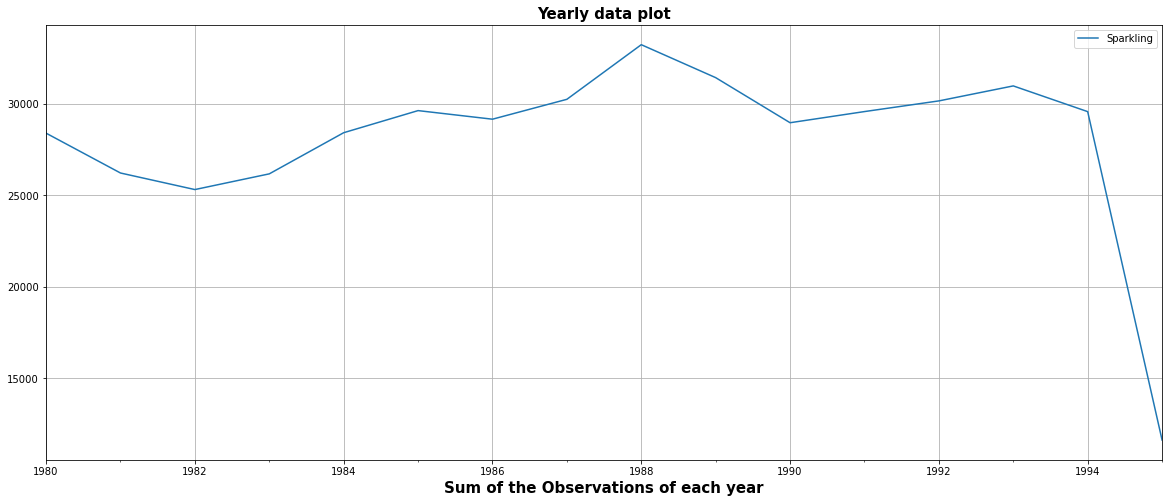

In [950]:
df_yearly_sum.plot();
plt.grid()
plt.xlabel("Sum of the Observations of each year", fontsize=15,fontweight='bold');
plt.title("Yearly data plot", fontsize=15,fontweight='bold')

<b>Sampling the data quaterly</b>

In [951]:
df_quarterly_mean = data1.resample('Q').mean()
df_quarterly_mean.head()

Sparkling
Time_Stamp             
1980-03-31  1860.333333
1980-06-30  1520.000000
1980-09-30  2134.333333
1980-12-31  3954.000000
1981-03-31  1562.000000

In [952]:
df_quarterly_mean

Sparkling
Time_Stamp             
1980-03-31  1860.333333
1980-06-30  1520.000000
1980-09-30  2134.333333
1980-12-31  3954.000000
1981-03-31  1562.000000
...                 ...
1994-09-30  2164.666667
1994-12-31  4371.000000
1995-03-31  1456.333333
1995-06-30  1740.000000
1995-09-30  2031.000000

[63 rows x 1 columns]

Text(0.5, 1.0, 'Quaterly data plot')

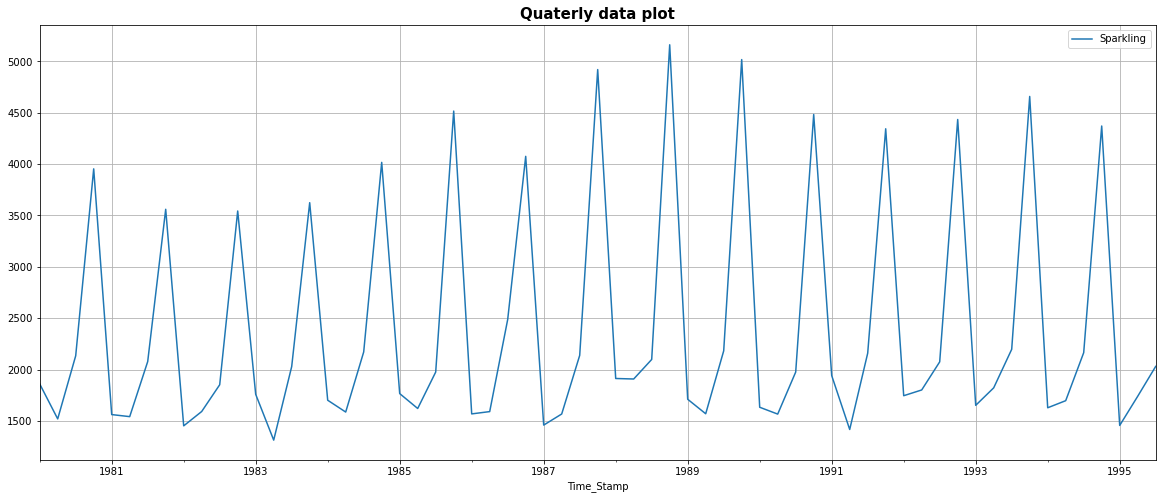

In [953]:
df_quarterly_mean.plot();
plt.grid()
plt.title("Quaterly data plot", fontsize=15,fontweight='bold')

<b>Sampling the data daily</b>

In [954]:
df_daily_sum = data1.resample('D').sum()
df_daily_sum

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-01          0
1980-02-02          0
1980-02-03          0
1980-02-04          0
...               ...
1995-07-27          0
1995-07-28          0
1995-07-29          0
1995-07-30          0
1995-07-31       2031

[5661 rows x 1 columns]

In [955]:
df_daily_sum.sort_values( by=['Sparkling'],ascending=False)

Sparkling
Time_Stamp           
1987-12-31       7242
1988-12-31       6757
1989-12-31       6694
1993-12-31       6410
1991-12-31       6153
...               ...
1985-06-09          0
1985-06-08          0
1985-06-07          0
1985-06-06          0
1987-12-07          0

[5661 rows x 1 columns]

Text(0.5, 1.0, 'Daily data plot')

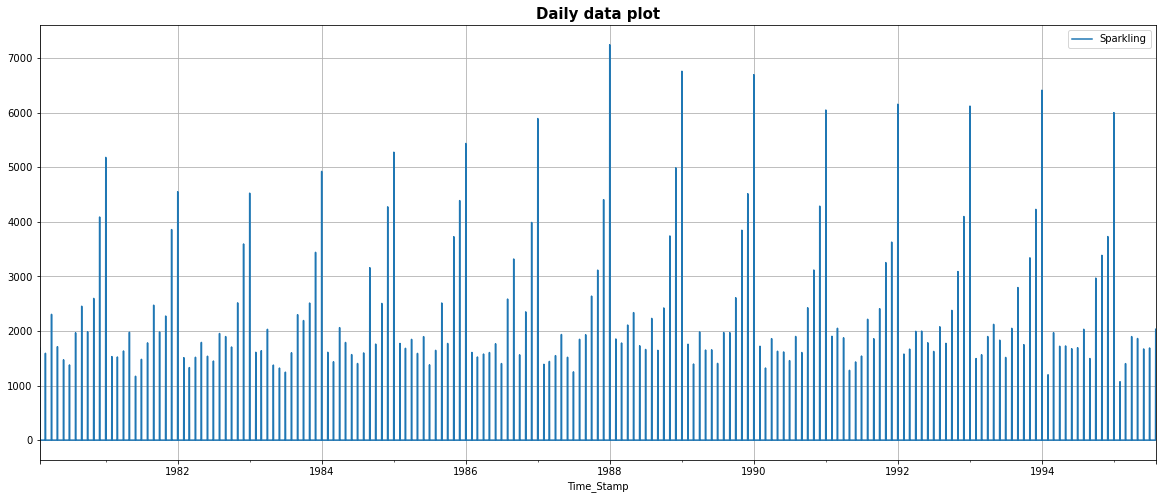

In [956]:
df_daily_sum.plot()
plt.grid();
plt.title("Daily data plot", fontsize=15,fontweight='bold')

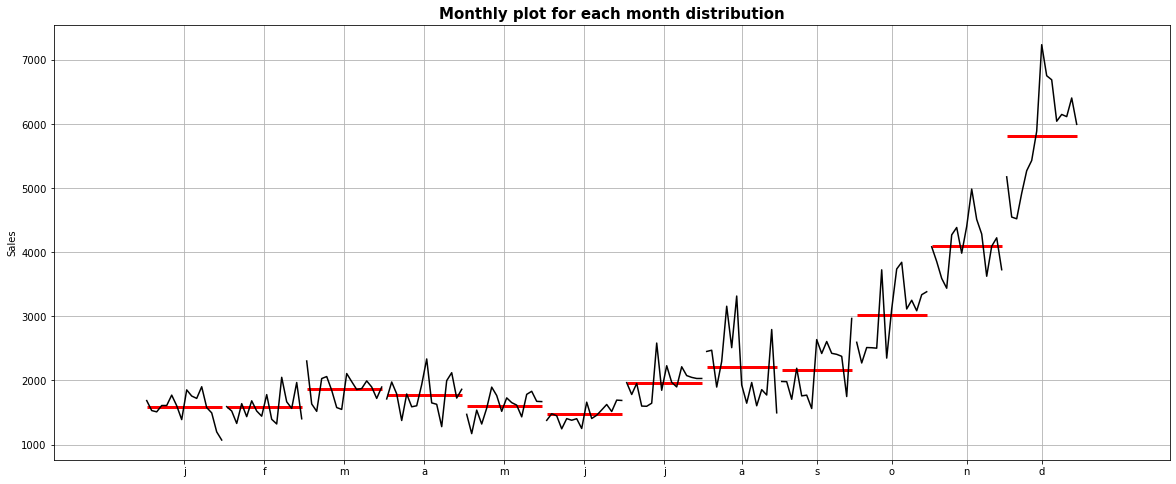

In [957]:
## Plot a time series monthplot to understand the spread of sales across different years and within different months across years.

from statsmodels.graphics.tsaplots import month_plot

month_plot(data1['Sparkling'],ylabel='Sales')
plt.title("Monthly plot for each month distribution",fontsize=15,fontweight='bold')
plt.grid();

This plot shows us the behaviour of the Time Series ('Sparkling Wine' in this case) across various months. The red line is the median value.

In [958]:
## Plot a graph of monthly RetailSales across years.

monthly_sales_across_years = pd.pivot_table(data1, values = 'Sparkling', columns = data1.index.month, index = data1.index.year)
monthly_sales_across_years

Time_Stamp      1       2       3       4       5       6       7       8   \
Time_Stamp                                                                   
1980        1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981        1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982        1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983        1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984        1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985        1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986        1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987        1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988        1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989        1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990        1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991        1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992        1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993        1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994        1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995        1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

Time_Stamp      9       10      11      12  
Time_Stamp                                  
1980        1984.0  2596.0  4087.0  5179.0  
1981        1981.0  2273.0  3857.0  4551.0  
1982        1706.0  2514.0  3593.0  4524.0  
1983        2191.0  2511.0  3440.0  4923.0  
1984        1759.0  2504.0  4273.0  5274.0  
1985        1771.0  3727.0  4388.0  5434.0  
1986        1562.0  2349.0  3987.0  5891.0  
1987        2638.0  3114.0  4405.0  7242.0  
1988        2421.0  3740.0  4988.0  6757.0  
1989        2608.0  3845.0  4514.0  6694.0  
1990        2424.0  3116.0  4286.0  6047.0  
1991        2408.0  3252.0  3627.0  6153.0  
1992        2377.0  3088.0  4096.0  6119.0  
1993        1749.0  3339.0  4227.0  6410.0  
1994        2968.0  3385.0  3729.0  5999.0  
1995           NaN     NaN     NaN     NaN

In [959]:
monthly_sales_across_years.plot()
plt.grid()

plt.legend(loc='best');

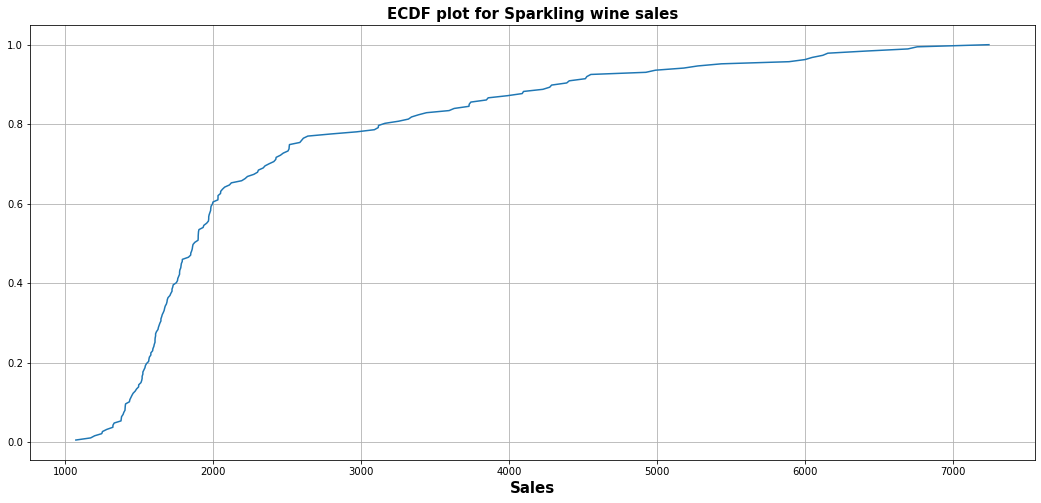

In [960]:
## Plot the Empirical Cumulative Distribution.

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(data1['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.title("ECDF plot for Sparkling wine sales", fontsize=15,fontweight='bold')
plt.xlabel('Sales', fontsize=15,fontweight='bold');

This particular graph tells us what percentage of data points refer to what number of Sales.

In [961]:
## Plot the average RetailSales per month and the month on month percentage change of RetailSales.

# group by date and get average RetailSales, and precent change
average    = data1.groupby(df1.index)["Sparkling"].mean()
pct_change = data1.groupby(df1.index)["Sparkling"].sum().pct_change()
fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))
# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sparkling sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sparkling sales Percent Change",grid=True)

The above two graphs tells us the Average 'Sparkling sales' and the Percentage change of 'Sparkling sales' with respect to the time.

## Decompose the Time Series and plot the different components.

In [962]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

### Additive Decomposition

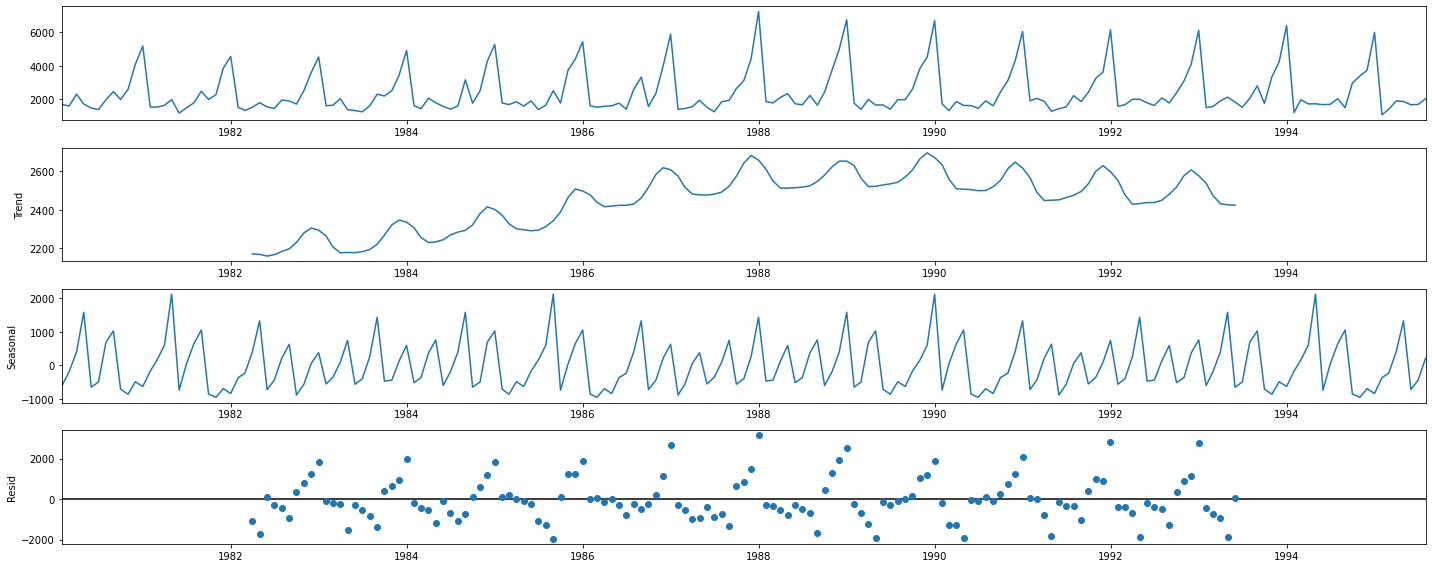

In [963]:
data1.interpolate(inplace=True)
res=sm.tsa.seasonal_decompose(data1,freq=52)
resplot=res.plot()

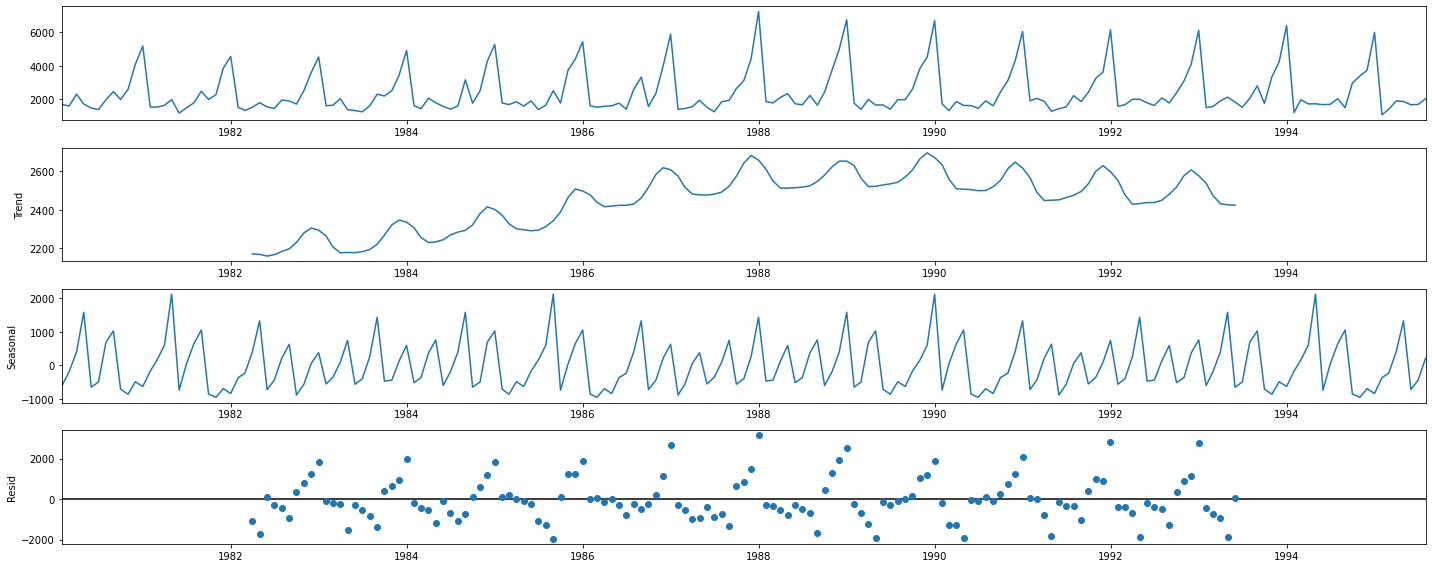

In [964]:
decomposition = seasonal_decompose(data1,model='additive',freq=52)
decomposition.plot();

We see that the residuals are located around 0 from the plot of the residuals in the decomposition.

In [965]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31   NaN
1980-02-29   NaN
1980-03-31   NaN
1980-04-30   NaN
1980-05-31   NaN
1980-06-30   NaN
1980-07-31   NaN
1980-08-31   NaN
1980-09-30   NaN
1980-10-31   NaN
1980-11-30   NaN
1980-12-31   NaN
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    -599.686853
1980-02-29    -192.465699
1980-03-31     398.543916
1980-04-30    1582.018275
1980-05-31    -648.994545
1980-06-30    -496.103519
1980-07-31     686.684942
1980-08-31    1027.184942
1980-09-30    -711.002558
1980-10-31    -860.050635
1980-11-30    -486.569866
1980-12-31    -628.170827
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31   NaN
1980-02-29   NaN
1980-03-31   NaN
1980-04-30   NaN
1980-05-31   NaN
1980-06-30   NaN
1980-07-31   NaN
1980-08-31   NaN
1980-09-30   NaN
1980-10-31   NaN
1980-11-30   NaN
1980-12-31   NaN
Name: resid, dtype: float64 



<AxesSubplot:xlabel='Time_Stamp'>

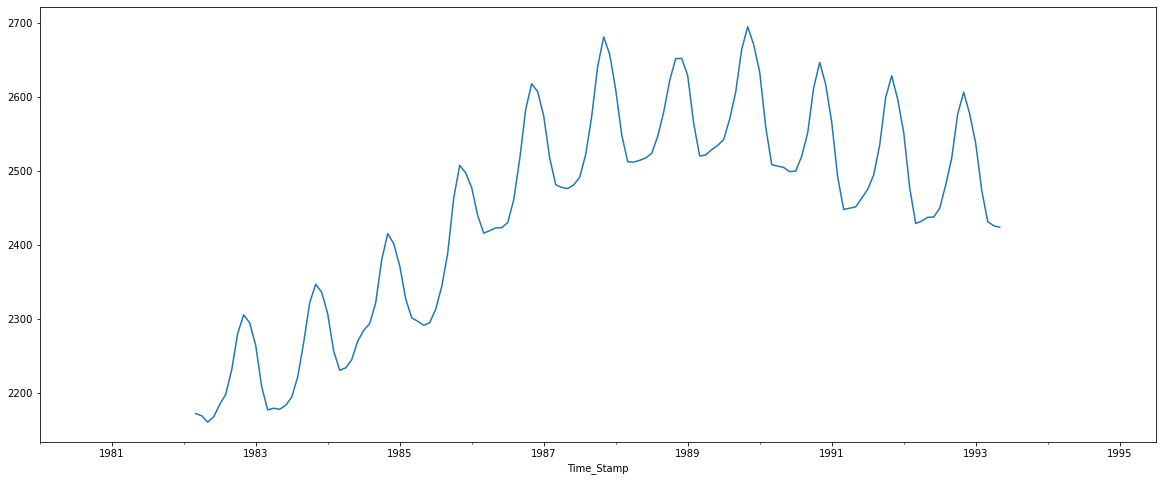

In [966]:
trend.plot()

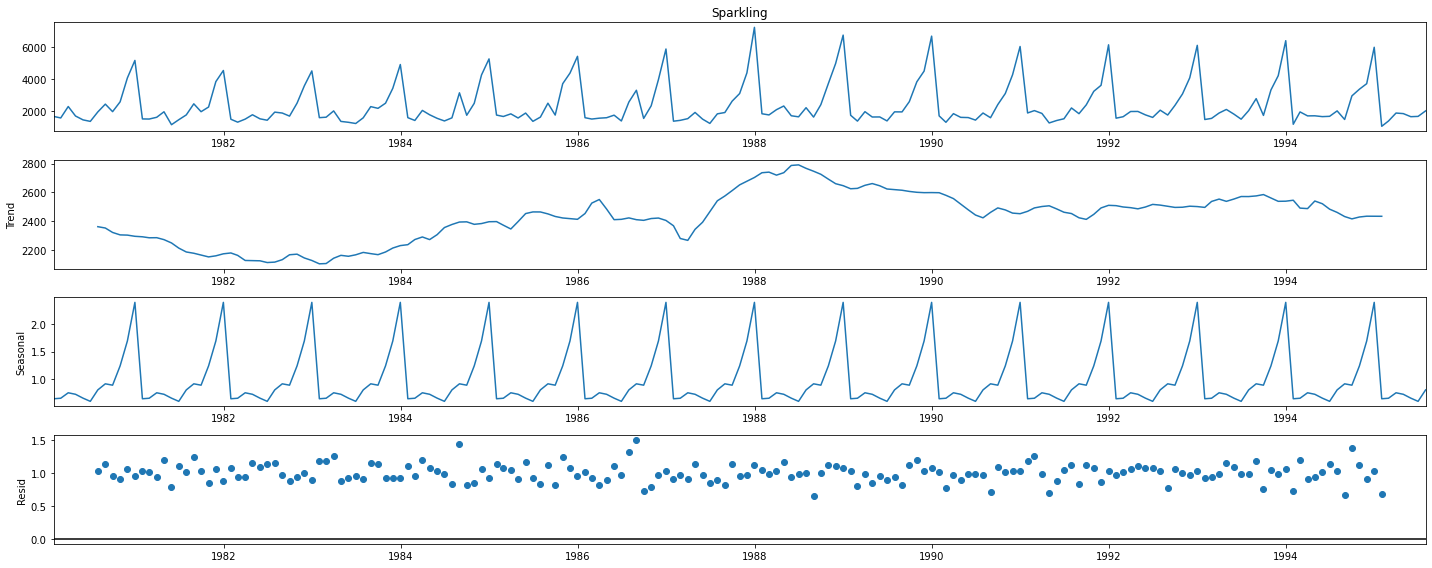

In [967]:
decomposition = seasonal_decompose(data1['Sparkling'],model='multiplicative')
decomposition.plot();

For the multiplicative series, we see that a lot of residuals are located around 1.

In [968]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Name: r

Text(0.5, 1.0, 'Trend in the Sparkling data')

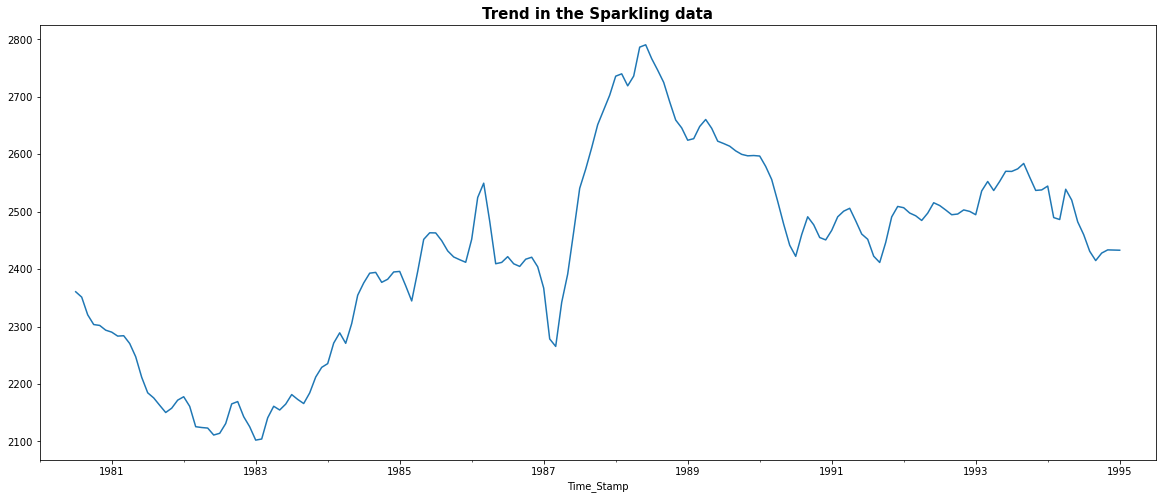

In [969]:
trend.plot()
plt.title("Trend in the Sparkling data",fontsize=15,fontweight='bold')

<b>3. Split the data into training and test. The test data should start in 1991.</b>

In [970]:
train             = data1[data1.index<'1991'] 
test              = data1[data1.index>='1991']

In [971]:
print("Shape of train data:",train.shape)
print("Shape of test data:",test.shape)

Shape of train data: (132, 1)
Shape of test data: (55, 1)


In [972]:
# Printing the AirPassengers Data
print('Training Data')
display(train)
print('Test Data')
display(test)

Training Data


Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471
...               ...
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

[132 rows x 1 columns]

Test Data


Sparkling
Time_Stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432
1991-06-30       1540
1991-07-31       2214
1991-08-31       1857
1991-09-30       2408
1991-10-31       3252
1991-11-30       3627
1991-12-31       6153
1992-01-31       1577
1992-02-29       1667
1992-03-31       1993
1992-04-30       1997
1992-05-31       1783
1992-06-30       1625
1992-07-31       2076
1992-08-31       1773
1992-09-30       2377
1992-10-31       3088
1992-11-30       4096
1992-12-31       6119
1993-01-31       1494
1993-02-28       1564
1993-03-31       1898
1993-04-30       2121
1993-05-31       1831
1993-06-30       1515
1993-07-31       2048
1993-08-31       2795
1993-09-30       1749
1993-10-31       3339
1993-11-30       4227
1993-12-31       6410
1994-01-31       1197
1994-02-28       1968
1994-03-31       1720
1994-04-30       1725
1994-05-31       1674
1994-06-30       1693
1994-07-31       2031
1994-08-31       1495
1994-09-30       2968
1994-10-31       3385
1994-11-30       3729
1994-12-31       5999
1995-01-31       1070
1995-02-28       1402
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

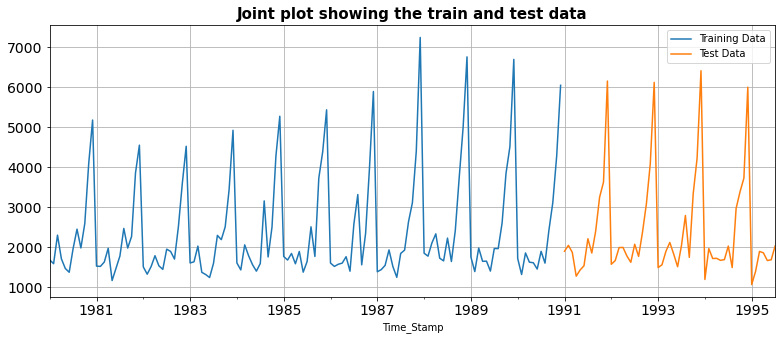

In [973]:
train['Sparkling'].plot(figsize=(13,5), fontsize=14)
test['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.title("Joint plot showing the train and test data",fontsize=15,fontweight='bold')
plt.legend(['Training Data','Test Data'])
plt.show()

In [974]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


<b>4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.</b>

<b>1.Linear Regression</b>

In [975]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [976]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

In [977]:
print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1991-01-31       1902   133
1991-02-28       2049   134
1991-03-31       1874   135
1991-04-30       1279   136
1991-05-31       1432   137 

Last few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1995-03-31       1897   183
1995-04-30       1862   184
1995-05-31       1670   185
1995-06-30       1688   186
1995-07-31       2031   187 



Now that our training and test data has been modified, let us go ahead use  𝐿𝑖𝑛𝑒𝑎𝑟𝑅𝑒𝑔𝑟𝑒𝑠𝑠𝑖𝑜𝑛 to build the model on the training data and test the model on the test data.

In [978]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

In [979]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

In [980]:
plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.title("Linear Regression plot", fontsize=15,fontweight='bold')
plt.legend(loc='best')
plt.grid();

<b>Defining the accuracy metrics.</b>

In [981]:
from sklearn import metrics

def MAPE(y, yhat):
    y,yhat = np.array(y), np.array(yhat)
    try:
        mape = round(np.sum(np.abs(yhat-y))/np.sum(y)*100,2)
    except:
        print("Observed values are blank")
        mape = np.nan
    return mape
    

<b>Model Evaluation</b>

In [982]:
## Train Data - RMSE
rmse_model1_train = metrics.mean_squared_error(train['Sparkling'],train_predictions_model1,squared=False)
mape_model1_train = MAPE(train['Sparkling'],train_predictions_model1)
print("For RegressionOnTime forecast on the Train Data,  RMSE is %3.3f" %(rmse_model1_train))
print("For RegressionOnTime forecast on the Train Data,  MAPE is %3.3f" %(mape_model1_train))

## Test Data - RMSE
rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
mape_model1_test = MAPE(test['Sparkling'],test_predictions_model1)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))
print("For RegressionOnTime forecast on the Test Data,  MAPE is %3.3f" %(mape_model1_test))

For RegressionOnTime forecast on the Train Data,  RMSE is 1279.322
For RegressionOnTime forecast on the Train Data,  MAPE is 40.050
For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135
For RegressionOnTime forecast on the Test Data,  MAPE is 50.150


In [983]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test],'Test MAPE': [mape_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1389.135175      50.15

<b>2.Naive Approach</b>

In [984]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [985]:
#Train set
NaiveModel_train['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
print(NaiveModel_train['naive'].head())

Time_Stamp
1980-01-31    6047
1980-02-29    6047
1980-03-31    6047
1980-04-30    6047
1980-05-31    6047
Name: naive, dtype: int64


In [986]:
# Test set
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

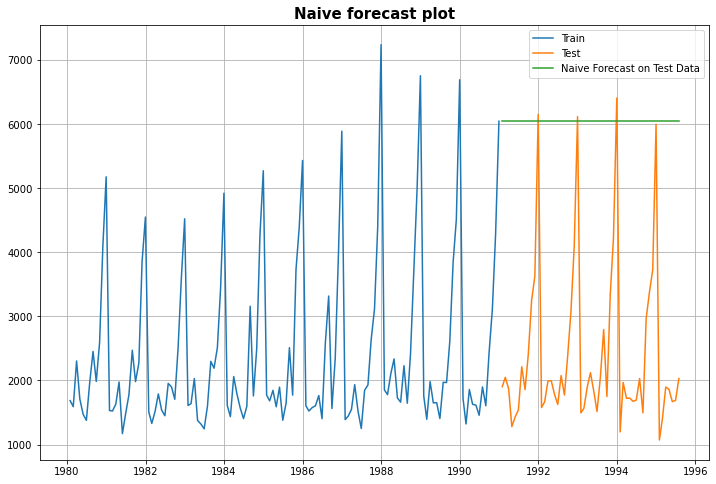

In [987]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive forecast plot", fontsize=15,fontweight='bold')
plt.grid();

<b>Model Average</b>

In [988]:
rmse_model2_train = metrics.mean_squared_error(train['Sparkling'],NaiveModel_train['naive'])
mape_model2_train = MAPE(train['Sparkling'],NaiveModel_train['naive'])
print("For Naive forecast on the Train Data,  RMSE is %3.3f" %(rmse_model2_train))
print("For Naive forecast on the Train Data,  MAPE is %3.3f" %(mape_model2_train))

## Test Data - RMSE
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
mape_model2_test = MAPE(test['Sparkling'],NaiveModel_test['naive'])
print("For Naive forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))
print("For Naive forecast on the Test Data,  MAPE is %3.3f" %(mape_model2_test))

For Naive forecast on the Train Data,  RMSE is 14959109.492
For Naive forecast on the Train Data,  MAPE is 153.170
For Naive forecast on the Test Data,  RMSE is 3864.279
For Naive forecast on the Test Data,  MAPE is 152.870


In [989]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test],'Test MAPE': [mape_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1389.135175      50.15
NaiveModel        3864.279352     152.87

<b>3.Simple average</b>

For this particular simple average method, we will forecast by using the average of the training values.

In [990]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [991]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
Time_Stamp                          
1991-01-31       1902    2403.780303
1991-02-28       2049    2403.780303
1991-03-31       1874    2403.780303
1991-04-30       1279    2403.780303
1991-05-31       1432    2403.780303

In [992]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast", fontsize=15,fontweight='bold')
plt.grid();

<b>Model Evaluation</b>

In [993]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
mape_model3_test = MAPE(test['Sparkling'],SimpleAverage_test['mean_forecast'])
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))
print("For Simple Average forecast on the Test Data,  MAPE is %3.3f" %(mape_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082
For Simple Average forecast on the Test Data,  MAPE is 38.900


In [994]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test],'Test MAPE': [mape_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime    1389.135175      50.15
NaiveModel          3864.279352     152.87
SimpleAverageModel  1275.081804      38.90

<b>4.Moving Average(MA)</b>

For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.
For Moving Average, we are going to average over the entire data.

In [995]:
MovingAverage = data1.copy()
MovingAverage.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

<b>Trailing moving averages</b>

In [996]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

In [997]:
MovingAverage.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                           
1980-01-31       1686         NaN         NaN         NaN         NaN
1980-02-29       1591      1638.5         NaN         NaN         NaN
1980-03-31       2304      1947.5         NaN         NaN         NaN
1980-04-30       1712      2008.0     1823.25         NaN         NaN
1980-05-31       1471      1591.5     1769.50         NaN         NaN

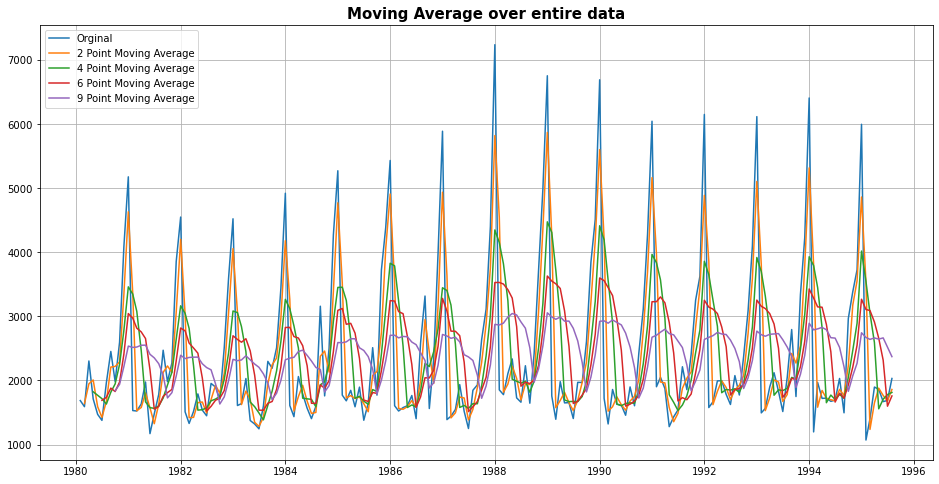

In [998]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Orginal')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.title("Moving Average over entire data", fontsize=15,fontweight='bold')
plt.legend(loc = 'best')
plt.grid();

In [999]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991']
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']

In [1000]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.title("Moving Average on train and test data separately", fontsize=15,fontweight='bold')
plt.legend(loc = 'best')
plt.grid();

<b>Model Evaluation </b>

Done only on the test data.

In [1001]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
mape_model4_test_2 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'])
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
mape_model4_test_4 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'])
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
mape_model4_test_6 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'])
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
mape_model4_test_9 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'])
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278 


In [1002]:
rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f" %(rmse_model4_test_2))
rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f" %(rmse_model4_test_4))
rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f" %(rmse_model4_test_6))
rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Testing Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Testing Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Testing Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Testing Data,  RMSE is 1346.278 


In [1003]:
mape_model4_test_9 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'])
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4,rmse_model4_test_6,rmse_model4_test_9],
                                          'Test MAPE': [mape_model4_test_2, mape_model4_test_4,mape_model4_test_6
                                          ,mape_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime             1389.135175      50.15
NaiveModel                   3864.279352     152.87
SimpleAverageModel           1275.081804      38.90
2pointTrailingMovingAverage   813.400684      19.70
4pointTrailingMovingAverage  1156.589694      35.96
6pointTrailingMovingAverage  1283.927428      43.86
9pointTrailingMovingAverage  1346.278315      46.86

<b>Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.</b>

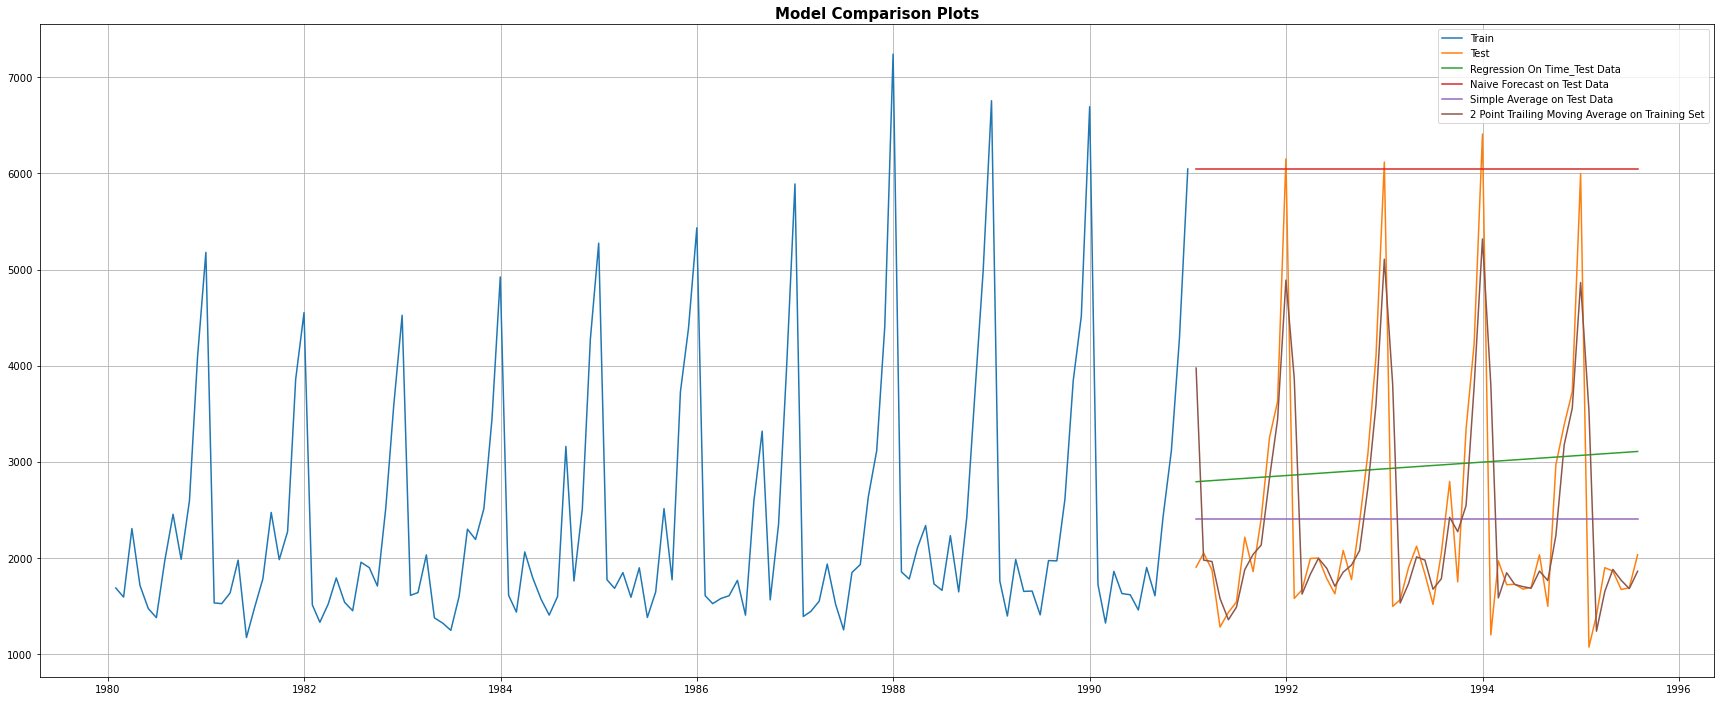

In [1004]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots", fontsize=15,fontweight='bold')
plt.grid();

<b>5.Simple Exponential Smoothing</b>

In [1005]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [1006]:
SES_train = train.copy()
SES_test = test.copy()
SES_train

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471
...               ...
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

[132 rows x 1 columns]

In [1007]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

model_SES_autofit = model_SES.fit(optimized=True)

model_SES_autofit.params

{'smoothing_level': 0.04960659880745982,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.5047538435374,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [1008]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Sparkling      predict
Time_Stamp                        
1991-01-31       1902  2724.929339
1991-02-28       2049  2724.929339
1991-03-31       1874  2724.929339
1991-04-30       1279  2724.929339
1991-05-31       1432  2724.929339

In [1009]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.0496 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.0496 Predictions',fontsize=15,fontweight='bold');

<b>Model Evaluation for  𝛼  = 0.0496 : Simple Exponential Smoothing</b>

In [1010]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha =0.0496 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))
mape_model5_test_1 = MAPE(SES_test['Sparkling'],SES_test['predict'])

For Alpha =0.0496 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1316.035


In [1011]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1], 'Test MAPE': [mape_model5_test_1]},index=['Alpha=0.0496,SimpleExponentialSmoothing'])


resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                         1389.135175      50.15
NaiveModel                               3864.279352     152.87
SimpleAverageModel                       1275.081804      38.90
2pointTrailingMovingAverage               813.400684      19.70
4pointTrailingMovingAverage              1156.589694      35.96
6pointTrailingMovingAverage              1283.927428      43.86
9pointTrailingMovingAverage              1346.278315      46.86
Alpha=0.0496,SimpleExponentialSmoothing  1316.034674      45.47

Setting different alpha values.
Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.
We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [1012]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

SES_test

Sparkling      predict
Time_Stamp                        
1991-01-31       1902  2724.929339
1991-02-28       2049  2724.929339
1991-03-31       1874  2724.929339
1991-04-30       1279  2724.929339
1991-05-31       1432  2724.929339
1991-06-30       1540  2724.929339
1991-07-31       2214  2724.929339
1991-08-31       1857  2724.929339
1991-09-30       2408  2724.929339
1991-10-31       3252  2724.929339
1991-11-30       3627  2724.929339
1991-12-31       6153  2724.929339
1992-01-31       1577  2724.929339
1992-02-29       1667  2724.929339
1992-03-31       1993  2724.929339
1992-04-30       1997  2724.929339
1992-05-31       1783  2724.929339
1992-06-30       1625  2724.929339
1992-07-31       2076  2724.929339
1992-08-31       1773  2724.929339
1992-09-30       2377  2724.929339
1992-10-31       3088  2724.929339
1992-11-30       4096  2724.929339
1992-12-31       6119  2724.929339
1993-01-31       1494  2724.929339
1993-02-28       1564  2724.929339
1993-03-31       1898  2724.929339
1993-04-30       2121  2724.929339
1993-05-31       1831  2724.929339
1993-06-30       1515  2724.929339
1993-07-31       2048  2724.929339
1993-08-31       2795  2724.929339
1993-09-30       1749  2724.929339
1993-10-31       3339  2724.929339
1993-11-30       4227  2724.929339
1993-12-31       6410  2724.929339
1994-01-31       1197  2724.929339
1994-02-28       1968  2724.929339
1994-03-31       1720  2724.929339
1994-04-30       1725  2724.929339
1994-05-31       1674  2724.929339
1994-06-30       1693  2724.929339
1994-07-31       2031  2724.929339
1994-08-31       1495  2724.929339
1994-09-30       2968  2724.929339
1994-10-31       3385  2724.929339
1994-11-30       3729  2724.929339
1994-12-31       5999  2724.929339
1995-01-31       1070  2724.929339
1995-02-28       1402  2724.929339
1995-03-31       1897  2724.929339
1995-04-30       1862  2724.929339
1995-05-31       1670  2724.929339
1995-06-30       1688  2724.929339
1995-07-31       2031  2724.929339

In [1013]:
for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=146)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

<b>Model Evaluation</b>

In [1014]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values   Train RMSE    Test RMSE
0           0.3  1359.511747  1935.507132
1           0.4  1352.588879  2311.919615
2           0.5  1344.004369  2666.351413
3           0.6  1338.805381  2979.204388
4           0.7  1338.844308  3249.944092
5           0.8  1344.462091  3483.801006
6           0.9  1355.723518  3686.794285

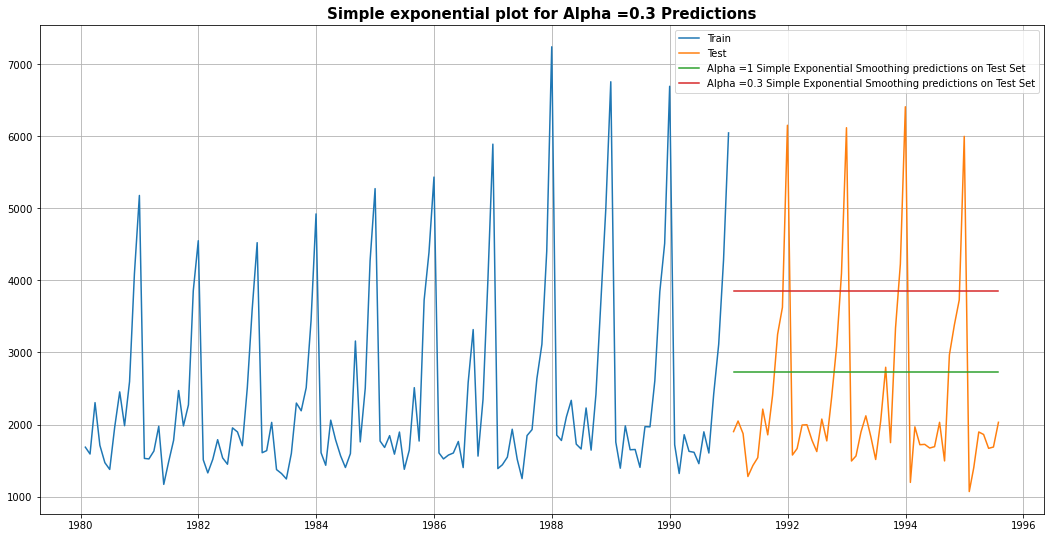

In [1015]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')


plt.title('Simple exponential plot for Alpha =0.3 Predictions',fontsize=15,fontweight='bold');
plt.legend(loc='best')
plt.grid();

In [1016]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.3,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                         1389.135175      50.15
NaiveModel                               3864.279352     152.87
SimpleAverageModel                       1275.081804      38.90
2pointTrailingMovingAverage               813.400684      19.70
4pointTrailingMovingAverage              1156.589694      35.96
6pointTrailingMovingAverage              1283.927428      43.86
9pointTrailingMovingAverage              1346.278315      46.86
Alpha=0.0496,SimpleExponentialSmoothing  1316.034674      45.47
Alpha=0.3,SimpleExponentialSmoothing     1935.507132        NaN

In [1017]:
print("For Alpha=0.3,Simple Exponential Smoothing Model forecast on the test data,RMSE=",[resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]  )                     

For Alpha=0.3,Simple Exponential Smoothing Model forecast on the test data,RMSE= [1935.5071321027176]


<b>6: Double Exponential Smoothing (Holt's Model)</b>

Two parameters  𝛼  and  𝛽  are estimated in this model. Level and Trend are accounted for in this model.

In [1018]:
DES_train = train.copy()
DES_test = test.copy()

model_DES = Holt(DES_train['Sparkling'])

In [1019]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [1020]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=146)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

resultsDf_7

Alpha Values  Beta Values   Train RMSE     Test RMSE
0            0.3          0.3  1592.292788  18259.110704
1            0.3          0.4  1682.573828  26069.841401
2            0.3          0.5  1771.710791  34401.512440
3            0.3          0.6  1848.576510  42162.748095
4            0.3          0.7  1899.949006  47832.397419
..           ...          ...          ...           ...
59           1.0          0.6  1753.402326  49327.087977
60           1.0          0.7  1825.187155  52655.765663
61           1.0          0.8  1902.013709  55442.273880
62           1.0          0.9  1985.368445  57823.177011
63           1.0          1.0  2077.672157  59877.076519

[64 rows x 4 columns]

Let us sort the data frame in the ascending ordering of the 'Test RMSE' and the 'Test MAPE' values

In [1021]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values   Train RMSE     Test RMSE
0            0.3          0.3  1592.292788  18259.110704
8            0.4          0.3  1569.338606  23878.496940
1            0.3          0.4  1682.573828  26069.841401
16           0.5          0.3  1530.575845  27095.532414
24           0.6          0.3  1506.449870  29070.722592

In [1022]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')

plt.title('Double exponential plot for Alpha =0.3, Beta=0.3 Predictions',fontsize=15,fontweight='bold');
plt.legend(loc='best')
plt.grid();

In [1023]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                1389.135175      50.15
NaiveModel                                      3864.279352     152.87
SimpleAverageModel                              1275.081804      38.90
2pointTrailingMovingAverage                      813.400684      19.70
4pointTrailingMovingAverage                     1156.589694      35.96
6pointTrailingMovingAverage                     1283.927428      43.86
9pointTrailingMovingAverage                     1346.278315      46.86
Alpha=0.0496,SimpleExponentialSmoothing         1316.034674      45.47
Alpha=0.3,SimpleExponentialSmoothing            1935.507132        NaN
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing  18259.110704        NaN

In [1024]:
print("For Alpha=0.3,Beta=0.3,Double Exponential Smoothing Model forecast on the test data,RMSE=",[resultsDf_7.sort_values(by=['Test RMSE'],ascending=True).values[0][3]]  )                     

For Alpha=0.3,Beta=0.3,Double Exponential Smoothing Model forecast on the test data,RMSE= [18259.11070404971]


<b>7: Triple Exponential Smoothing (Holt - Winter's Model)</b>

Three parameters  𝛼 ,  𝛽  and  𝛾  are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [1025]:
TES_train = train.copy()
TES_test = test.copy()

In [1026]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')

model_TES_autofit = model_TES.fit()

model_TES_autofit.params

{'smoothing_level': 0.11107308290744182,
 'smoothing_trend': 0.06167745801641925,
 'smoothing_seasonal': 0.39488777704116057,
 'damping_trend': nan,
 'initial_level': 1639.5306320456996,
 'initial_trend': -13.803739314239138,
 'initial_seasons': array([1.04411064, 1.00095858, 1.40459398, 1.20906039, 0.96413947,
        0.96754964, 1.3048211 , 1.69841076, 1.37034155, 1.81659752,
        2.84708154, 3.62462473]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [1027]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(TES_test))
TES_test.head()

Sparkling  auto_predict
Time_Stamp                         
1991-01-31       1902   1577.287560
1991-02-28       2049   1333.740806
1991-03-31       1874   1746.024831
1991-04-30       1279   1630.595491
1991-05-31       1432   1523.372422

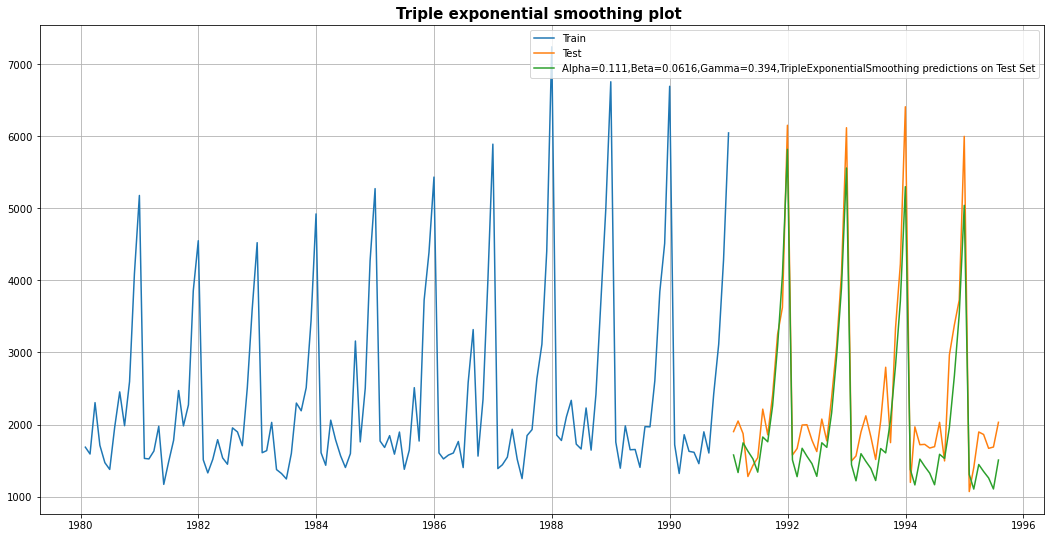

In [1028]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.111,Beta=0.0616,Gamma=0.394,TripleExponentialSmoothing predictions on Test Set')

plt.title('Triple exponential smoothing plot ',fontsize=15,fontweight='bold');
plt.legend(loc='best')
plt.grid();

In [1029]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.111,Beta=0.0616,Gamma=0.394, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.111,Beta=0.0616,Gamma=0.394, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 469.432


In [1030]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.111,Beta=0.0616,Gamma=0.394,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                     1389.135175      50.15
NaiveModel                                           3864.279352     152.87
SimpleAverageModel                                   1275.081804      38.90
2pointTrailingMovingAverage                           813.400684      19.70
4pointTrailingMovingAverage                          1156.589694      35.96
6pointTrailingMovingAverage                          1283.927428      43.86
9pointTrailingMovingAverage                          1346.278315      46.86
Alpha=0.0496,SimpleExponentialSmoothing              1316.034674      45.47
Alpha=0.3,SimpleExponentialSmoothing                 1935.507132        NaN
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704        NaN
Alpha=0.111,Beta=0.0616,Gamma=0.394,TripleExpon...    469.432003        NaN

In [1031]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [1032]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test))
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [1033]:
resultsDf_8_2

Alpha Values  Beta Values  Gamma Values     Train RMSE     Test RMSE
0             0.3          0.3           0.3     404.513320  3.927862e+02
1             0.3          0.3           0.4     402.088628  9.513202e+02
2             0.3          0.3           0.5     408.282432  1.470487e+03
3             0.3          0.3           0.6     428.631668  2.181724e+03
4             0.3          0.3           0.7     468.958530  3.513351e+03
..            ...          ...           ...            ...           ...
507           1.0          1.0           0.6  153394.791826  7.989790e+05
508           1.0          1.0           0.7   94040.964958  1.074413e+06
509           1.0          1.0           0.8  102196.953755  5.010607e+06
510           1.0          1.0           0.9   77924.294413  4.318265e+05
511           1.0          1.0           1.0  239917.432847  1.254280e+05

[512 rows x 5 columns]

In [1034]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE   Test RMSE
0             0.3          0.3           0.3  404.513320  392.786198
8             0.3          0.4           0.3  424.828055  410.854547
65            0.4          0.3           0.4  435.553595  421.409170
296           0.7          0.8           0.3  700.317756  518.188752
130           0.5          0.3           0.5  498.239915  542.175497

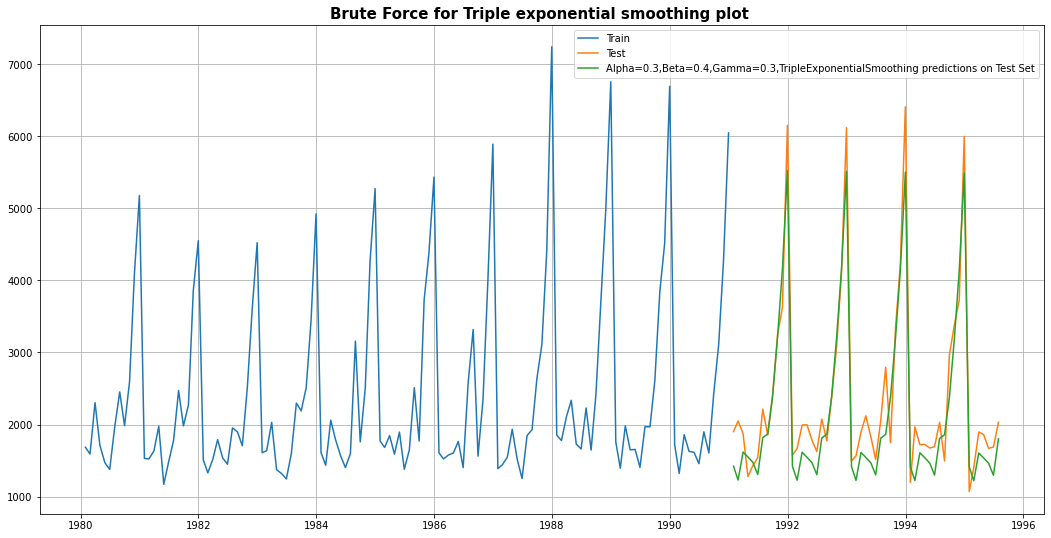

In [1035]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.3, 0.3, 0.3], label='Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')

plt.title('Brute Force for Triple exponential smoothing plot ',fontsize=15,fontweight='bold');
plt.legend(loc='best')
plt.grid();

In [1036]:
print("For Alpha=0.3,Beta=0.3,Gamma=0.3, Brute Force-Triple Exponential Smoothing Model forecast on the Test Data,RMSE is %3.3f" %resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4])

For Alpha=0.3,Beta=0.3,Gamma=0.3, Brute Force-Triple Exponential Smoothing Model forecast on the Test Data,RMSE is 392.786


In [1037]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                     1389.135175      50.15
NaiveModel                                           3864.279352     152.87
SimpleAverageModel                                   1275.081804      38.90
2pointTrailingMovingAverage                           813.400684      19.70
4pointTrailingMovingAverage                          1156.589694      35.96
6pointTrailingMovingAverage                          1283.927428      43.86
9pointTrailingMovingAverage                          1346.278315      46.86
Alpha=0.0496,SimpleExponentialSmoothing              1316.034674      45.47
Alpha=0.3,SimpleExponentialSmoothing                 1935.507132        NaN
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704        NaN
Alpha=0.111,Beta=0.0616,Gamma=0.394,TripleExpon...    469.432003        NaN
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...    392.786198        NaN

In [1038]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE  Test MAPE
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...    392.786198        NaN
Alpha=0.111,Beta=0.0616,Gamma=0.394,TripleExpon...    469.432003        NaN
2pointTrailingMovingAverage                           813.400684      19.70
4pointTrailingMovingAverage                          1156.589694      35.96
SimpleAverageModel                                   1275.081804      38.90
6pointTrailingMovingAverage                          1283.927428      43.86
Alpha=0.0496,SimpleExponentialSmoothing              1316.034674      45.47
9pointTrailingMovingAverage                          1346.278315      46.86
RegressionOnTime                                     1389.135175      50.15
Alpha=0.3,SimpleExponentialSmoothing                 1935.507132        NaN
NaiveModel                                           3864.279352     152.87
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704        NaN

For this data, we had both trend and seasonality so by definition Triple Exponential Smoothing is supposed to work better than the Simple Exponential Smoothing as well as the Double Exponential Smoothing. However, since this was a model building exercise we had gone on to build different models on the data and have compared these model with the best RMSE value on the test data.

<b>We see that the best model is the Triple Exponential Smoothing with multiplicative seasonality with the parameters  𝛼  = 0.3,  𝛽  = 0.3 and  𝛾  = 0.3.</b>

In [1039]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['predict', 0.3, 0.3, 0.3], label='Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values',fontsize=15,fontweight='bold');

<b>5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.</b>

## Check for stationarity of the whole Time Series data.

In [1040]:
## Test for stationarity of the series - Dicky Fuller test

In [1041]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
  
 #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

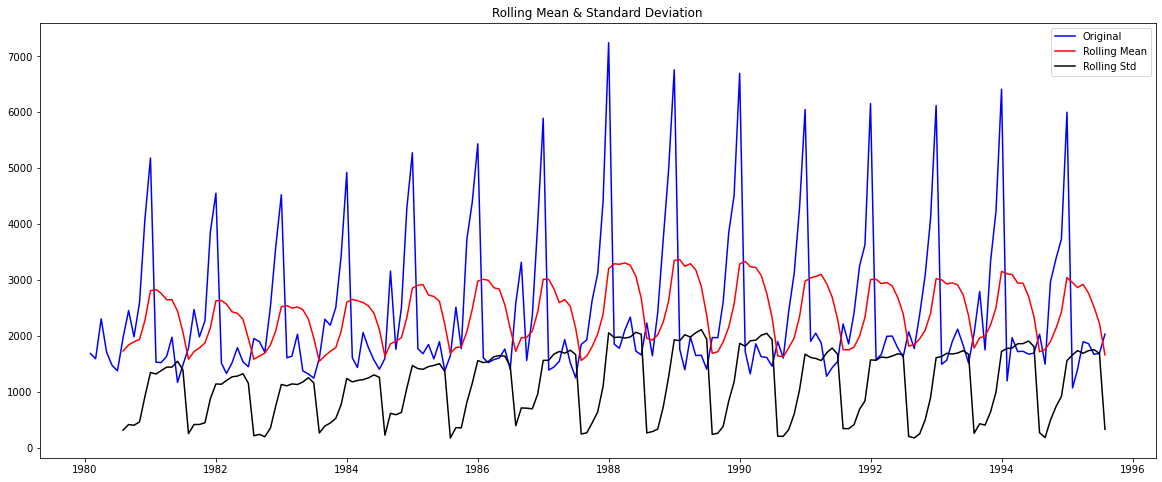

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [1042]:
test_stationarity(data1['Sparkling'])

We see that at 5% significant level the Time Series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

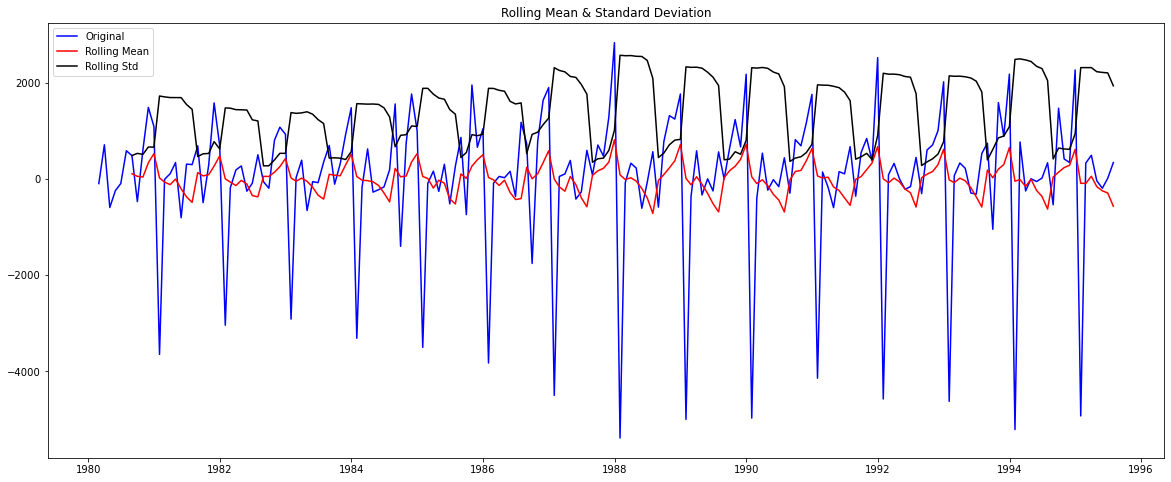

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [1043]:
test_stationarity(data1['Sparkling'].diff().dropna())

We see that at $\alpha$ = 0.05 the Time Series is indeed stationary.

## Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

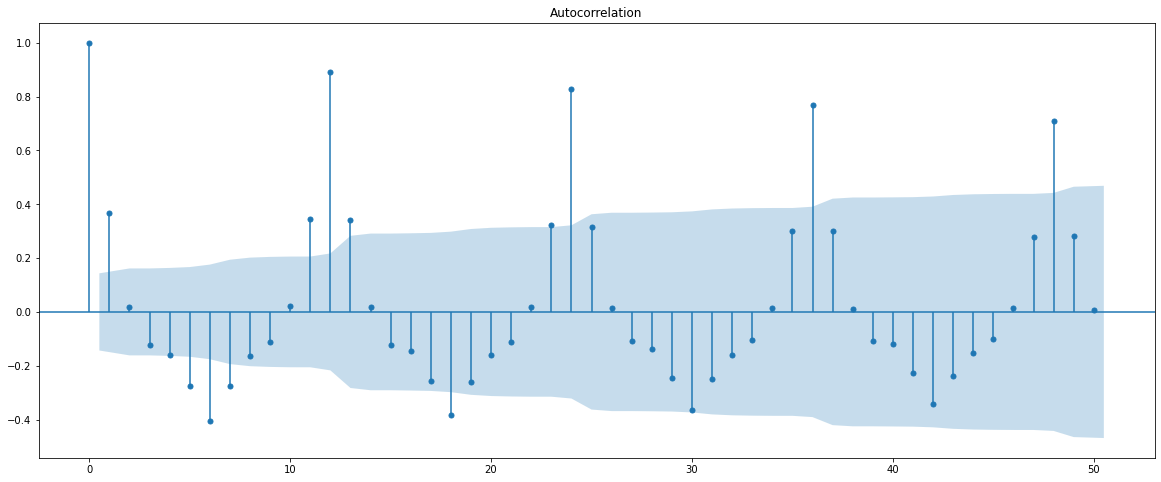

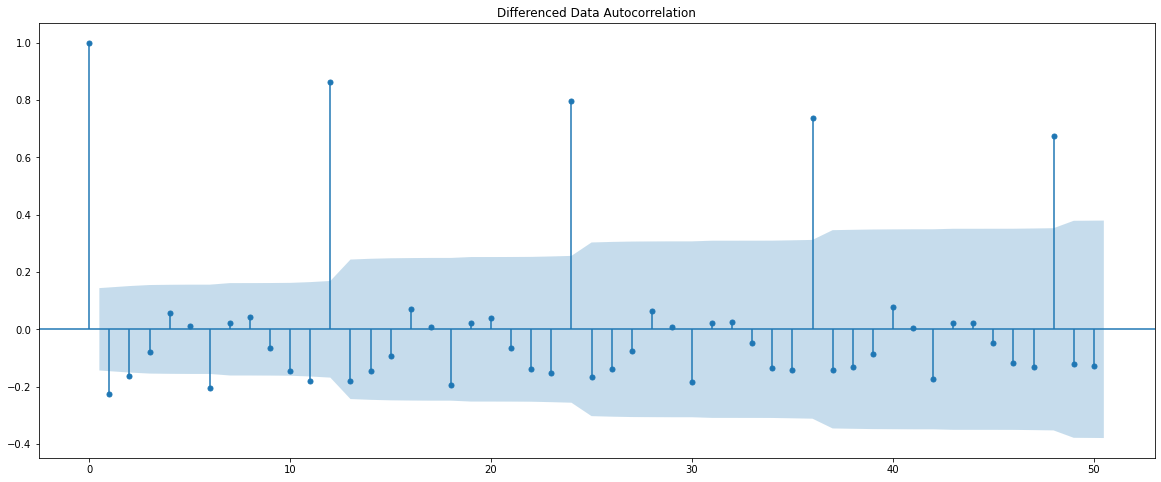

In [1044]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data1['Sparkling'],lags=50)
plot_acf(data1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

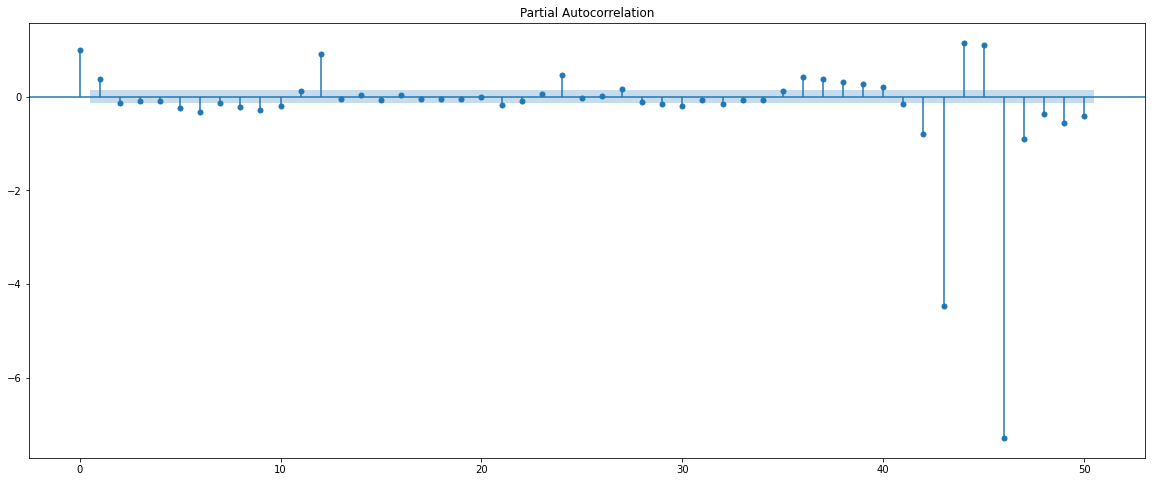

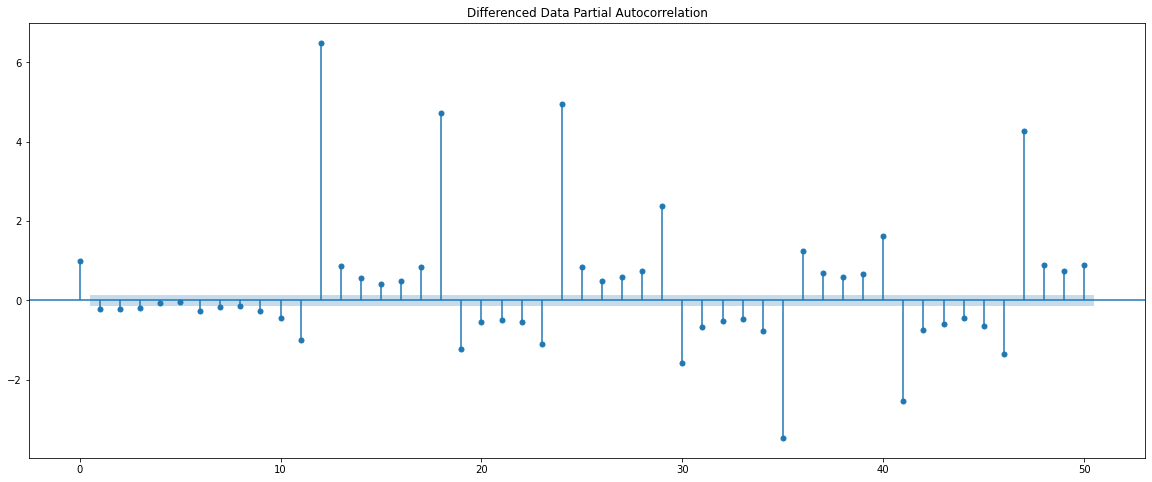

In [1045]:
plot_pacf(data1['Sparkling'],lags=50)
plot_pacf(data1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

From the above plots, we can say that there seems to be a seasonality in the data.

## Split the data into train and test and plot the training and test data.

Training Data is till the end of 1990. Test Data is from the beginning of 1991 to the last time stamp provided.

In [1046]:
train=data1[data1.index.year < 1991]
test=data1[data1.index.year >= 1991]

In [1047]:
## This is to display multiple data frames from one cell
from IPython.display import display

print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

Last few rows of Training Data


Sparkling
Time_Stamp           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

First few rows of Test Data


Sparkling
Time_Stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432

Last few rows of Test Data


Sparkling
Time_Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

In [1048]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


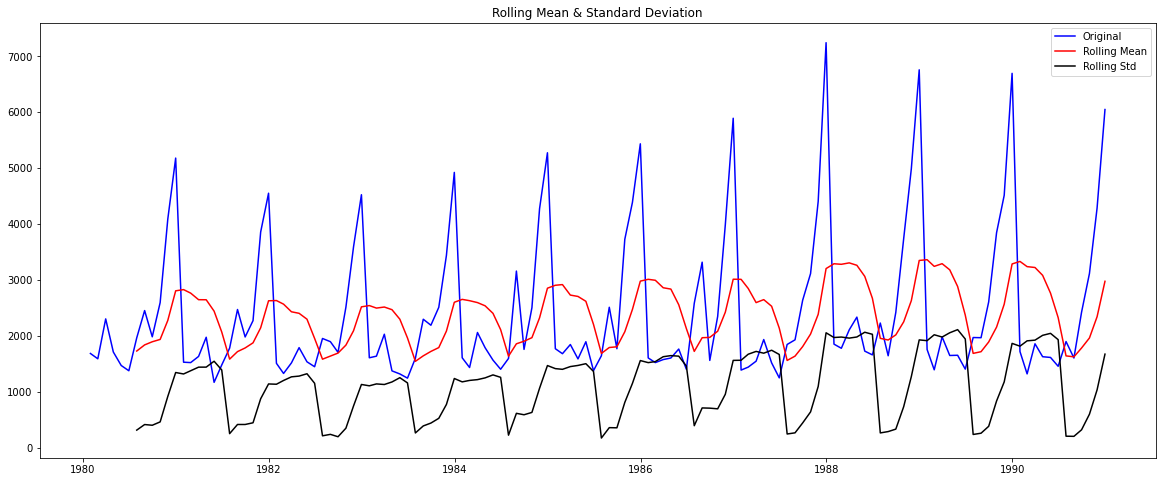

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [1049]:
## Check for stationarity of the Training Data Time Series.

test_stationarity(train['Sparkling'])

We see that the series is not stationary at $\alpha$ = 0.05.

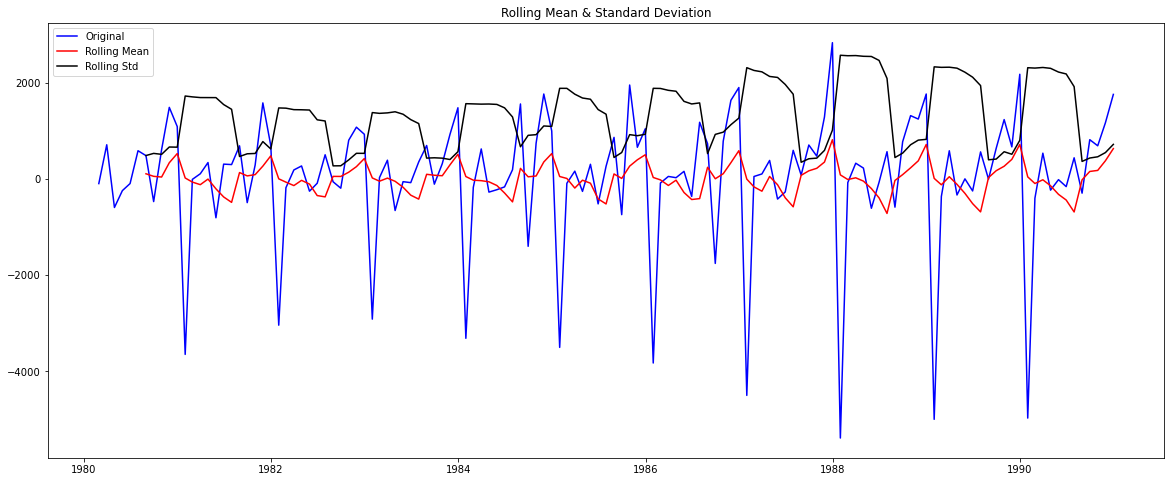

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [1050]:
test_stationarity(train['Sparkling'].diff().dropna())

We see that after taking a difference of order 1 the series have become stationary at $\alpha$ = 0.05.

##### Note: If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there. You can look at other kinds of transformations as part of making the time series stationary like taking logarithms.

In [1051]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


<b>6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.</b>

<b><center>AUTOMATED VERSION OF ARIMA</b></center>

##### Note: The data has some seasonality so ideally we should build a SARIMA model. But for demonstration purposes we are building an ARIMA model both by looking at the minimum AIC criterion and by looking at the ACF and the PACF plots.

In [1052]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

In [1053]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [1054]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [1055]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.9064376843794
ARIMA(0, 1, 2) - AIC:2232.783097684644
ARIMA(1, 1, 0) - AIC:2268.5280607731743
ARIMA(1, 1, 1) - AIC:2235.013945350261
ARIMA(1, 1, 2) - AIC:2233.5976471192644
ARIMA(2, 1, 0) - AIC:2262.035600271052
ARIMA(2, 1, 1) - AIC:2232.3604899031343
ARIMA(2, 1, 2) - AIC:2210.622119832789


In [1056]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
8  (2, 1, 2)  2210.622120
7  (2, 1, 1)  2232.360490
2  (0, 1, 2)  2232.783098
5  (1, 1, 2)  2233.597647
4  (1, 1, 1)  2235.013945
6  (2, 1, 0)  2262.035600
1  (0, 1, 1)  2264.906438
3  (1, 1, 0)  2268.528061
0  (0, 1, 0)  2269.582796

In [1057]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.311
Method:                       css-mle   S.D. of innovations           1013.283
Date:                Sun, 20 Feb 2022   AIC                           2210.622
Time:                        13:37:12   BIC                           2227.873
Sample:                    02-29-1980   HQIC                          2217.632
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5852      0.518     10.788      0.000       4.570       6.600
ar.L1.D.Sparkling     1.2699      0.075     17.043      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

<b>Predict on the Test Set using this model and evaluate the model.</b>

In [1058]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [1059]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA[0],squared=False)
print("RMSE of Automated ARIMA(2,1,2) on testing data:",rmse)

RMSE of Automated ARIMA(2,1,2) on testing data: 1374.2963869630776


In [1060]:
from sklearn import metrics

def MAPE(y, yhat):
    y,yhat = np.array(y), np.array(yhat)
    try:
        mape = round(np.sum(np.abs(yhat-y))/np.sum(y)*100,2)
    except:
        print("Observed values are blank")
        mape = np.nan
    return mape

mape = MAPE(test['Sparkling'],predicted_auto_ARIMA[0])
print(mape)

48.34


In [1061]:
resultsDf = pd.DataFrame({'RMSE': [rmse], 'MAPE':[mape]}
                           ,index=['ARIMA(2,1,2)'])

resultsDf

RMSE   MAPE
ARIMA(2,1,2)  1374.296387  48.34

<b><center>AUTOMATED VERSION OF SARIMA</center></b>

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

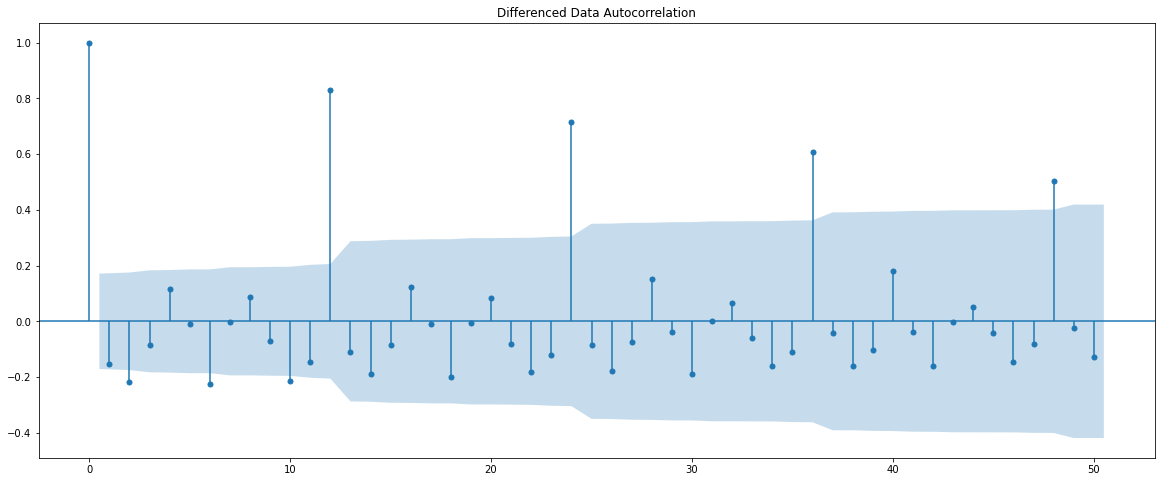

In [1062]:
plot_acf(train['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

We see that there can be a seasonality of 12. We will run our auto SARIMA models by setting seasonality at 12.

<b>Setting the seasonality as 12 for the first iteration of the auto SARIMA model.</b>

In [1063]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [1064]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [1065]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616845556
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640231319
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456677
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301389058
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791392
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158614114
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920854
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.768864956633
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089572876966
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.179588183827
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193734637
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1509144468012
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954175425
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245085477014
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.368373974958
SARIMA(0, 1, 2

In [1066]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
50  (1, 1, 2)  (1, 0, 2, 12)  1555.584247
53  (1, 1, 2)  (2, 0, 2, 12)  1555.934564
26  (0, 1, 2)  (2, 0, 2, 12)  1557.121564
23  (0, 1, 2)  (1, 0, 2, 12)  1557.160507
77  (2, 1, 2)  (1, 0, 2, 12)  1557.340402

In [1067]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(2, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.670
Date:                            Sun, 20 Feb 2022   AIC                           1557.340
Time:                                    13:38:29   BIC                           1578.496
Sample:                                         0   HQIC                          1565.911
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6503      0.247     -2.634      0.008      -1.134      -0.166
ar.L2         -0.0455      0.142   

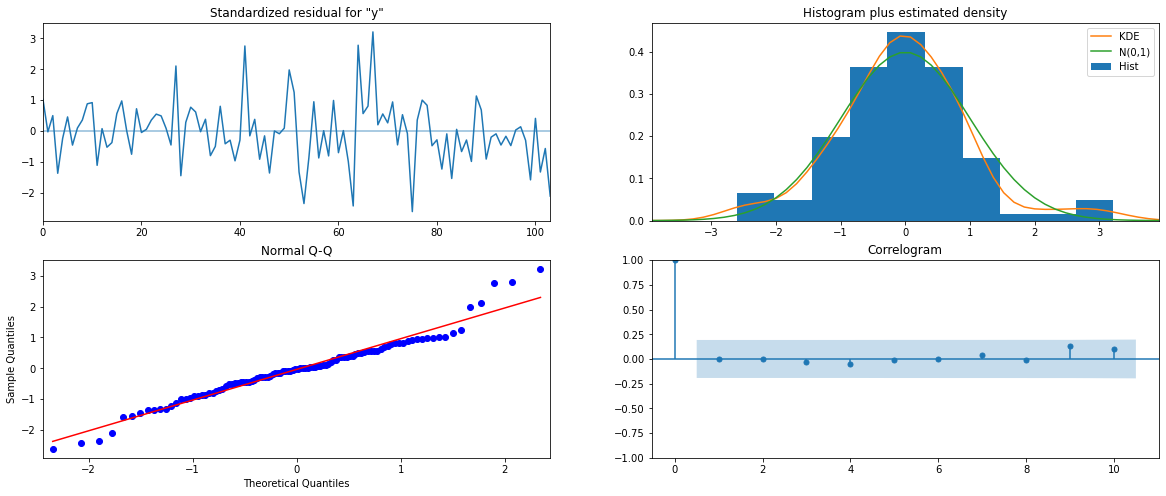

In [1068]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

<b>Here  we see that the model diagnostics plot does not indicate any remaining information that we can get.</b>

<b>Predict on the Test Set using this model and evaluate the model.</b>

In [1069]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1318.944595  388.178076     558.129546    2079.759644
1  1307.807249  399.792958     524.227451    2091.387048
2  1585.461735  399.833869     801.801752    2369.121718
3  1573.444241  406.467491     776.782597    2370.105885
4  1365.165361  407.315893     566.840881    2163.489841

In [1070]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print("RMSE of Automated SARIMA(1,1,2)(2,0,2,12) on testing data:",rmse)

RMSE of Automated SARIMA(1,1,2)(2,0,2,12) on testing data: 555.4615117611364


In [1071]:
mape = MAPE(test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean)
print(mape)

20.08


In [1072]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse],'MAPE': [mape]}
                           ,index=['SARIMA(1,1,2)(1,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE   MAPE
ARIMA(2,1,2)             1374.296387  48.34
SARIMA(1,1,2)(1,0,2,12)   555.461512  20.08

We see that the RMSE value have not reduced further when the seasonality parameter was changed to 12.

<b><center>7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.</center></b>

<b>MANUAL ARIMA</b>

<b>Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.</b>

Let us look at the ACF and the PACF plots once more.

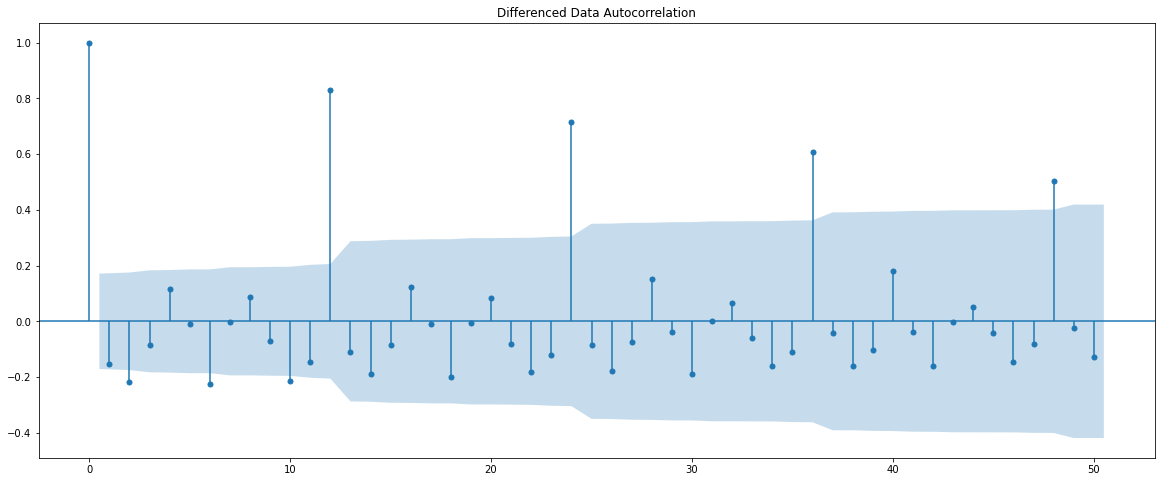

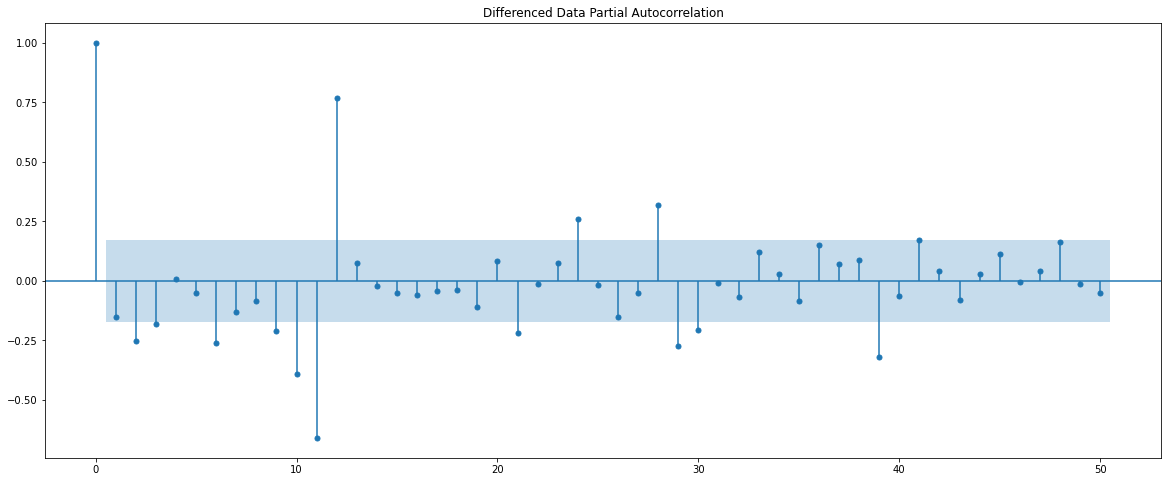

In [1073]:
plot_acf(train.diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(train.diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 0.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 0.

By looking at the above plots, we can say that both the PACF and ACF plot cuts-off at lag 0.

In [1074]:
manual_ARIMA = ARIMA(train['Sparkling'].astype('float64'), order=(3,1,2),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1107.464
Method:                       css-mle   S.D. of innovations           1106.121
Date:                Sun, 20 Feb 2022   AIC                           2228.927
Time:                        13:38:31   BIC                           2249.054
Sample:                    02-29-1980   HQIC                          2237.106
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.9850      3.643      1.643      0.100      -1.156      13.126
ar.L1.D.Sparkling    -0.4420   5.81e-06   -7.6e+04      0.000      -0.442      -0.442
ar.L2.D.Sparkling     0.

We get a comparatively simpler model by looking at the ACF and the PACF plots.

###### Note: When we see that both the AR(p) and the MA(q) model are of order 0, we have to convert the input variable into a 'float64' type variable else Python might throw an error.

<b>Predict on the Test Set using this model and evaluate the model.</b>

In [1075]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA[0],squared=False)
print("RMSE of ARIMA model based on cut off points(3,1,2)on testing data:",rmse)

RMSE of ARIMA model based on cut off points(3,1,2)on testing data: 1379.0006742208946


In [1076]:
mape = MAPE(test['Sparkling'],predicted_manual_ARIMA[0])
print(rmse)
print(mape)

1379.0006742208946
49.31


In [1077]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse],'MAPE': [mape]}
                           ,index=['ARIMA(3,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE   MAPE
ARIMA(2,1,2)             1374.296387  48.34
SARIMA(1,1,2)(1,0,2,12)   555.461512  20.08
ARIMA(3,1,2)             1379.000674  49.31

We see that there is difference in the RMSE values for both the models, but remember that the second model is a much simpler model.

<b>MANUAL SARIMA</b>

Let us look at the ACF and the PACF plots once more.

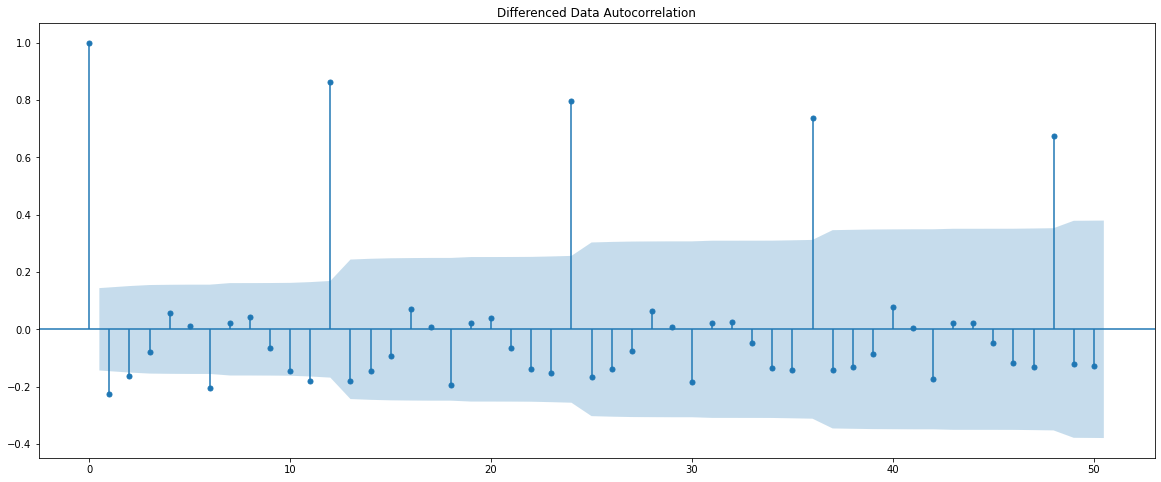

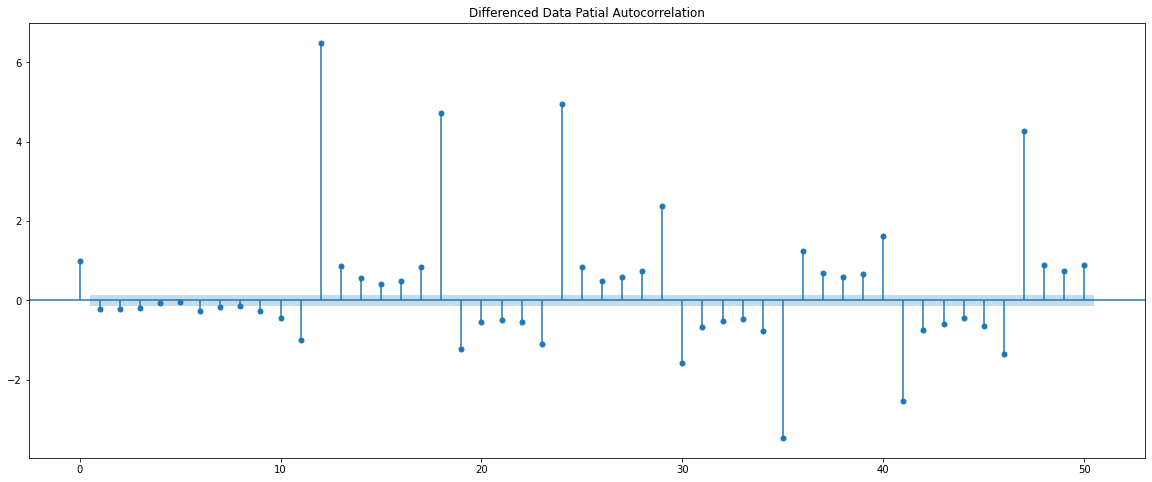

In [1078]:
plot_acf(df1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

We see that our ACF plot at the seasonal interval (6) does not taper off. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

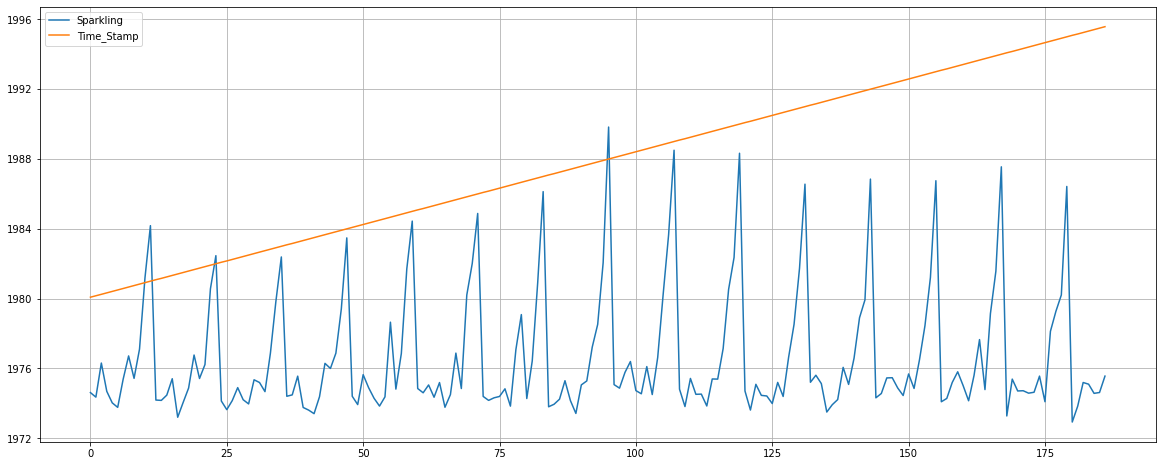

In [1079]:
df1.plot()
plt.grid();

We see that there is a trend and a seasonality. So, now we take a seasonal differencing and check the series.

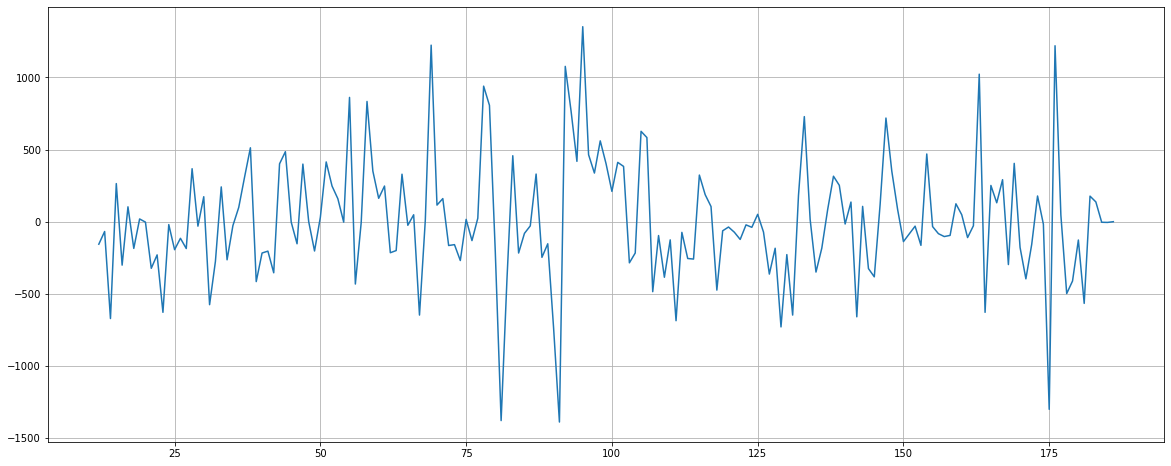

In [1080]:
(df1['Sparkling'].diff(12)).plot()
plt.grid();

We see that there might be a slight trend which can be noticed in the data. So we take a differencing of first order on the seasonally differenced series.

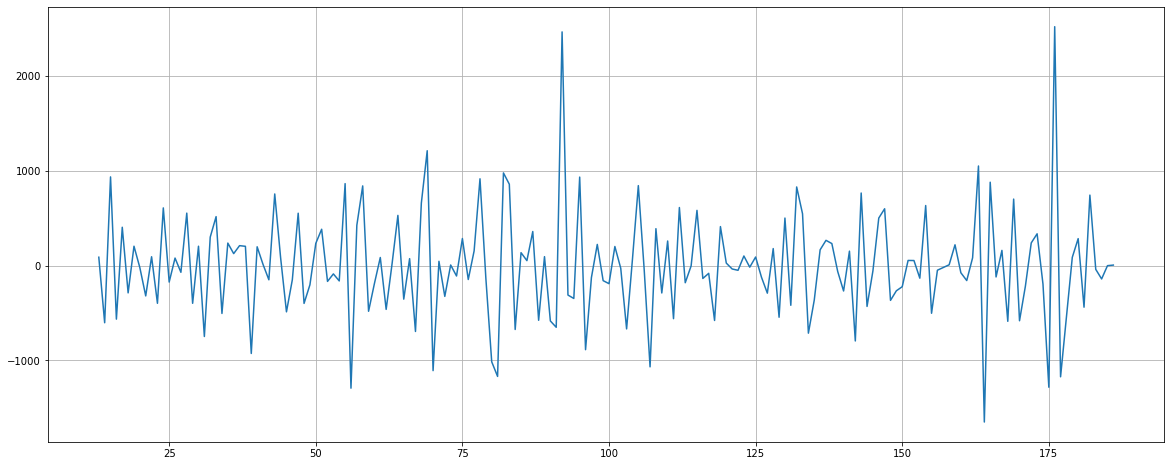

In [1081]:
(df1['Sparkling'].diff(12)).diff().plot()
plt.grid();

Now we see that there is almost no trend present in the data. Seasonality is only present in the data.
Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.

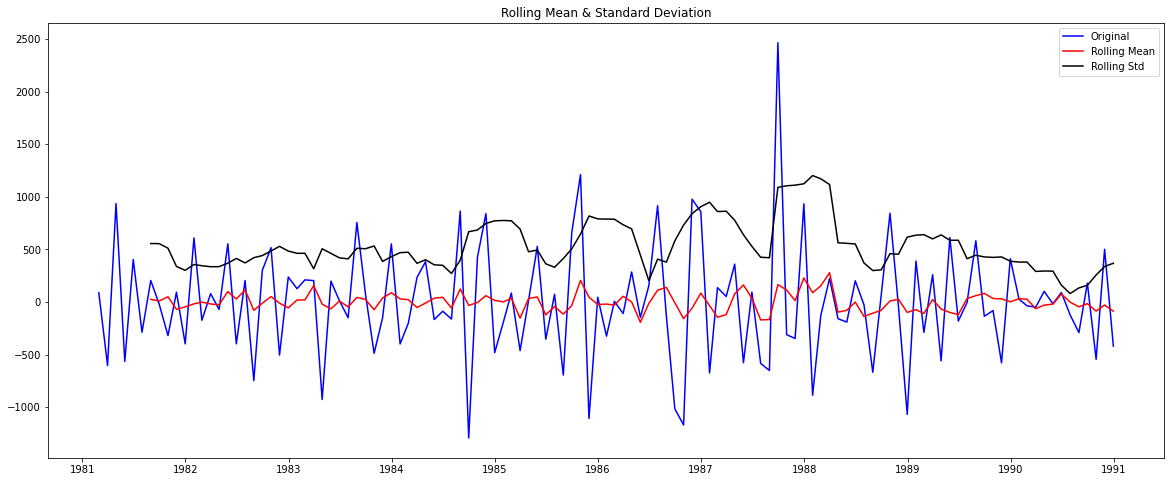

Results of Dickey-Fuller Test:
Test Statistic                  -3.342905
p-value                          0.013066
#Lags Used                      10.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [1082]:
test_stationarity((train['Sparkling'].diff(12).dropna()).diff(1).dropna())

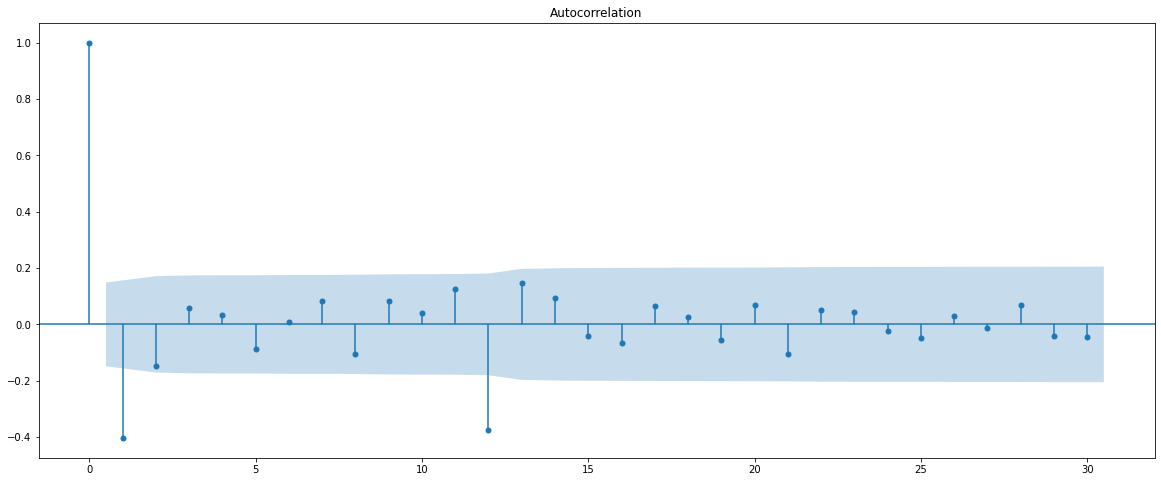

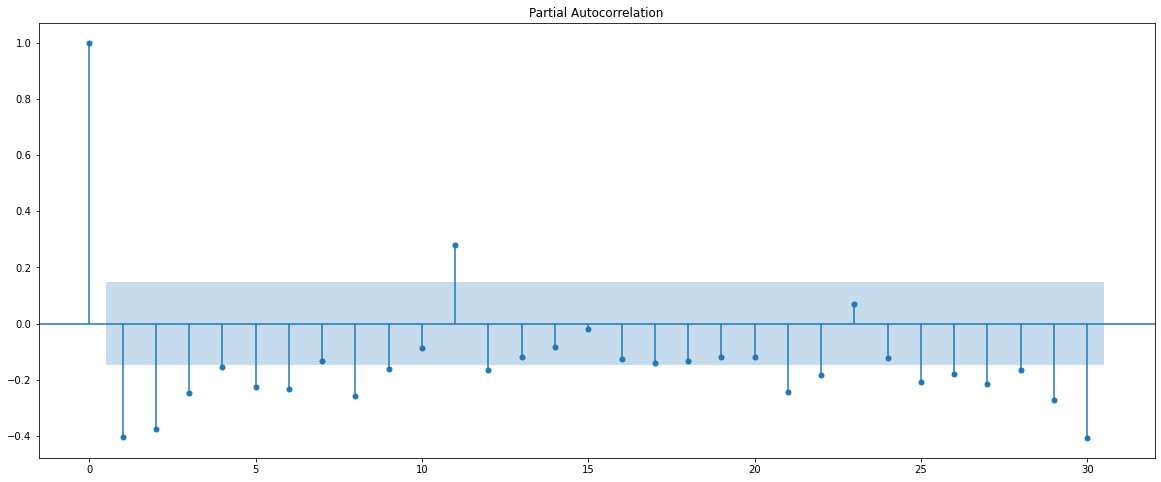

In [1083]:
#Checking the ACF and the PACF plots for the new modified Time Series.
plot_acf((df1['Sparkling'].diff(12).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df1['Sparkling'].diff(12).dropna()).diff(1).dropna(),lags=30);

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 6. We will keep the p(1) and q(1) parameters same as the ARIMA model.

The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0.
The Moving-Average parameter in an SARIMA model is 'q' which comes from the significant lag after which the ACF plot cuts-off to 0. Remember to check the ACF and the PACF plots only at multiples of 6 (since 6 is the seasonal period).
By looking at the plots we see that the ACF and the PACF do not directly cut-off to 0.

This is a common problem while building models by looking at the ACF and the PACF plots. But we are able to explain the model.

In [1084]:
import statsmodels.api as sm

In [1085]:
manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(2, 1, 1),
                                seasonal_order=(3, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(2, 1, 1)x(3, 1, 1, 12)   Log Likelihood                -607.074
Date:                            Sun, 20 Feb 2022   AIC                           1230.148
Time:                                    13:38:37   BIC                           1249.304
Sample:                                         0   HQIC                          1237.834
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1902      0.155      1.227      0.220      -0.114       0.494
ar.L2         -0.0804      0.143   

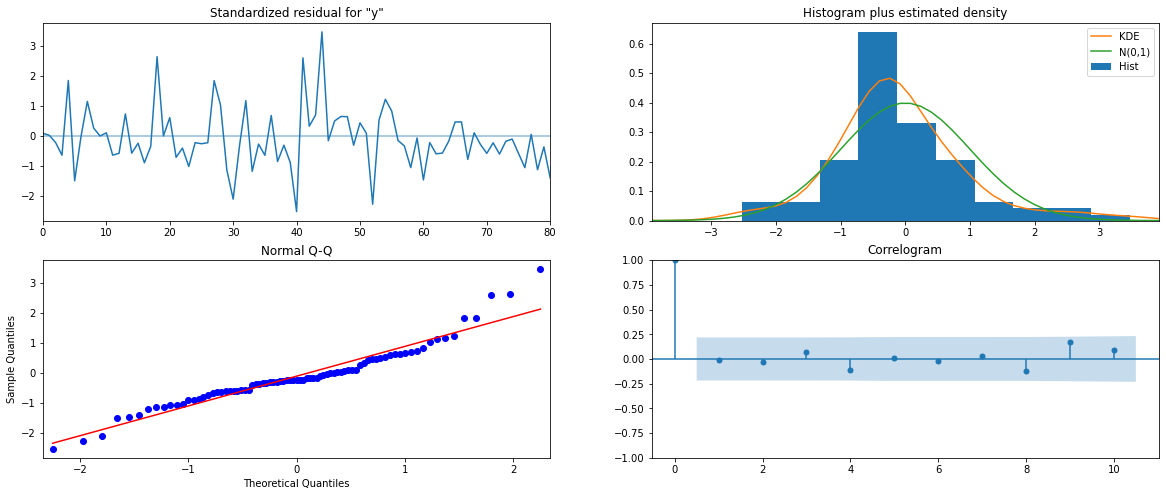

In [1086]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

The model diagnostics plot looks okay.

<b>Predict on the Test Set using this model and evaluate the model.</b>

In [1087]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1554.494279  434.389282     703.106931    2405.881628
1  1374.161057  446.887656     498.277346    2250.044767
2  1837.105387  446.948566     961.102294    2713.108480
3  1695.541850  447.210853     819.024685    2572.059015
4  1567.552351  447.890569     689.702967    2445.401735

In [1088]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print("RMSE of SARIMA model based on cut off points(2,1,1)(3,1,1,12)on testing data:",rmse)

RMSE of SARIMA model based on cut off points(2,1,1)(3,1,1,12)on testing data: 347.48994993195447


In [1089]:
mape = MAPE(test['Sparkling'],predicted_manual_SARIMA_6.predicted_mean)
print(mape)

11.28


In [1090]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse], 'MAPE': [mape]}
                           ,index=['SARIMA(2,1,1)(3,1,1,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE   MAPE
ARIMA(2,1,2)             1374.296387  48.34
SARIMA(1,1,2)(1,0,2,12)   555.461512  20.08
ARIMA(3,1,2)             1379.000674  49.31
SARIMA(2,1,1)(3,1,1,12)   347.489950  11.28

This is where our model building exercise ends. 

Please do try out with 12 as a seasonal parameter and check whether that gives you a better RMSE value. Also, try taking different kinds of transformations as well.

Now, we will take our best model and forecast 12 months into the future with appropriate confidence intervals to see how the predictions look. We have to build our model on the full data for this.

<b>8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.</b>

<b>9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.</b>

<b>Building the most optimum model on the Full Data.</b>

## Evaluate the model on the whole and predict 12 months into the future (till the end of next year).

<b><center>1.SARIMA(manual)</center></b>

In [1099]:
full_data_model = sm.tsa.statespace.SARIMAX(data1['Sparkling'],
                                order=(2,1,1),
                                seasonal_order=(3, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(2, 1, 1)x(3, 1, 1, 12)   Log Likelihood               -1008.515
Date:                            Sun, 20 Feb 2022   AIC                           2033.031
Time:                                    13:48:06   BIC                           2056.332
Sample:                                01-31-1980   HQIC                          2042.500
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1102      0.090      1.229      0.219      -0.066       0.286
ar.L2         -0.0795      0.105   

In [1100]:
results_full_data_model.plot_diagnostics();

<b>Evaluate the model on the whole and predict 12 months into the future (till the end of next year).</b>

In [1101]:
predicted_manual_SARIMA_12_full_data = results_full_data_model.get_forecast(steps=12)

In [1103]:
predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05)

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  1887.916306  400.997075    1101.976480    2673.856132
1995-09-30  2468.943552  405.418080    1674.338716    3263.548387
1995-10-31  3294.331626  405.535888    2499.495890    4089.167361
1995-11-30  3853.661757  405.651937    3058.598570    4648.724943
1995-12-31  6116.066701  406.023791    5320.274694    6911.858708
1996-01-31  1193.556118  406.365839     397.093708    1990.018527
1996-02-29  1578.027085  406.680007     780.948918    2375.105253
1996-03-31  1836.318461  406.993156    1038.626534    2634.010388
1996-04-30  1849.048333  407.308123    1050.739082    2647.357584
1996-05-31  1678.575795  407.623135     879.649130    2477.502460
1996-06-30  1633.367208  407.937773     833.823865    2432.910551
1996-07-31  2010.029934  408.252131    1209.870461    2810.189406

In [1105]:
rmse = mean_squared_error(data1['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of SARIMA(manual) on the full Model',rmse)

mape = MAPE(data1['Sparkling'],results_full_data_model.fittedvalues)
print('MAPE of the Full Model',mape)

RMSE of SARIMA(manual) on the full Model 545.1493592269984
MAPE of the Full Model 14.35


In [1112]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-07-31', freq='M'))

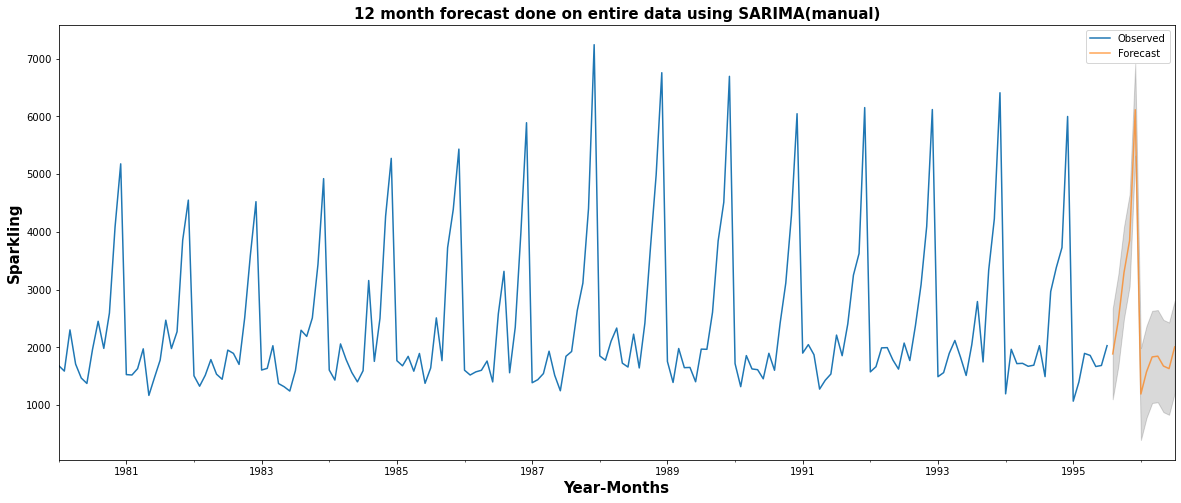

In [1113]:
# plot the forecast along with the confidence band

axis = data1['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months', fontsize=15,fontweight='bold')
axis.set_ylabel('Sparkling', fontsize=15,fontweight='bold')
plt.title("12 month forecast done on entire data using SARIMA(manual)", fontsize=15,fontweight='bold')
plt.legend(loc='best')
plt.show()

In [1114]:
resultsDf

RMSE   MAPE
ARIMA(2,1,2)             1374.296387  48.34
SARIMA(1,1,2)(1,0,2,12)   555.461512  20.08
ARIMA(3,1,2)             1379.000674  49.31
SARIMA(2,1,1)(3,1,1,12)   347.489950  11.28

<b><center>2.Triple Exponetial smoothing(aic)</center></b>

In [1091]:
fullmodel1 = ExponentialSmoothing(data1,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.3,
                                                                 smoothing_slope=0.3,
                                                                 smoothing_seasonal=0.3)

In [1092]:
RMSE_fullmodel1 = metrics.mean_squared_error(data1['Sparkling'],fullmodel1.fittedvalues,squared=False)

print('RMSE of Triple exponential smoothing on entire data:',RMSE_fullmodel1)

RMSE of Triple exponential smoothing on entire data: 421.30973568581123


In [1093]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = fullmodel1.forecast(steps=12)
prediction_1

1995-08-31    1855.475048
1995-09-30    2487.237864
1995-10-31    3324.237414
1995-11-30    4227.091144
1995-12-31    6831.547050
1996-01-31    1585.313148
1996-02-29    2061.822043
1996-03-31    2418.525622
1996-04-30    2390.890238
1996-05-31    2158.075901
1996-06-30    2037.358404
1996-07-31    2424.415242
Freq: M, dtype: float64

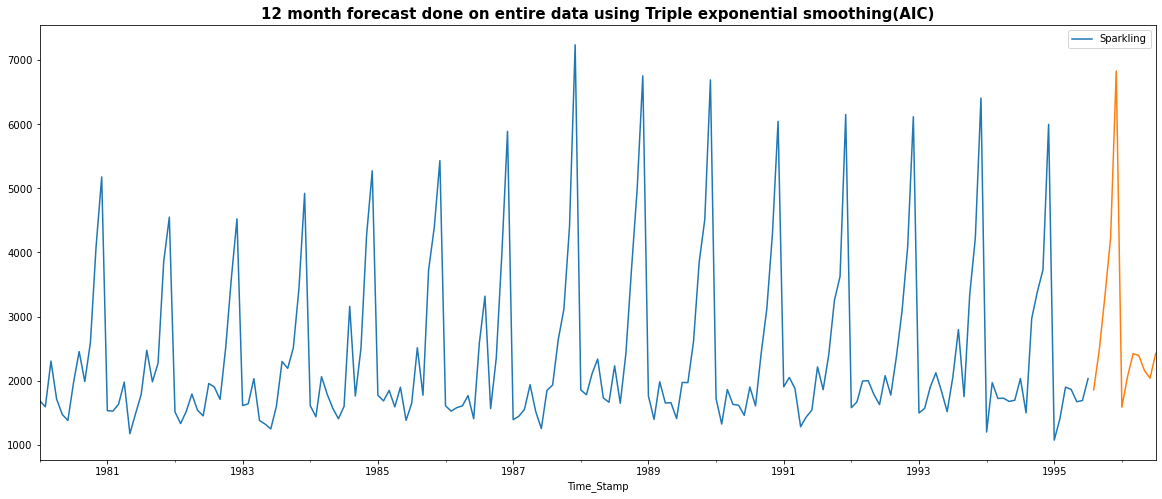

In [1094]:
data1.plot()
plt.title("12 month forecast done on entire data using Triple exponential smoothing(AIC)", fontsize=15,fontweight='bold')
prediction_1.plot();

In [1095]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

lower_CI   prediction     upper_ci
1995-08-31  1027.496371  1855.475048  2683.453725
1995-09-30  1659.259187  2487.237864  3315.216541
1995-10-31  2496.258736  3324.237414  4152.216091
1995-11-30  3399.112466  4227.091144  5055.069821
1995-12-31  6003.568373  6831.547050  7659.525727

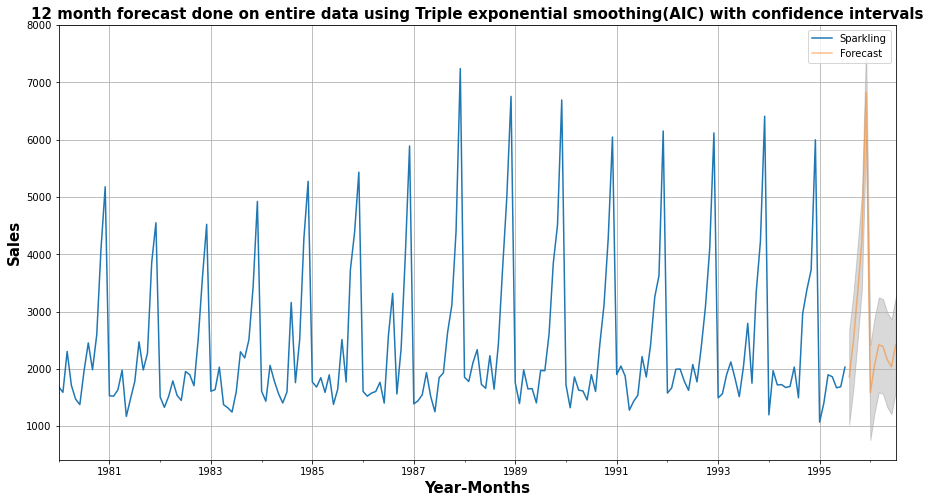

In [1096]:
# plot the forecast along with the confidence band

axis = data1.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months',fontsize=15,fontweight='bold')
axis.set_ylabel('Sales',fontsize=15,fontweight='bold')
plt.legend(loc='best')
plt.title("12 month forecast done on entire data using Triple exponential smoothing(AIC) with confidence intervals", fontsize=15,fontweight='bold')
plt.grid()
plt.show()

# END